# preparations

### import libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white",font_scale = 1.5)
# Set the font to Times new roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
from tqdm.notebook import tqdm
palette =["deeppink","lime","Orange","forestgreen","red","cyan"]
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import datetime
from sklearn.metrics import r2_score, mean_squared_error
import re
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### bands dictionary

In [3]:
band_dict = {
1: 398.08,
2: 400.292,
3: 402.503,
4: 404.715,
5: 406.927,
6: 409.139,
7: 411.351,
8: 413.563,
9: 415.775,
10: 417.986,
11: 420.198,
12: 422.41,
13: 424.622,
14: 426.834,
15: 429.046,
16: 431.258,
17: 433.469,
18: 435.681,
19: 437.893,
20: 440.105,
21: 442.317,
22: 444.529,
23: 446.741,
24: 448.952,
25: 451.164,
26: 453.376,
27: 455.588,
28: 457.8,
29: 460.012,
30: 462.224,
31: 464.435,
32: 466.647,
33: 468.859,
34: 471.071,
35: 473.283,
36: 475.495,
37: 477.707,
38: 479.918,
39: 482.13,
40: 484.342,
41: 486.554,
42: 488.766,
43: 490.978,
44: 493.189,
45: 495.401,
46: 497.613,
47: 499.825,
48: 502.037,
49: 504.249,
50: 506.461,
51: 508.672,
52: 510.884,
53: 513.096,
54: 515.308,
55: 517.52,
56: 519.732,
57: 521.944,
58: 524.155,
59: 526.367,
60: 528.579,
61: 530.791,
62: 533.003,
63: 535.215,
64: 537.427,
65: 539.638,
66: 541.85,
67: 544.062,
68: 546.274,
69: 548.486,
70: 550.698,
71: 552.91,
72: 555.121,
73: 557.333,
74: 559.545,
75: 561.757,
76: 563.969,
77: 566.181,
78: 568.393,
79: 570.604,
80: 572.816,
81: 575.028,
82: 577.24,
83: 579.452,
84: 581.664,
85: 583.876,
86: 586.087,
87: 588.299,
88: 590.511,
89: 592.723,
90: 594.935,
91: 597.147,
92: 599.359,
93: 601.57,
94: 603.782,
95: 605.994,
96: 608.206,
97: 610.418,
98: 612.63,
99: 614.842,
100: 617.053,
101: 619.265,
102: 621.477,
103: 623.689,
104: 625.901,
105: 628.113,
106: 630.325,
107: 632.536,
108: 634.748,
109: 636.96,
110: 639.172,
111: 641.384,
112: 643.596,
113: 645.808,
114: 648.019,
115: 650.231,
116: 652.443,
117: 654.655,
118: 656.867,
119: 659.079,
120: 661.291,
121: 663.502,
122: 665.714,
123: 667.926,
124: 670.138,
125: 672.35,
126: 674.562,
127: 676.774,
128: 678.985,
129: 681.197,
130: 683.409,
131: 685.621,
132: 687.833,
133: 690.045,
134: 692.257,
135: 694.468,
136: 696.68,
137: 698.892,
138: 701.104,
139: 703.316,
140: 705.528,
141: 707.74,
142: 709.951,
143: 712.163,
144: 714.375,
145: 716.587,
146: 718.799,
147: 721.011,
148: 723.223,
149: 725.434,
150: 727.646,
151: 729.858,
152: 732.07,
153: 734.282,
154: 736.494,
155: 738.706,
156: 740.917,
157: 743.129,
158: 745.341,
159: 747.553,
160: 749.765,
161: 751.977,
162: 754.189,
163: 756.4,
164: 758.612,
165: 760.824,
166: 763.036,
167: 765.248,
168: 767.46,
169: 769.672,
170: 771.883,
171: 774.095,
172: 776.307,
173: 778.519,
174: 780.731,
175: 782.943,
176: 785.155,
177: 787.366,
178: 789.578,
179: 791.79,
180: 794.002,
181: 796.214,
182: 798.426,
183: 800.638,
184: 802.849,
185: 805.061,
186: 807.273,
187: 809.485,
188: 811.697,
189: 813.909,
190: 816.121,
191: 818.332,
192: 820.544,
193: 822.756,
194: 824.968,
195: 827.18,
196: 829.392,
197: 831.604,
198: 833.815,
199: 836.027,
200: 838.239,
201: 840.451,
202: 842.663,
203: 844.875,
204: 847.087,
205: 849.298,
206: 851.51,
207: 853.722,
208: 855.934,
209: 858.146,
210: 860.358,
211: 862.57,
212: 864.781,
213: 866.993,
214: 869.205,
215: 871.417,
216: 873.629,
217: 875.841,
218: 878.053,
219: 880.264,
220: 882.476,
221: 884.688,
222: 886.9,
223: 889.112,
224: 891.324,
225: 893.536,
226: 895.747,
227: 897.959,
228: 900.171,
229: 902.383,
230: 904.595,
231: 906.807,
232: 909.019,
233: 911.23,
234: 913.442,
235: 915.654,
236: 917.866,
237: 920.078,
238: 922.29,
239: 924.502,
240: 926.713,
241: 928.925,
242: 931.137,
243: 933.349,
244: 935.561,
245: 937.773,
246: 939.985,
247: 942.196,
248: 944.408,
249: 946.62,
250: 948.832,
251: 951.044,
252: 953.256,
253: 955.468,
254: 957.679,
255: 959.891,
256: 962.103,
257: 964.315,
258: 966.527,
259: 968.739,
260: 970.951,
261: 973.162,
262: 975.374,
263: 977.586,
264: 979.798,
265: 982.01,
266: 984.222,
267: 986.434,
268: 988.645,
269: 990.857,
270: 993.069,
271: 995.281,
272: 997.493,
273: 999.705,
274: 1001.92}

### other dictionaries

In [4]:
color_dict = {'carob':'cyan', 'cypress':'red', 'pine':'purple', 'pistacia':'orange', 'oak':'blue'}

### make dataframe of the data

In [5]:
path = "/content/drive/MyDrive/projects/amirim/VI_values/Sg_clean_data.csv"
df = pd.read_csv(path, usecols=lambda column: column not in ["Unnamed: 0"])#.dropna()

df.columns = list(range(1, 275)) + list(df.columns[274:])
#filter some bad data rows
df = df[~((df['English_name'] == 'pistacia') & (df['spectral_date'] == '2022-08-11')&(df['plot'] == 6))]
# df = df[~(df['ID'] == 'Qc2')]

# Convert date to datetime:
df['spectral_date'] = pd.to_datetime(df['spectral_date'])

# Sort values by date order
df = df.sort_values('spectral_date')

df

1         2         3         4         5         6         7  \
0    0.056127  0.050410  0.045164  0.040390  0.036088  0.032257  0.028898   
15   0.059977  0.053579  0.047686  0.042298  0.037416  0.033039  0.029167   
14   0.065111  0.058156  0.051725  0.045821  0.040442  0.035588  0.031260   
12   0.072386  0.067089  0.062196  0.057705  0.053616  0.049930  0.046647   
11   0.049685  0.044987  0.040648  0.036666  0.033041  0.029774  0.026864   
..        ...       ...       ...       ...       ...       ...       ...   
220  0.061252  0.054616  0.048544  0.043038  0.038095  0.033718  0.029905   
219  0.033540  0.030082  0.026936  0.024103  0.021584  0.019378  0.017485   
244  0.049915  0.044643  0.039817  0.035437  0.031504  0.028017  0.024976   
231  0.063757  0.058792  0.054281  0.050224  0.046621  0.043471  0.040775   
245  0.028698  0.025888  0.023326  0.021012  0.018945  0.017126  0.015554   

            8         9        10  ...       270       271       272  \
0    0.026011  0.023595  0.021651  ...  0.222754  0.225129  0.227839   
15   0.025800  0.022939  0.020583  ...  0.226843  0.229209  0.231894   
14   0.027458  0.024182  0.021431  ...  0.137894  0.139457  0.141216   
12   0.043766  0.041287  0.039212  ...  0.271827  0.274488  0.277538   
11   0.024312  0.022117  0.020280  ...  0.237569  0.240038  0.242870   
..        ...       ...       ...  ...       ...       ...       ...   
220  0.026657  0.023973  0.021855  ...  0.340681  0.340734  0.340649   
219  0.015905  0.014638  0.013684  ...  0.188189  0.188086  0.187896   
244  0.022381  0.020232  0.018530  ...  0.240941  0.241184  0.241376   
231  0.038533  0.036745  0.035411  ...  0.307431  0.306699  0.305793   
245  0.014230  0.013154  0.012326  ...  0.168240  0.167605  0.166947   

          273       274    LWP  spectral_date  treatment  plot  English_name  
0    0.230886  0.234268 -1.150     2022-03-14    drought     5       cypress  
15   0.234896  0.238218 -1.070     2022-03-14    drought     2       cypress  
14   0.143169  0.145318 -1.500     2022-03-14    drought     2           oak  
12   0.280974  0.284798 -2.900     2022-03-14    drought     2          pine  
11   0.246067  0.249627 -1.800     2022-03-14    drought     2         carob  
..        ...       ...    ...            ...        ...   ...           ...  
220  0.340427  0.340068 -0.311     2023-02-13    control     4      pistacia  
219  0.187620  0.187256 -1.316     2023-02-13    control     4       cypress  
244  0.241517  0.241606 -1.960     2023-02-13    control     3         carob  
231  0.304711  0.303453 -1.905     2023-02-13    control     1          pine  
245  0.166267  0.165566 -1.798     2023-02-13    drought     6         carob  

[245 rows x 279 columns]

# Yishi NDSI code

## make the correlations data

Define the NDSI function:

In [ ]:
def NDSI_pearson(x_df, y_df):
    '''
    The  NDSI_pearson takes is the same as NDSI()
    but calculate the pearson correlation instead of Spearman correlation
    '''
    # Convert columns names to str
    x_df.columns = x_df.columns.map(str)
    bands_list = x_df.columns

    # All possible pairs of columns
    all_pairs = list(itertools.combinations(bands_list, 2))

    # Calculate the NDSI
    y = y_df.values
    corrs = np.zeros(len(all_pairs))  # array for filling with correlation values
    pvals = np.zeros(len(all_pairs))  # array for filling with p values

    # Use tqdm to show the progress bar
    for index, pair in tqdm(enumerate(all_pairs), total=len(all_pairs), desc="Calculating NDSI"):
        a = x_df[pair[0]].values
        b = x_df[pair[1]].values
        Norm_index = (a-b)/(a+b)
        # Pearson correlation and p value
        corr, pval = stats.pearsonr(Norm_index, y)
        corrs[index] = corr
        pvals[index] = pval

    # Convert to DataFrame
    col1 = [tple[0] for tple in all_pairs]  # column of the first wavelength
    col2 = [tple[1] for tple in all_pairs]  # column of the second wavelength
    index_col = [f"{tple[0]},{tple[1]}" for tple in all_pairs]  # index column
    R_squared = [round(val**2,5) for val in corrs] # R_squared values
    data = {'band1': col1, "band2": col2, 'Pearson_Corr': corrs, 'p_value': pvals, 'R^2':R_squared}

    df_results = pd.DataFrame(data=data, index=index_col)
    df_results["Abs_Pearson_Corr"] = round(df_results["Pearson_Corr"].abs(),5)
    return df_results.sort_values('Abs_Pearson_Corr',ascending=False)

choose the data form the table:

In [ ]:
df1 = df
# df1 = df1.groupby(by = ['plot','spectral_date']).mean()
df1 = df[df['English_name']=='pistacia']
# df1 = df[df['treatment']=='drought']
# date = str(df.spectral_date.unique()[1])[:10]
# df1 = df[df['spectral_date'] == date]
# date


Apply on my data:

In [ ]:
#run the NDSI_pearson over our data
results = NDSI_pearson(df1[df1.columns[:274]],df1['LWP'])

Calculating NDSI:   0%|          | 0/37401 [00:00<?, ?it/s]

In [ ]:
# orgenize the results
results[['band1', 'band2']] = results[['band1', 'band2']].astype(float)
results = results.sort_values(by=['Abs_Pearson_Corr', 'band1'], ascending = False)
original_results = results

## present the correlations

play and present the data

In [ ]:
APC_threshold = 0.7
results = original_results[
    (original_results['Abs_Pearson_Corr']>APC_threshold)
    # &
    # (original_results['band2']>0) & (original_results['band2']<274)
    # & (original_results['band1']>56)& (original_results['band1']<120)
    ]
best = results.iloc[0]['Abs_Pearson_Corr']
best = f'{best:.3f}'
treatment = 'all'
species = 'average'
date = 'all'
plot = 'average'
results

band1  band2  Pearson_Corr   p_value      R^2  Abs_Pearson_Corr
159,160  159.0  160.0     -0.803199  0.000001  0.64513           0.80320
157,163  157.0  163.0     -0.802865  0.000001  0.64459           0.80286
158,163  158.0  163.0     -0.792706  0.000002  0.62838           0.79271
154,163  154.0  163.0     -0.789486  0.000003  0.62329           0.78949
149,160  149.0  160.0     -0.787250  0.000003  0.61976           0.78725
...        ...    ...           ...       ...      ...               ...
140,151  140.0  151.0     -0.700049  0.000098  0.49007           0.70005
147,222  147.0  222.0     -0.700043  0.000098  0.49006           0.70004
75,176    75.0  176.0     -0.700040  0.000098  0.49006           0.70004
82,190    82.0  190.0     -0.700013  0.000098  0.49002           0.70001
78,192    78.0  192.0     -0.700008  0.000098  0.49001           0.70001

[2010 rows x 6 columns]

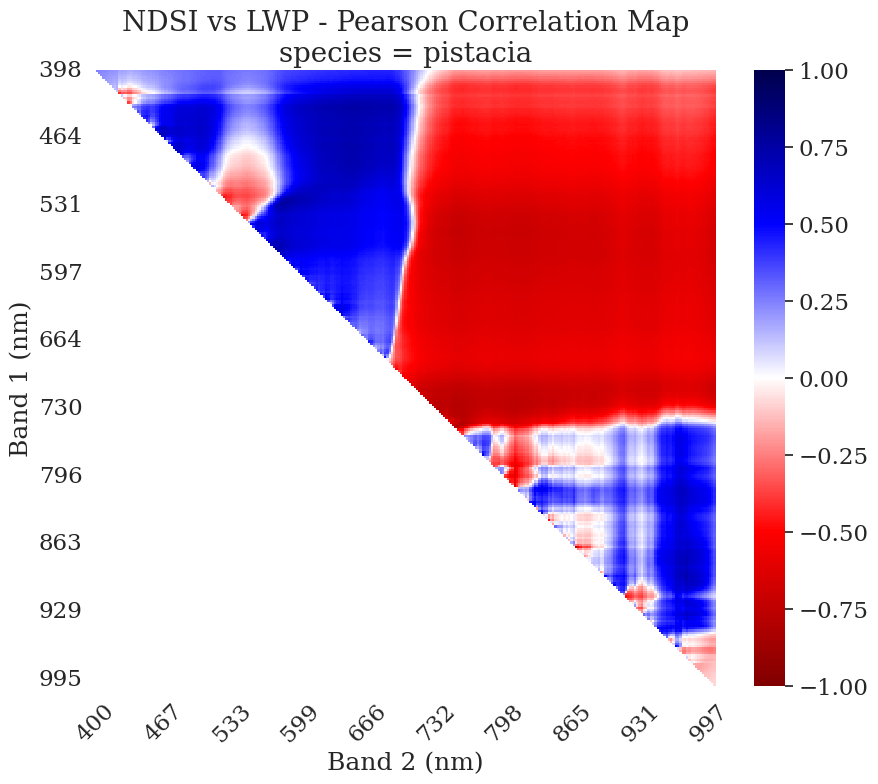

In [ ]:
#to see the plot in its place in the complete data

# Create a list of all possible band numbers from 1 to 274
bands_order1 = list(range(1, 274))
bands_order2 = list(range(2, 275))
#convert to wavelengths
WL_order1 = [round(band_dict[wl]) for wl in bands_order1]
WL_order2 = [round(band_dict[wl]) for wl in bands_order2]

# Pivot the dataframe to have bands as rows and columns
corr_matrix = results.pivot(index='band1', columns='band2', values='Pearson_Corr')

# Map the index and columns to rounded integers using the band_dict dictionary
corr_matrix.index = corr_matrix.index.map(lambda wl: int(round(band_dict[wl])))
corr_matrix.columns = corr_matrix.columns.map(lambda wl: int(round(band_dict[wl])))

# Reindex the corr_matrix using the WL_order1 and WL_order2 lists as the new index and columns
# corr_matrix = corr_matrix.reindex(index=WL_order1, columns=WL_order2)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, cmap='seismic_r',vmin=-1,vmax=1)
# plt.title(f'NDSI - top {len(results)} (APC over {APC_threshold}, best is {best})\nTreatment = {treatment}, Species = {species}, Date = {date}, Plot = {plot}')

# Set the x-axis and y-axis tick positions
heatmap.set_xticks(range(len(WL_order2))[::30])
heatmap.set_yticks(range(len(WL_order1))[::30])

# Set the x-axis and y-axis tick labels
heatmap.set_xticklabels(WL_order2[::30])
heatmap.set_yticklabels(WL_order1[::30])

# Rotate the x-axis tick labels for better visibility if needed
plt.xticks(rotation=45)
plt.title(f'NDSI vs LWP - Pearson Correlation Map\nspecies = pistacia',fontsize = 20)
plt.ylabel('Band 1 (nm)')
plt.xlabel('Band 2 (nm)')
plt.show()
#seismic_r

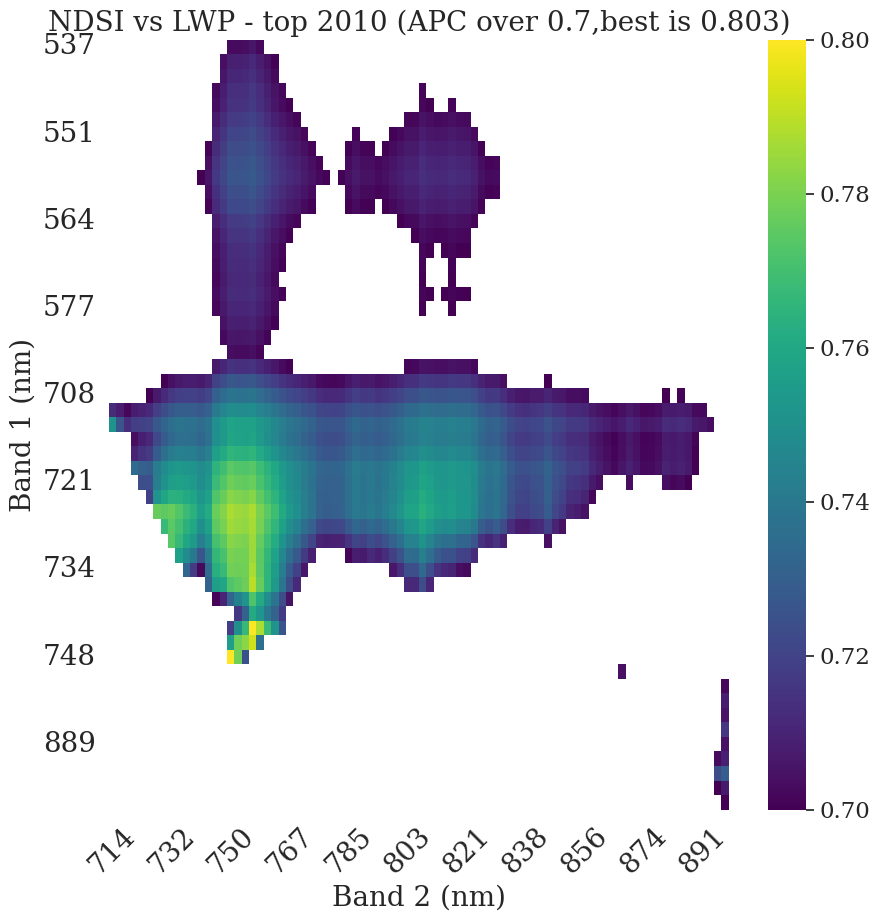

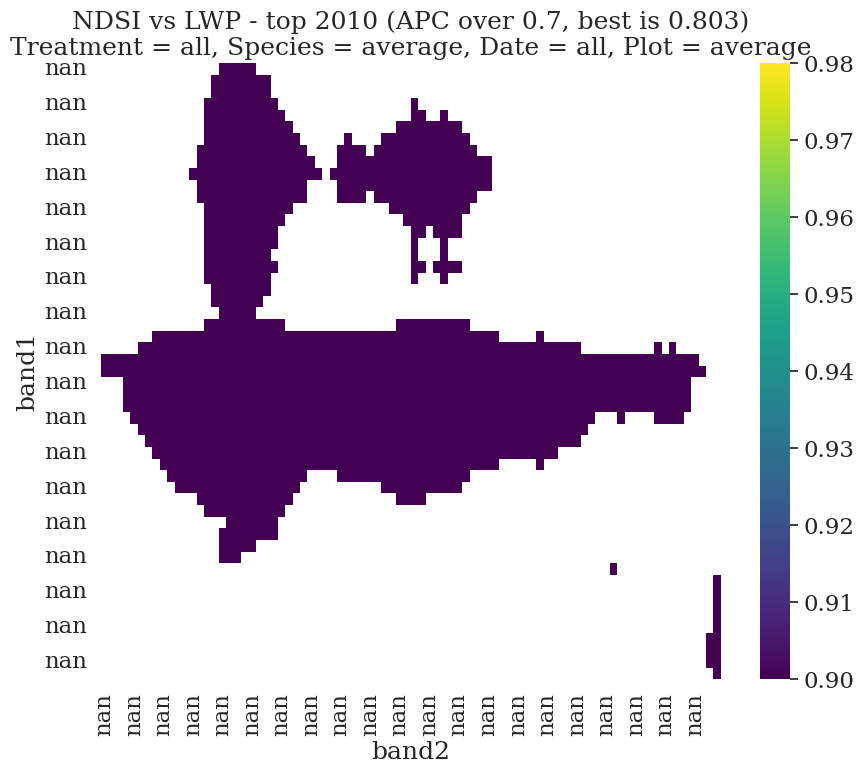

In [ ]:
results_s = results[(results['band2']>140) & (results['band2']<274)
    & (results['band1']>0) & (results['band1']<274)]
results = abs(results)

# Pivot the dataframe to have bands as rows and columns
corr_matrix = results_s.pivot(index='band1', columns='band2', values='Abs_Pearson_Corr')

# Convert the 'band1' and 'band2' columns to categorical data type and specify the order
bands_order = sorted(set(results['band1']).union(set(results['band2'])))

# Map the index and columns to rounded integers using the band_dict dictionary
corr_matrix.index = corr_matrix.index.map(lambda wl: int(round(band_dict[wl])))
corr_matrix.columns = corr_matrix.columns.map(lambda wl: int(round(band_dict[wl])))

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='viridis',vmin=0.7,vmax=0.8)
# plt.title(f'NDSI - top {len(results)} (APC over {APC_threshold}, best is {best})\nTreatment = {treatment}, Species = {species}, Date = {date}, Plot = {plot}')
plt.xticks(rotation=45, fontsize = 20)

plt.title(f'NDSI vs LWP - top {len(results)} (APC over {APC_threshold},best is {best})', fontsize = 20)
plt.ylabel('Band 1 (nm)', fontsize = 20)
plt.xlabel('Band 2 (nm)', fontsize = 20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.locator_params(nbins=11)
plt.show()

# Map the index and columns to wavelengths using the band_dict dictionary (cancel this lines to get the band numbers!)
corr_matrix.index = corr_matrix.index.map(band_dict)
corr_matrix.columns = corr_matrix.columns.map(band_dict)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='viridis',vmin=0.9,vmax=0.98)
plt.title(f'NDSI vs LWP - top {len(results)} (APC over {APC_threshold}, best is {best})\nTreatment = {treatment}, Species = {species}, Date = {date}, Plot = {plot}')

plt.show()

In [ ]:
##this are the bands before the smoothing

corr_bands = [
  ['all', 'all', 'all', [(127,160), (61,105),(146,147)], [], [], [(126,133)], []],
  ['control', 'all', 'all', [(149,187), (80,82),(146,147),(127,160),(192,195)], [], [], [], []],
  ['drought', 'all', 'all', [(150,151), (128,161), (46,123,)], [], [], [], []],
  ['all', 'cypress', 'all', [(81,83),(52,119),(146,147)], [], [], [], []],
  ['all', 'pine', 'all', [(151,153), (23,122)], [], [], [], []],
  ['all', 'oak', 'all', [(152,189)], [], [], [], []],
  ['all', 'carob', 'all', [(61,99), (78,98)], [], [], [], []],
  ['none','average','all','all',[(143,190),(142,163)],[],[],[],[]],
  ['all', 'all', '2022-03-14', [], [], [], [], []],
  ['all', 'all', '2022-04-12', [], [], [], [], []],
  ['all', 'all', '2022-05-10', [], [], [], [], []],
  ['all', 'all', '2022-07-21', [], [], [], [], []],
  ['all', 'all', '2022-08-11', [], [], [], [], []],
  ['all', 'all', '2022-09-07', [], [], [], [], []],
  ['all', 'all', '2022-11-23', [], [], [], [], []],
  ['all', 'all', '2022-12-20', [], [], [], [], []],
  ['all', 'all', '2022-01-10', [], [], [], [], []],
  ['all', 'all', '2022-02-13', [], [], [], [], []]]

### trying to make something

Calculating NDSI:   0%|          | 0/37401 [00:00<?, ?it/s]

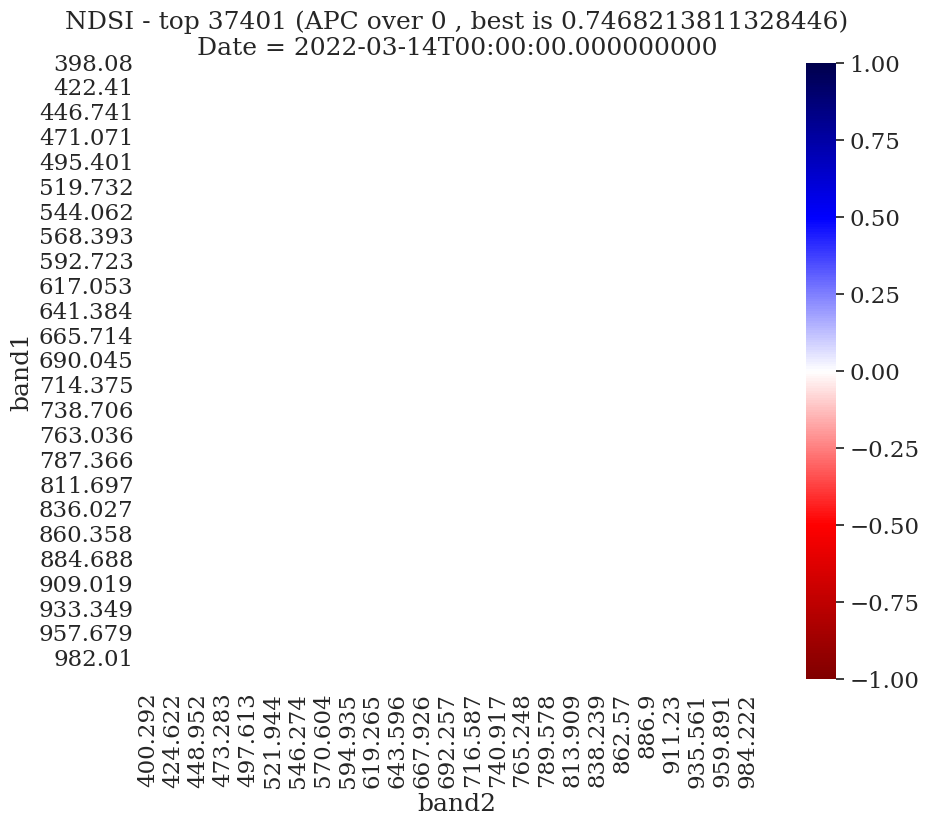

In [ ]:
for day in df.spectral_date.unique():
  df1 = df[df['spectral_date'] == day]
  results = NDSI_pearson(df1[df1.columns[11:285]],df1['LWP'])

  best = results.iloc[0]['Abs_Pearson_Corr']

  # Create a list of all possible band numbers from 1 to 274
  bands_order1 = list(range(1, 274))
  bands_order2 = list(range(2, 275))
  #convert to wavelengths
  WL_order1 = [band_dict[wl] for wl in bands_order1]
  WL_order2 = [band_dict[wl] for wl in bands_order2]

  # Pivot the dataframe to have bands as rows and columns
  corr_matrix = results.pivot(index='band1', columns='band2', values='Pearson_Corr')

  # Map the index and columns to wavelengths using the band_dict dictionary
  # corr_matrix.index = corr_matrix.index.map(band_dict)
  # corr_matrix.columns = corr_matrix.columns.map(band_dict)

  # Reindex the corr_matrix using the WL_order1 and WL_order2 lists as the new index and columns
  corr_matrix = corr_matrix.reindex(index=WL_order1, columns=WL_order2)

  # Create a heatmap using Seaborn
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, cmap='seismic_r',vmin=-1,vmax=1)
  plt.title(f'NDSI - top {len(results)} (APC over 0 , best is {best})\nDate = {day}')
  plt.show()
  #seismic_r
  break

### local maxima plotting

<ipython-input-10-a516e558a3b7>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'ro',color='red')


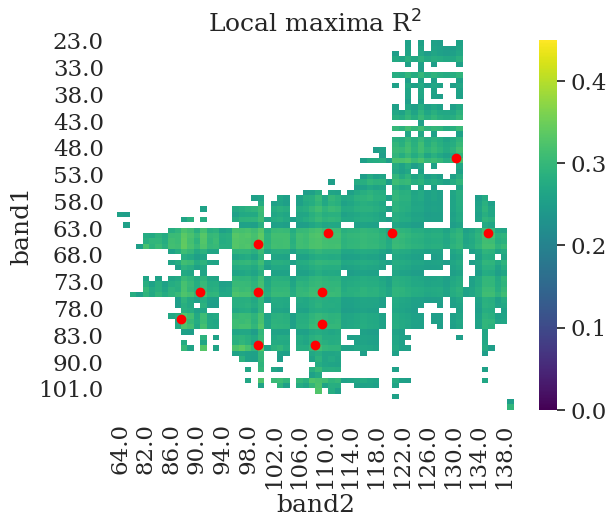

    Band 1  Band 2       R^2       APC  wavelength1  wavelength2
0     50.0   131.0  0.320191  0.565854      506.461      685.621
1     64.0   111.0  0.315517  0.561709      537.427      641.384
2     64.0   121.0  0.304679  0.551978      537.427      663.502
3     64.0   136.0  0.318269  0.564154      537.427      696.680
4     66.0   100.0  0.338509  0.581816      541.850      617.053
5     75.0    91.0  0.319762  0.565475      561.757      597.147
6     75.0   100.0  0.323903  0.569125      561.757      617.053
7     75.0   110.0  0.305506  0.552726      561.757      639.172
8     80.0    88.0  0.333837  0.577786      572.816      590.511
9     81.0   110.0  0.300646  0.548312      575.028      639.172
10    85.0   100.0  0.337096  0.580599      583.876      617.053
11    85.0   109.0  0.312299  0.558837      583.876      636.960


In [ ]:
# Define neighborhood size and threshold
neighborhood_size = 10
threshold = 0.01

# Create R squre df
df_squared = corr_matrix.applymap(lambda x: x**2)
data = df_squared.values

# Apply maximum filter
data_max = ndimage.maximum_filter(data, size=neighborhood_size)

# Find local maxima
maxima = (data == data_max)

# Apply minimum filter
data_min = ndimage.minimum_filter(data, size=neighborhood_size)

# Calculate thresholded difference between maxima and minima
diff = ((data_max - data_min) > threshold)

# Remove non-maxima points
maxima[diff == 0] = 0

# Label connected regions of local maxima
labeled, num_objects = ndimage.label(maxima)

# Find slices for each labeled region
slices = ndimage.find_objects(labeled)

# Find centers of labeled regions
x, y = [], []
for dy, dx in slices:
    x_center = (dx.start + dx.stop - 1) / 2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1) / 2
    y.append(y_center)

# Plot heatmap and local maxima
# plt.imshow(data, cmap='seismic_r', vmin=-1, vmax=1)
sns.heatmap(df_squared, cmap='viridis',vmin=0,vmax=0.45)
plt.autoscale(False)
plt.plot(x, y, 'ro',color='red')
plt.title('Local maxima R$^2$')
plt.show()

###### make table of the maxima points values and bands

# Get the row and column indices of local maxima
rows, cols = np.nonzero(maxima)

# Get the row and column labels of local maxima, together with the corresponding wavelengthes lists
rows_labels = df_squared.index[rows]
cols_labels = df_squared.columns[cols]
wavelength1 = [band_dict[band] for band in rows_labels]
wavelength2 = [band_dict[band] for band in cols_labels]
# Get the values of local maxima
maxima_values = data[rows, cols]
APC = [max_v**0.5 for max_v in maxima_values]
# Combine the labels and values into a DataFrame
maxima_df = pd.DataFrame({'Band 1': rows_labels, 'Band 2': cols_labels, 'R^2': maxima_values, 'APC': APC, 'wavelength1': wavelength1, 'wavelength2':wavelength2})

# Print the results
print(maxima_df)

## make dataframe to export

### list of columns to add

In [ ]:
#create the dataframe
NDSI_bands_df = pd.DataFrame()

#append columns of the best-correetion bands
NDSI_bands_df = NDSI_bands_df.append(original_results[(original_results['band1'] == 144) & (original_results['band2'] == 146)])
NDSI_bands_df = NDSI_bands_df.append(original_results[(original_results['band1'] == 130) & (original_results['band2'] == 166)])
NDSI_bands_df = NDSI_bands_df.append(original_results[(original_results['band1'] == 66) & (original_results['band2'] == 88)])

#append columns of known indices:
NDSI_bands_df['indice'] = ''
NDSI_bands_df = NDSI_bands_df.append(original_results[(original_results['band1'] == 124) & (original_results['band2'] == 184)])
NDSI_bands_df['indice'][-1] = 'NDVI'
NDSI_bands_df = NDSI_bands_df.append(original_results[(original_results['band1'] == 70) & (original_results['band2'] == 178)])
NDSI_bands_df['indice'][-1] = 'MNDWI'
NDSI_bands_df = NDSI_bands_df.append(original_results[(original_results['band1'] == 61) & (original_results['band2'] == 79)])
NDSI_bands_df['indice'][-1] = 'PRI'

#add wavelength columns
NDSI_bands_df['WL_1'] = [band_dict[WL] for WL in NDSI_bands_df['band1']]
NDSI_bands_df['WL_2'] = [band_dict[WL] for WL in NDSI_bands_df['band2']]

#reorder the columns
NDSI_bands_df = NDSI_bands_df[[ 'WL_1', 'WL_2','band1', 'band2', 'Pearson_Corr', 'p_value', 'R^2', 'Abs_Pearson_Corr',
       'indice']]

NDSI_bands_df

NameError: ignored

### present the table, and discuss it (**the not smoothed data**)

In [ ]:
NDSI_bands_df

WL_1     WL_2  band1  band2  Pearson_Corr       p_value       R^2  \
144,146  714.375  718.799  144.0  146.0     -0.569701  9.138265e-12  0.324559   
130,166  683.409  763.036  130.0  166.0     -0.612098  8.696959e-14  0.374664   
66,88    541.850  590.511   66.0   88.0      0.581396  2.705445e-12  0.338021   
124,184  670.138  802.849  124.0  184.0     -0.592963  7.731716e-13  0.351606   
70,178   550.698  789.578   70.0  178.0     -0.517407  1.226677e-09  0.267710   
61,79    530.791  570.604   61.0   79.0     -0.054729  5.510318e-01  0.002995   

         Abs_Pearson_Corr indice  
144,146          0.569701         
130,166          0.612098         
66,88            0.581396         
124,184          0.592963   NDVI  
70,178           0.517407  MNDWI  
61,79            0.054729    PRI

###strong bands and points:

|treatment|species|date|points|band 1|band 2|range 1|range 2|
|---|---|---|---|---|---|---|---|
|all|all|all|(144,146),(130,166),(66,88)|144,|166,|63-66|
|drought|all|all|(148,149),(101,109)|148,94|109|
|control|all|all|(65,82),(144,146),(54,121)|54, 144,|100,110,121,166|63-66|
|all|cypress|all|(147,192),||192|141-147||
|all|pine|all|(82,250),(98,141),(75,82)|75|141,250||250-255|
|all|oak|all|(148,149),(136,247)||214,221||248-259|
|all|carob|all|(144,146),(120,121),(192,196)|62,100,138|192||165-167|
|all|all|2022-03-14|(173,180)|155|180||
|all|all|2022-04-12|(10,267)|6,10|267|10-17|
|all|all|2022-05-10|(159,177)||||
|all|all|2022-07-21|(56,130)|57|130,132||
|all|all|2022-08-11|(65,77)||||
|all|all|2022-09-07|(75,79), (6,19)||||
|all|all|2022-11-23|bad correlations||||
|all|all|2022-12-20|bad correlations||||
|all|all|2022-01-10|(164,236), (146,258)||236,252|145-147|
|all|all|2022-02-13|(123,130)|||141-145|


###MORE OPTIONS:
 66,82 (NEGATIVE)

### insights:
**band 144 (first band)** looks like it behaves different. It has the best correleations, and also looks to have some difference from the bands before and after him.

**band 166 (second band)** also behave different, and has also a peak value. also bands 147 and 148 have high vlaues.

the only point in the lower part (above 160 in band 1) that has high correlation is **191, 223**

more generally, there is an area between band 124-132 (first band) and 155-225 (second band) characterized by higher values.

*in the positive region - *
**bands 64-66 (first band)** behave different, and has higher values.
**band 88 and band 100 (second band)** behaves different, has higher values.

### for drought treatment:

**band 148 (first band)** is the hot spot. highest values with **bands 149-156 (second band)**. the best point is **148,149**.

we can say that bands **126-131 (first band)** are also strong. **band 176 and band 206 (second band)** are also strong (even though the best correlations are not where this best second band meet the best first band)

# present correlations

### present the correlations map

In [ ]:
corr_bands = [
  ['all', 'all', 'all','all', [(127,160,0.5759), (61,103,0.5544),(146,147,0.5732)], [], [], [(126,133)], []],
  ['control', 'all', 'all','all', [(60,88,0.5941), (80,83,0.5635), (146,147,0.5514), (127,160,0.5523),(192,195,0.5950)], [], [], [], []],
  ['drought', 'all', 'all','all', [(100,101,0.6271),(148,149,0.6061), (129,161,0.6076)], [], [], [(127,131)], []],
  ['all', 'cypress', 'all','all', [(149,150,0.9007)], [], [], [], []],
  ['all', 'pine', 'all','all', [(81,82,0.6381), (104,249,0.6134), (95,142,0.5989)], [], [], [], []],
  ['all', 'oak', 'all','all', [(120,248,0.7135),(87,88,0.7101),(103,246,0.7116)], [], [], [(119,124)], []],
  ['all', 'carob', 'all','all', [(192,195,0.6396), (56,160,0.5692),(56,190,0.5662)], [], [], [], []],
  ['all', 'all', '2022-03-14','all', [], [], [], [], []],
  ['all', 'all', '2022-04-12','all', [], [], [], [], []],
  ['all', 'all', '2022-05-10','all', [], [], [], [], []],
  ['all', 'all', '2022-07-21','all', [], [], [], [], []],
  ['all', 'all', '2022-08-11','all', [], [], [], [], []],
  ['all', 'all', '2022-09-07','all', [], [], [], [], []],
  ['all', 'all', '2022-11-23','all', [], [], [], [], []],
  ['all', 'all', '2022-12-20','all', [], [], [], [], []],
  ['all', 'all', '2022-01-10','all', [], [], [], [], []],
  ['all', 'all', '2022-02-13','all', [], [], [], [], []],
  ['none','average','all','all',[(143,190,0.8772),(142,163,0.8723)],[],[],[],[]],
  ['average','average','all', 'average',[(67,248,0.9788)],[],[],[],[]],
  ]

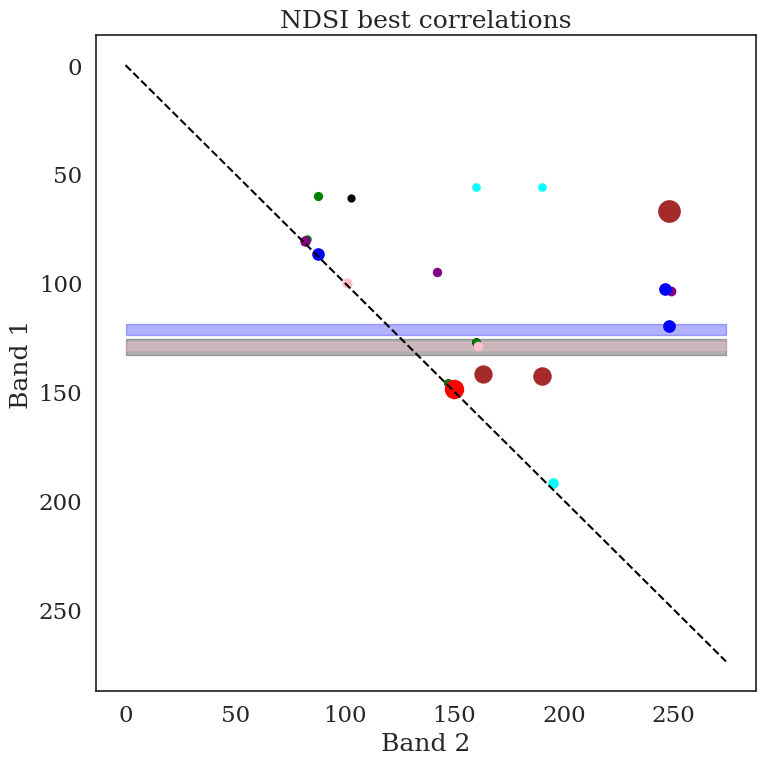

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize = (8,8))

# Iterate over the band numbers and plot the dots:
for row in corr_bands:
  color = 'grey'
  lw = 1
  #marker_size = 6  # Define the marker size for non-black dots
  if (row[0]=='all') & (row[1]=='all') & (row[2]=='all'):
    color = 'black'
    lw = 2.5
    #marker_size = (4*(row[3][2]))**2  # Define the marker size for black dots
  elif row[0] == 'drought':
    color  = 'pink'
  elif row[0] == 'control':
    color = 'green'
  elif 'average' in row[:4]:
    color = 'brown'
  elif row[1] != 'all':
    color = color_dict[row[1]]

  for band1, band2, APC in row[4]:
    x_values = band2
    y_values = band1
    marker_size = (4*APC)**2
    ax.plot(x_values, y_values, '-o',color = color,markersize=marker_size)

#plot the lines:
  for hline in row[5]:
    plt.axhline(hline, color = color, lw = lw)
  for vline in row[6]:
    plt.axvline(vline, color = color, lw = lw)

# Plot the colored area
  for area in row[7]:
    start_y, end_y = area
    ax.fill_betweenx([start_y,end_y], 0 ,274, color=color, alpha=0.3)

  for area in row[8]:
      start_x, end_x = area
      ax.fill_between([start_x, end_x], 0,247, color=color, alpha=0.3)

#set ticks and labels
ax.set_xticks(range(274)[::50])
# ax.set_xticklabels([band_dict[int(wl)] for wl in df.columns[11:][::50]])  ### cancel this line to get the band numbers in the axes.

ax.set_yticks(range(274)[::50])
# ax.set_yticklabels([band_dict[int(wl)] for wl in df.columns[11:][::50]])  ### cancel this line to get the band numbers in the axes.


# Reverse the y-axis
ax.invert_yaxis()

# Set the y-axis label
ax.set_ylabel('Band 1')

# Set the x-axis label
ax.set_xlabel('Band 2')

# Set the title
ax.set_title('NDSI best correlations')

#set the legend:
# ax.legend()

ax.plot([0, 274], [0, 274], color='black', linestyle='--')
# Show the plot
plt.tight_layout()
plt.show()

### defind best correlations:

In [ ]:
best_corrs = [('NDSI_1', 61, 103), ('NDSI_2', 129, 161), ('NDSI_3', 103, 246), ('NDSI_4', 120, 148), ('NDVI', 184, 124), ('MNDWI', 70, 178), ('PRI', 61, 79)]

In [ ]:
NDSI_list = [('New\nNDSI',190,143), ('NDVI', 184, 124), ('MNDWI', 70, 178),('GNDVI',70,183), ('PRI', 61, 79),('NDWSI',205,260)]

### functions to make and plot NDSI vs LWP

In [ ]:
df2 = df

In [7]:
#Function to calculate NDSI
def calculate_ndsi(row, band1, band2):
    return (row[band1] - row[band2]) / (row[band1] + row[band2])

In [8]:
# Scatter plot with R-squared and RMSE
def plot_scatter_with_metrics(df, x_col, y_col):
    plt.scatter(df[x_col], df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Linear regression fit
    fit = np.polyfit(df[x_col], df[y_col], 1)
    fit_fn = np.poly1d(fit)
    plt.plot(df[x_col], fit_fn(df[x_col]), 'r-', linewidth=2)

    # R-squared value
    r2 = r2_score(df[y_col], fit_fn(df[x_col]))
    plt.text(1.05, 0.9, f'R-squared: {r2:.2f}', transform=plt.gca().transAxes)

    # RMSE value
    rmse = np.sqrt(mean_squared_error(df[y_col], fit_fn(df[x_col])))
    plt.text(1.05, 0.8, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes)

    plt.show()



In [ ]:
#make list for the points
points_list = []

#make columns of NDSI in the df2
for row in NDSI_list:
  df2[row[0]] = df2.apply(calculate_ndsi, args=(row[1],row[2]), axis=1)
  points_list.append((row[0]))


######################this is for the initial corr_bands###########################

# known_NDSI = [
#     ['NDVI',(124,184)],
#     ['MNDWI',(70,178)],
#     ['PRI',(61,79)]
#   ]

# #make columns of NDSI in the df2
# for row in corr_bands:
#   for band1, band2, APC in row[3]:
#     NDSI =  (band1 , band2)
#     df2[NDSI] = df2.apply(calculate_ndsi, args=(band1,band2), axis=1)
#     points_list.append(NDSI)

# #add known NDSI
# for row in known_NDSI:
#   NDSI = row[0]
#   for band1, band2 in [row[1]]:
#     df2[NDSI] = df2.apply(calculate_ndsi, args=(band1,band2), axis=1)
#     points_list.append(NDSI)
# print (points_list)

### plot the NDSI

In [ ]:
#make new smaller dataframe to work with - without all the bands
NDSI_df = df2[df2.columns[-12:]]
df_ = NDSI_df

In [ ]:
#title = 'Averaged by Specieses & treatments'

####plotting for the poster

barplot

<ipython-input-28-68a0e2a82fc7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['plot','spectral_date']).mean()


New
NDSI
r2 = 0.790
NDVI
r2 = 0.695
MNDWI
r2 = 0.768
GNDVI
r2 = 0.769
PRI
r2 = 0.001
NDWSI
r2 = 0.151


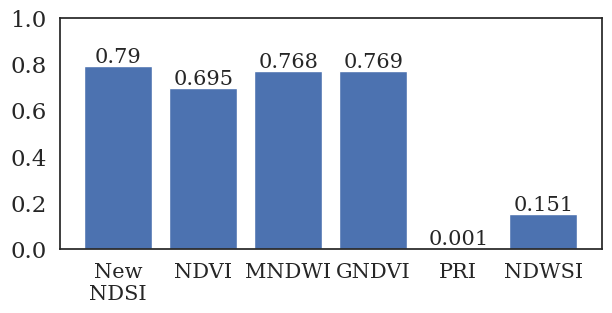

In [ ]:
# Calculate the mean and standard deviation for all columns
stats_df = df_.groupby(by = ['plot','spectral_date']).mean()

# Define the target column name
target_col = 'LWP'

compare_cols = points_list
r2_list = []
for col in compare_cols:
#get some stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(stats_df['LWP'], stats_df[col])
    print (f'{col}\nr2 = {r_value**2:.3f}')
    r2_list.append((col,round(r_value**2,3)))
# Extract the labels and values from the list of tuples
labels = [item[0] for item in r2_list]
values = [item[1] for item in r2_list]

#make the figure
fig, ax = plt.subplots(figsize=(7, 3))

# Create a bar plot
plt.bar(labels, values, )

# Add the values on top of each bar
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom', size = 15)
#adjust the size of labels
plt.xticks(fontsize=15)

#set y limits
ax.set_ylim(0, 1)

# Display the plot
plt.show()

plotting the second fig, grouped by plots and dates

In [10]:
df2 = df
df2['NDSI_p_d'] = calculate_ndsi(df2, 190,143)
NDSI_df = df2[df2.columns[-12:]]
df_ = NDSI_df
df_

269       270       271       272       273       274    LWP  \
0    0.220716  0.222754  0.225129  0.227839  0.230886  0.234268 -1.150   
15   0.224795  0.226843  0.229209  0.231894  0.234896  0.238218 -1.070   
14   0.136527  0.137894  0.139457  0.141216  0.143169  0.145318 -1.500   
12   0.269552  0.271827  0.274488  0.277538  0.280974  0.284798 -2.900   
11   0.235465  0.237569  0.240038  0.242870  0.246067  0.249627 -1.800   
..        ...       ...       ...       ...       ...       ...    ...   
220  0.340492  0.340681  0.340734  0.340649  0.340427  0.340068 -0.311   
219  0.188204  0.188189  0.188086  0.187896  0.187620  0.187256 -1.316   
244  0.240647  0.240941  0.241184  0.241376  0.241517  0.241606 -1.960   
231  0.307987  0.307431  0.306699  0.305793  0.304711  0.303453 -1.905   
245  0.168854  0.168240  0.167605  0.166947  0.166267  0.165566 -1.798   

    spectral_date treatment  plot English_name  NDSI_p_d  
0      2022-03-14   drought     5      cypress  0.398845  
15     2022-03-14   drought     2      cypress  0.445429  
14     2022-03-14   drought     2          oak  0.404918  
12     2022-03-14   drought     2         pine  0.377062  
11     2022-03-14   drought     2        carob  0.497184  
..            ...       ...   ...          ...       ...  
220    2023-02-13   control     4     pistacia  0.482119  
219    2023-02-13   control     4      cypress  0.447974  
244    2023-02-13   control     3        carob  0.486814  
231    2023-02-13   control     1         pine  0.344399  
245    2023-02-13   drought     6        carob  0.416075  

[245 rows x 12 columns]

In [11]:
# Calculate the mean and standard deviation for all columns
stats_df = df_.groupby(by=['plot', 'spectral_date']).mean().join(NDSI_df.groupby(by=['plot', 'spectral_date']).std(),
                                                               lsuffix='_mean', rsuffix='_std')

# Define the target column name
target_col = 'LWP'

# Define the column to use for regression (NDSI)
regression_col = 'New\nNDSI'

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8.3, 6))

# Store the legend patches
legend_patches = []

# Loop through each plot and date
for (plot, date), data in stats_df.iterrows():
    x_mean = data[regression_col + '_mean']
    x_std = data[regression_col + '_std']
    y_mean = data[target_col + '_mean']
    y_std = data[target_col + '_std']

    # Scatter plot with error bars for each plot and date
    ax.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, marker='o', color='black', elinewidth=0.5, markersize=4.5)

# Fit the linear regression model
reg = LinearRegression().fit(stats_df[regression_col + '_mean'].values.reshape(-1, 1),
                             stats_df[target_col + '_mean'].values)
y_pred = reg.predict(stats_df[regression_col + '_mean'].values.reshape(-1, 1))

# Calculate R-squared score and RMSE
r2 = r2_score(stats_df[target_col + '_mean'], y_pred)
rmse = mean_squared_error(stats_df[target_col + '_mean'], y_pred, squared=False)

#more statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(stats_df[regression_col + '_mean'],stats_df[target_col + '_mean'])

# Plot the regression line
sns.regplot(x=stats_df[regression_col + '_mean'], y=stats_df[target_col + '_mean'], ax=ax, color='red',
            scatter=False, line_kws={'linestyle': '--'})

# Add R-squared value in the upper right corner
ax.text(0.98, 0.96, f'R$^2$={r2:.2f}', transform=ax.transAxes, ha='right', va='top', color='black')
#add regression equation:
ax.text(0.05, 0.96, f'Y = {round(slope,2)}X {round(intercept,2)}', transform=ax.transAxes, ha='left', va='top', color='black')

# Set the title, x-axis and y-axis labels
ax.set_title(f'LWP vs NDSI - averaged by plot and date')
ax.set_xlabel('NDSI from bands 816 and 712 nm')
ax.set_ylabel('LWP (MPa)', fontsize=16)
ax.set_ylim(-5, 0)

plt.show()

TypeError: agg function failed [how->mean,dtype->object]

<ipython-input-185-f102ac6d48bd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by=['plot', 'spectral_date']).mean()


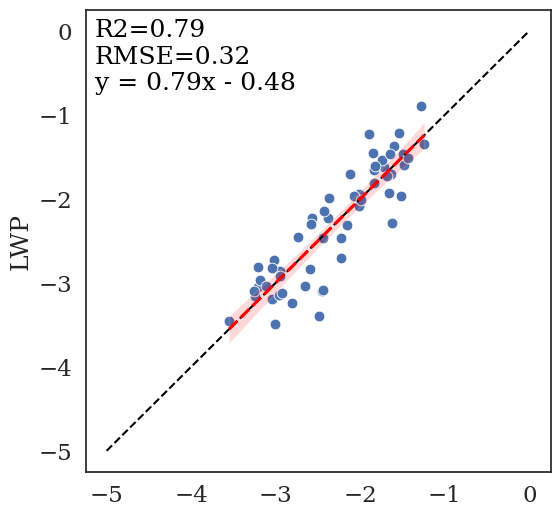

In [ ]:
# Calculate the mean and standard deviation for all columns
stats_df = df_.groupby(by=['plot', 'spectral_date']).mean()

# Define the target column name
target_col = 'LWP'

# Define the column to use for regression (NDSI)
NDSI_col = 'NDSI_p_d'

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Fit the linear regression model
reg = LinearRegression().fit(stats_df[NDSI_col].values.reshape(-1, 1),
                             stats_df[target_col].values)
# make prediction for the LWP from NDSI values
y_pred = reg.predict(stats_df[NDSI_col].values.reshape(-1, 1))

# Calculate R-squared score and RMSE
r2 = r2_score(stats_df[target_col], y_pred)
rmse = mean_squared_error(stats_df[target_col], y_pred, squared=False)

#get some stats
slope, intercept, r_value, p_value, std_err = stats.linregress(stats_df[target_col], y_pred)

sns.scatterplot(x= y_pred, y=stats_df[target_col], ax=ax,s=60)

# Plot the diagonal 1:1 line
ax.plot([-5, 0], [-5, 0], color='black', linestyle='--')

# Plot the regression line
sns.regplot(x=y_pred, y=stats_df[target_col], ax=ax, color='red',
            scatter=False, line_kws={'linestyle': '--'})
equation = f'y = {slope:.2f}x - {-intercept:.2f}'
# Add R-squared value in the upper right corner
ax.text(0.02, 0.98, f'R2={r2:.2f}\nRMSE={rmse:.2f}\n{equation}', transform=ax.transAxes, ha='left', va='top', color='black')

# # Set the x-axis and y-axis labels
# ax.set_title('Measured LWP vs Predicted_LWP\naveraged by plot and date')
# ax.set_xlabel('Predicted LWP (MPa)')
# ax.set_ylabel('Measured LWP (MPa)', fontsize=16)
# ax.set_xlim(-4, -0.5)
# ax.set_ylim(-4, -0.5)

# # Set the same x-ticks for both axes
# ticks = [-4,-3,-2,-1]
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)

plt.show()

In [ ]:
import random
x_original = [random.randint(5, 10) for _ in range(15)]
y_original = [random.randint(20, 40) for _ in range(15)]
reg = LinearRegression().fit(np.array(x_original).reshape(-1, 1),y_original)
# make prediction for the LWP from NDSI values
y_pred = reg.predict(np.array(x_original).reshape(-1, 1))
print (y_original)
print (y_pred)

[20, 39, 35, 39, 20, 33, 37, 37, 31, 21, 28, 40, 23, 28, 40]
[30.40371991 31.43435449 30.40371991 32.98030635 30.40371991 32.98030635
 32.98030635 30.40371991 30.40371991 31.94967177 31.94967177 31.43435449
 32.46498906 30.40371991 30.40371991]


plotting the first fig with all the colours

In [ ]:
df2 = df
df2['NDSI_2_+'] = calculate_ndsi(df2, 161,129)
NDSI_df = df2[df2.columns[-12:]]
df_ = NDSI_df

In [ ]:
r2_dict = {'carob' : 0.32, 'cypress': 0.79, 'pine':0.37, 'pistacia':0.62, 'oak':0.51}

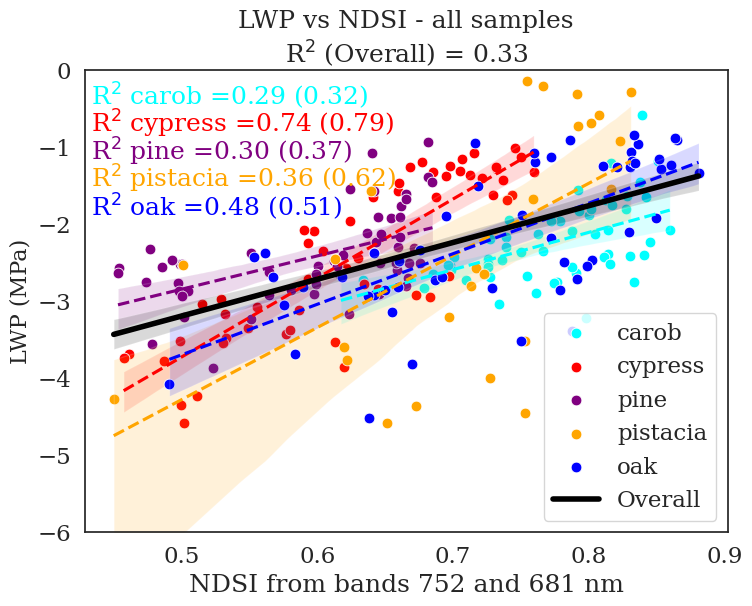

In [ ]:
title = 'LWP vs NDSI - all samples'

# Define the target column name
target_col = 'LWP'

# Define the column containing NDSI values
ndsi_col = 'NDSI_2_+'

# Create a figure with 2 rows and 4 columns of subplots
fig, ax = plt.subplots(figsize=(8.3, 6))
# fig.suptitle(f'{title}')
y_text = 0.98
# Loop through each species in the color dictionary
for species, color in color_dict.items():
    # Filter the dataframe for the current species
    species_df = df_[df_['English_name'] == species]
    # Get the NDSI and LWP values for the current species
    x = species_df[ndsi_col]
    y = species_df[target_col]

    # # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # Plot the scatterplot with points colored by species
    sns.scatterplot(x=x, y=y, ax=ax, s=60, color=color, label=species)
    # Plot the regression line for the current species
    sns.regplot(x=x, y=y, ax=ax, scatter=False, line_kws={'linestyle': '--'}, color=color)

    # Add R-squared value in the upper right corner
    ax.text(0.01, y_text, f'R$^2$ {species} ={r2:.2f} ({r2_dict[species]})', transform=ax.transAxes, ha='left', va='top', color=color)
    y_text -=0.06

# Plot the overall regression line for all points in black
overall_reg = LinearRegression().fit(df_[ndsi_col].values.reshape(-1, 1), df_[target_col].values)
sns.regplot(x=df_[ndsi_col], y=df_[target_col], ax=ax, scatter=False, line_kws={'color': 'black','lw':'4'}, label='Overall')

ax.set_xlabel('NDSI from bands 752 and 681 nm')
ax.set_ylabel('LWP (MPa)',fontsize=16)
ax.set_ylim(-6,0)
# ax.set_xlim(-1,0.5)
# ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')
ax.set_title(f'{title}\nR$^2$ (Overall) = {r2_score(df_[target_col], overall_reg.predict(df_[ndsi_col].values.reshape(-1, 1))):.2f}')

# Add the legend
ax.legend()

plt.show()

####plot NDSI vs LWP

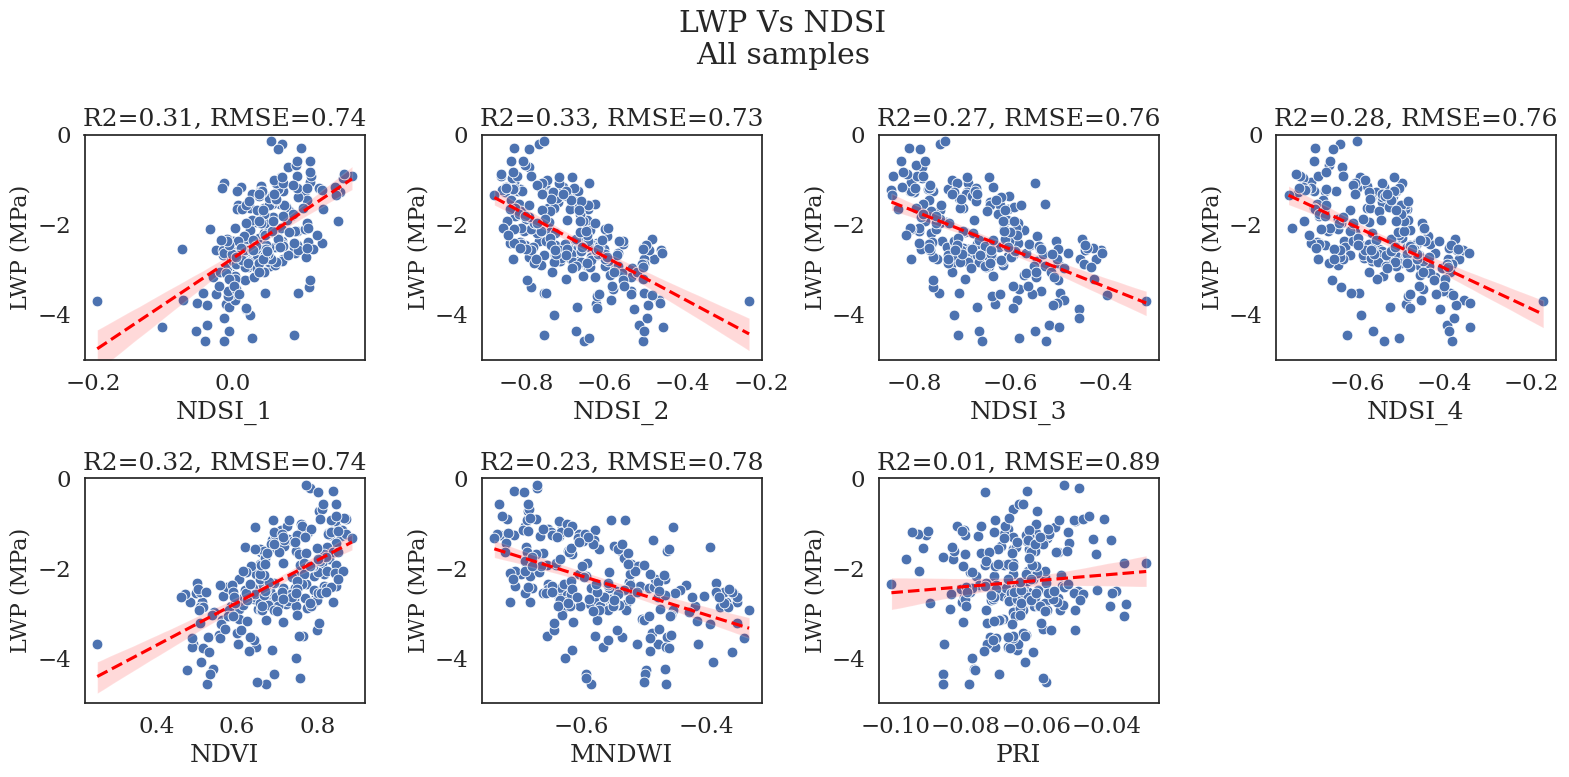

In [ ]:
title = 'All samples'

# Define the target column name
target_col = 'LWP'

# Define a list of columns to compare against the target
compare_cols = points_list

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle(f'LWP Vs NDSI\n{title}')

# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = df_[target_col]
    x = df_[col]


    # # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # Plot the scatterplot with the trend line
    sns.scatterplot(x=x, y=y, ax=ax,s=60 )
    sns.regplot(x=x, y=y, ax=ax, color='red', scatter=False, line_kws={'linestyle':'--'})

    # add 1:1 line
    # xmin, xmax = ax.get_xlim()  # Get the x-axis limits
    # ymin, ymax = ax.get_ylim()  # Get the y-axis limits
    # ax.plot([xmin, xmax], [ymin, ymax], color='black',)

    #to make the xlabel be in wavelengths:
    if type(col) == tuple:
      ax.set_xlabel(f'{band_dict[col[0]]}, {band_dict[col[1]]}')
    else:
      ax.set_xlabel(col)
    #to make xlabel be in the bands number:
    # ax.set_xlabel(col)         # cancel if needed to present wavelengths

    ax.set_ylabel('LWP (MPa)',fontsize=16)
    ax.set_ylim(-5,0)
    # ax.set_xlim(-1,0.5)
    ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')


# Adjust the layout and display the plot
axes[-1,-1].remove()
plt.tight_layout()
plt.show()

<ipython-input-38-51bbfd4d9947>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['English_name']).mean().join(NDSI_df.groupby(by = ['English_name']).std(), lsuffix='_mean', rsuffix='_std')
<ipython-input-38-51bbfd4d9947>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['English_name']).mean().join(NDSI_df.groupby(by = ['English_name']).std(), lsuffix='_mean', rsuffix='_std')


statistics of NDSI_1: 
p-value = 0.045 
pearson = 0.887
R^2 = 0.787

statistics of NDSI_2: 
p-value = 0.053 
pearson = -0.874
R^2 = 0.764

statistics of NDSI_3: 
p-value = 0.08 
pearson = -0.833
R^2 = 0.693

statistics of NDSI_4: 
p-value = 0.053 
pearson = -0.873
R^2 = 0.762

statistics of NDVI: 
p-value = 0.054 
pearson = 0.872
R^2 = 0.76

statistics of MNDWI: 
p-value = 0.154 
pearson = -0.738
R^2 = 0.545

statistics of PRI: 
p-value = 0.966 
pearson = 0.027
R^2 = 0.001



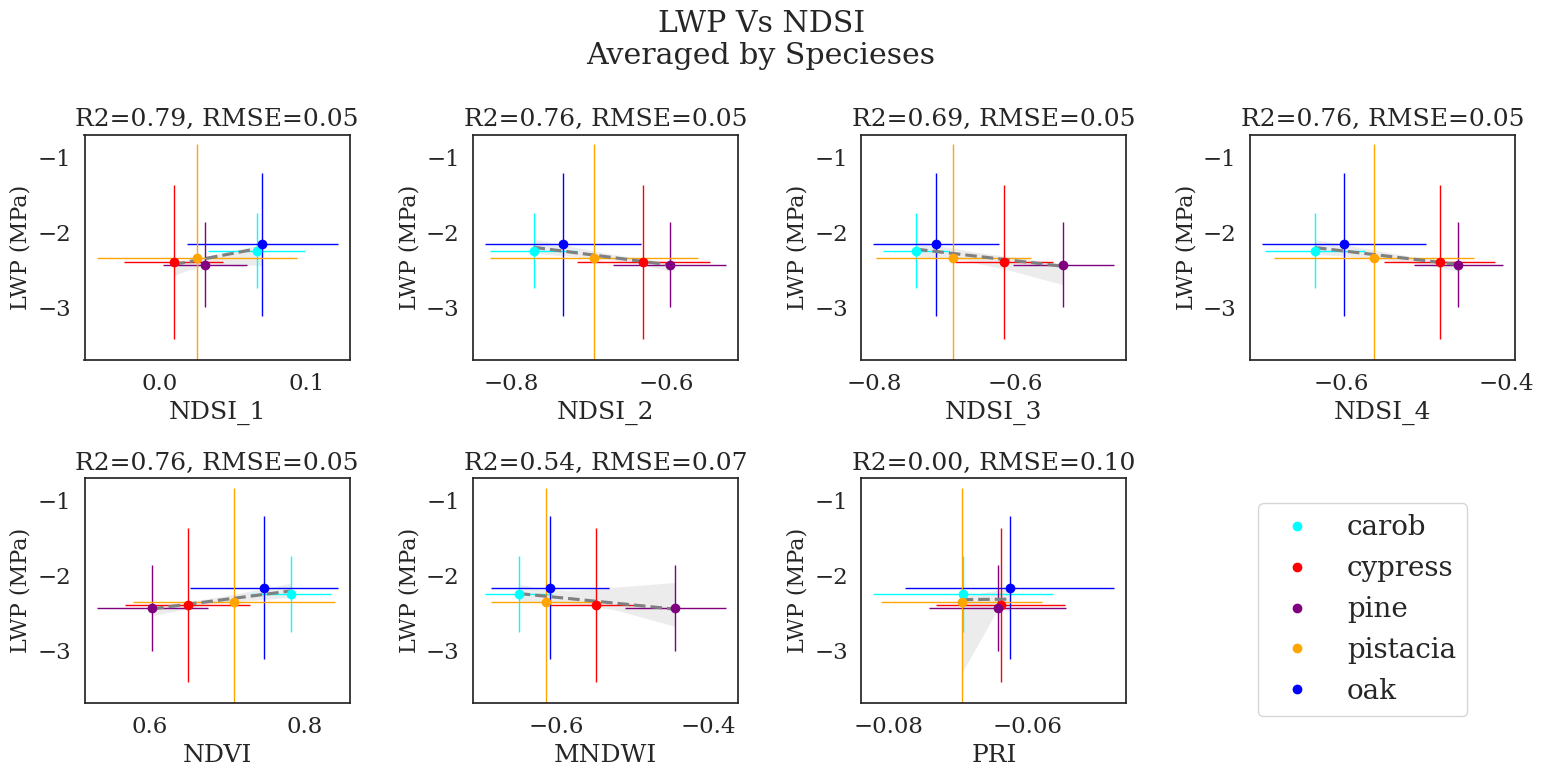

In [ ]:
title = 'Averaged by Specieses'

# Calculate the mean and standard deviation for all columns
stats_df = df_.groupby(by = ['English_name']).mean().join(NDSI_df.groupby(by = ['English_name']).std(), lsuffix='_mean', rsuffix='_std')

# Define the target column name
target_col = 'LWP'

# Define a list of columns to compare against the target
compare_cols = points_list

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle(f'LWP Vs NDSI\n{title}')
# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = stats_df[target_col+'_mean']
    x = stats_df[col+'_mean']

    # # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # # Plot the scatterplot with the trend line
    # for (species, treatment), data in stats_df.iterrows():
    #     if treatment == 'drought':
    #         marker = 's'
    #         s = 100
    #         facecolor='none'
    #         linewidths=2.5
    #     else:
    #         marker = 'o'
    #         facecolor=color_dict[species]
    #         s = 60
    #         linewidths = 1
    #     ax.scatter(data[col + '_mean'], data[target_col + '_mean'], marker=marker, s=s, color=color_dict[species], facecolor=facecolor,linewidths=linewidths )

    #Scatter plot with error bars for each species
    for species, data in stats_df.iterrows():
        x_mean, x_std = data[col + '_mean'], data[col + '_std']
        y_mean, y_std = data[target_col + '_mean'], data[target_col + '_std']
        marker = 'o'
        markerfacecolor = color_dict[species]
        markersize = 5
        markeredgewidth = 2
        ax.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, marker=marker,markersize=markersize, markeredgewidth=markeredgewidth, label=species, color=color_dict[species], elinewidth= 1,markerfacecolor=markerfacecolor)

    sns.regplot(x=x, y=y, ax=ax, color='grey', scatter=False, line_kws={'linestyle':'--'})

    # add 1:1 line
    # xmin, xmax = ax.get_xlim()  # Get the x-axis limits
    # ymin, ymax = ax.get_ylim()  # Get the y-axis limits
    # ax.plot([xmin, xmax], [ymin, ymax], color='black',)

    #to make the xlabel be in wavelengths:
    if type(col) == tuple:
      ax.set_xlabel(f'{band_dict[col[0]]}, {band_dict[col[1]]}')
    else:
      ax.set_xlabel(col)
    #to make xlabel be in the bands number:
    # ax.set_xlabel(col)         # cancel if needed to present wavelengths

    ax.set_ylabel('LWP (MPa)',fontsize=16)
    ax.set_ylim(-3.7,-0.7)
    # ax.set_xlim(-1,0.5)
    ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')

    #get some stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(stats_df['LWP_mean'], stats_df[col+'_mean'])
    print (f'statistics of {col}: \np-value = {round(p_value,3)} \npearson = {round(r_value,3)}\nR^2 = {round(r_value ** 2,3)}\n')
#Adjust the legend
handles = [mlines.Line2D([], [], color=color_dict[species], marker='o', linestyle='None') for species in color_dict.keys()]
# for h in [mlines.Line2D([], [], color=color_dict[species], marker='s', linestyle='None',markerfacecolor='none', markeredgewidth = 2, markersize = 10) for species in color_dict.keys()]:
#   handles.append(h)
fig.legend(handles = handles, loc='lower right', bbox_to_anchor= (0.95,0.08), fontsize=20, labels= color_dict.keys())
          #  labels = ['carob control', 'cypress control', 'pine control', 'pistacia control', 'oak control', 'carob drought', 'cypress drought', 'pine drought', 'pistacia drought', 'oak drought'])

# Adjust the layout and display the plot
axes[-1,-1].remove()

plt.tight_layout()
plt.show()

<ipython-input-54-9797639c8a5a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['English_name','treatment']).mean().join(NDSI_df.groupby(by = ['English_name','treatment']).std(), lsuffix='_mean', rsuffix='_std')
<ipython-input-54-9797639c8a5a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['English_name','treatment']).mean().join(NDSI_df.groupby(by = ['English_name','treatment']).std(), lsuffix='_mean', rsuffix='_std')


statistics of NDSI_1: 
p-value = 0.0 
pearson = 0.925
R^2 = 0.855

statistics of NDSI_2: 
p-value = 0.001 
pearson = -0.866
R^2 = 0.75

statistics of NDSI_3: 
p-value = 0.011 
pearson = -0.76
R^2 = 0.578

statistics of NDSI_4: 
p-value = 0.002 
pearson = -0.848
R^2 = 0.719

statistics of NDVI: 
p-value = 0.001 
pearson = 0.858
R^2 = 0.736

statistics of MNDWI: 
p-value = 0.085 
pearson = -0.571
R^2 = 0.326

statistics of PRI: 
p-value = 0.269 
pearson = 0.387
R^2 = 0.15



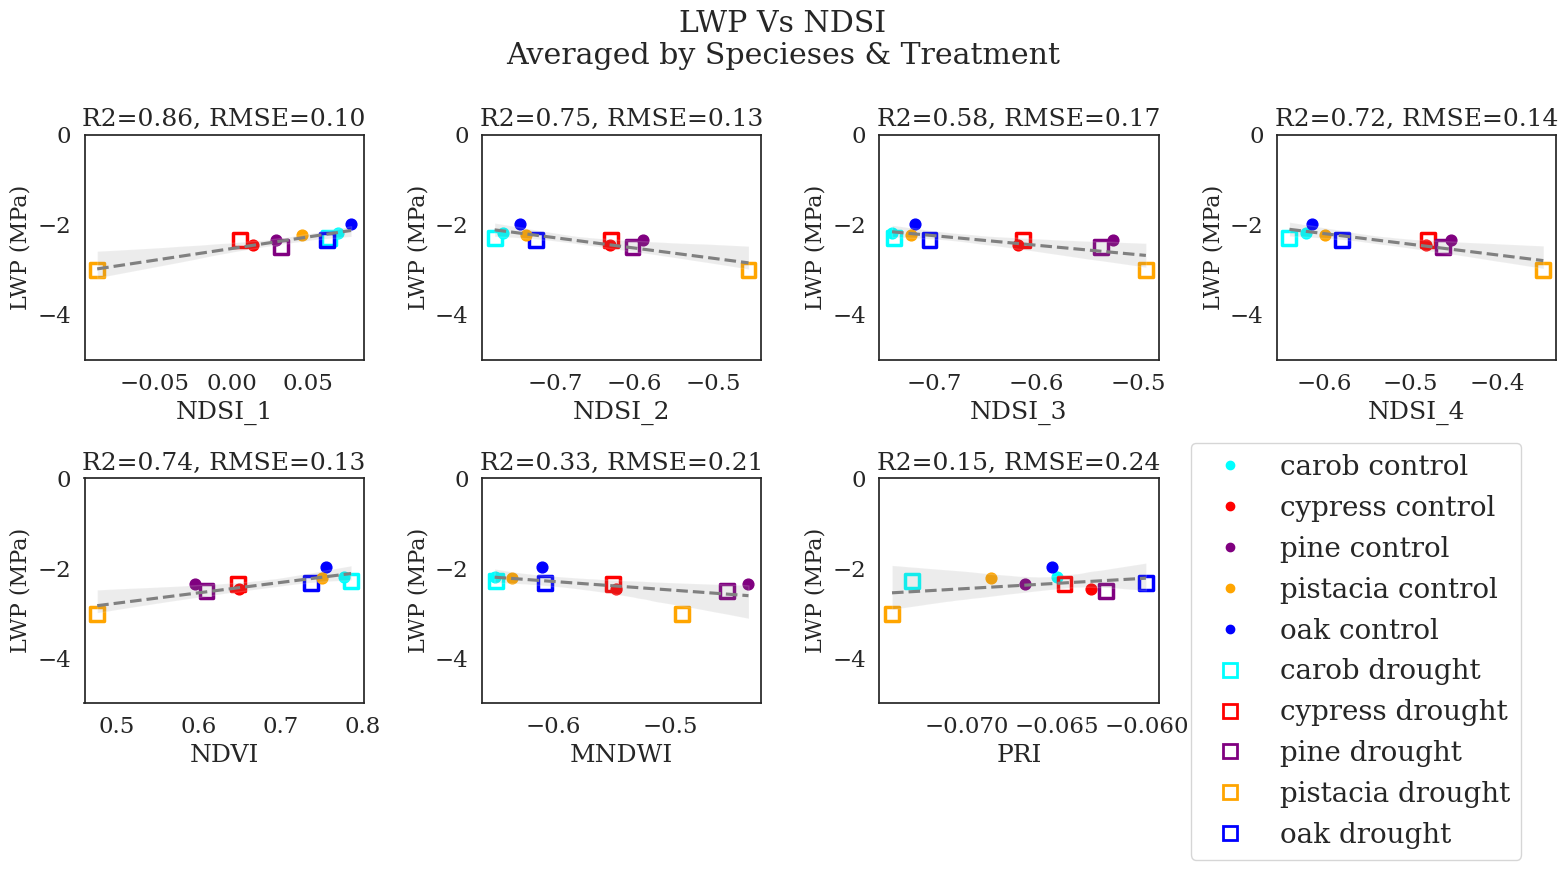

In [ ]:
title = 'Averaged by Specieses & Treatment'

# Calculate the mean and standard deviation for all columns
stats_df = df_.groupby(by = ['English_name','treatment']).mean().join(NDSI_df.groupby(by = ['English_name','treatment']).std(), lsuffix='_mean', rsuffix='_std')

# Define the target column name
target_col = 'LWP'

# Define a list of columns to compare against the target
compare_cols = points_list

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle(f'LWP Vs NDSI\n{title}')
# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = stats_df[target_col+'_mean']
    x = stats_df[col+'_mean']

    # # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # # Plot the scatterplot with the trend line
    # for (species, treatment), data in stats_df.iterrows():
    #     if treatment == 'drought':
    #         marker = 's'
    #         s = 100
    #         facecolor='none'
    #         linewidths=2.5
    #     else:
    #         marker = 'o'
    #         facecolor=color_dict[species]
    #         s = 60
    #         linewidths = 1
    #     ax.scatter(data[col + '_mean'], data[target_col + '_mean'], marker=marker, s=s, color=color_dict[species], facecolor=facecolor,linewidths=linewidths )

    Scatter plot with error bars for each species
    for (species, treatment), data in stats_df.iterrows():
        x_mean, x_std = data[col + '_mean'], data[col + '_std']
        y_mean, y_std = data[target_col + '_mean'], data[target_col + '_std']
        if treatment == 'drought':
            marker = 's'
            markerfacecolor='none'
            markersize = 10
            markeredgewidth = 2
        else:
            marker = 'o'
            markerfacecolor = color_dict[species]
            markersize = 5
            markeredgewidth = 2
        ax.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, marker=marker,markersize=markersize, markeredgewidth=markeredgewidth, label=species, color=color_dict[species], elinewidth= 1,markerfacecolor=markerfacecolor)

    sns.regplot(x=x, y=y, ax=ax, color='grey', scatter=False, line_kws={'linestyle':'--'})

    # add 1:1 line
    # xmin, xmax = ax.get_xlim()  # Get the x-axis limits
    # ymin, ymax = ax.get_ylim()  # Get the y-axis limits
    # ax.plot([xmin, xmax], [ymin, ymax], color='black',)

    #to make the xlabel be in wavelengths:
    if type(col) == tuple:
      ax.set_xlabel(f'{band_dict[col[0]]}, {band_dict[col[1]]}')
    else:
      ax.set_xlabel(col)
    #to make xlabel be in the bands number:
    # ax.set_xlabel(col)         # cancel if needed to present wavelengths

    ax.set_ylabel('LWP (MPa)',fontsize=16)
    ax.set_ylim(-5,0)
    # ax.set_xlim(-1,0.5)
    ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')

    #get some stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(stats_df['LWP_mean'], stats_df[col+'_mean'])
    print (f'statistics of {col}: \np-value = {round(p_value,3)} \npearson = {round(r_value,3)}\nR^2 = {round(r_value ** 2,3)}\n')
#Adjust the legend
handles = [mlines.Line2D([], [], color=color_dict[species], marker='o', linestyle='None') for species in color_dict.keys()]
for h in [mlines.Line2D([], [], color=color_dict[species], marker='s', linestyle='None',markerfacecolor='none', markeredgewidth = 2, markersize = 10) for species in color_dict.keys()]:
  handles.append(h)
fig.legend(handles = handles, loc='lower right', bbox_to_anchor= (0.97,-0.1), fontsize=20,
           labels = ['carob control', 'cypress control', 'pine control', 'pistacia control', 'oak control', 'carob drought', 'cypress drought', 'pine drought', 'pistacia drought', 'oak drought'])

# Adjust the layout and display the plot
axes[-1,-1].remove()

plt.tight_layout()
plt.show()

<ipython-input-39-0e0dac6537ae>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['English_name','spectral_date']).mean().join(NDSI_df.groupby(by = ['English_name','spectral_date']).std(), lsuffix='_mean', rsuffix='_std')
<ipython-input-39-0e0dac6537ae>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['English_name','spectral_date']).mean().join(NDSI_df.groupby(by = ['English_name','spectral_date']).std(), lsuffix='_mean', rsuffix='_std')


statistics of NDSI_1: 
p-value = 0.0 
pearson = 0.672
R^2 = 0.452

statistics of NDSI_2: 
p-value = 0.0 
pearson = -0.671
R^2 = 0.451

statistics of NDSI_3: 
p-value = 0.0 
pearson = -0.589
R^2 = 0.347

statistics of NDSI_4: 
p-value = 0.0 
pearson = -0.637
R^2 = 0.406

statistics of NDVI: 
p-value = 0.0 
pearson = 0.661
R^2 = 0.437

statistics of MNDWI: 
p-value = 0.0 
pearson = -0.554
R^2 = 0.306

statistics of PRI: 
p-value = 0.347 
pearson = 0.137
R^2 = 0.019



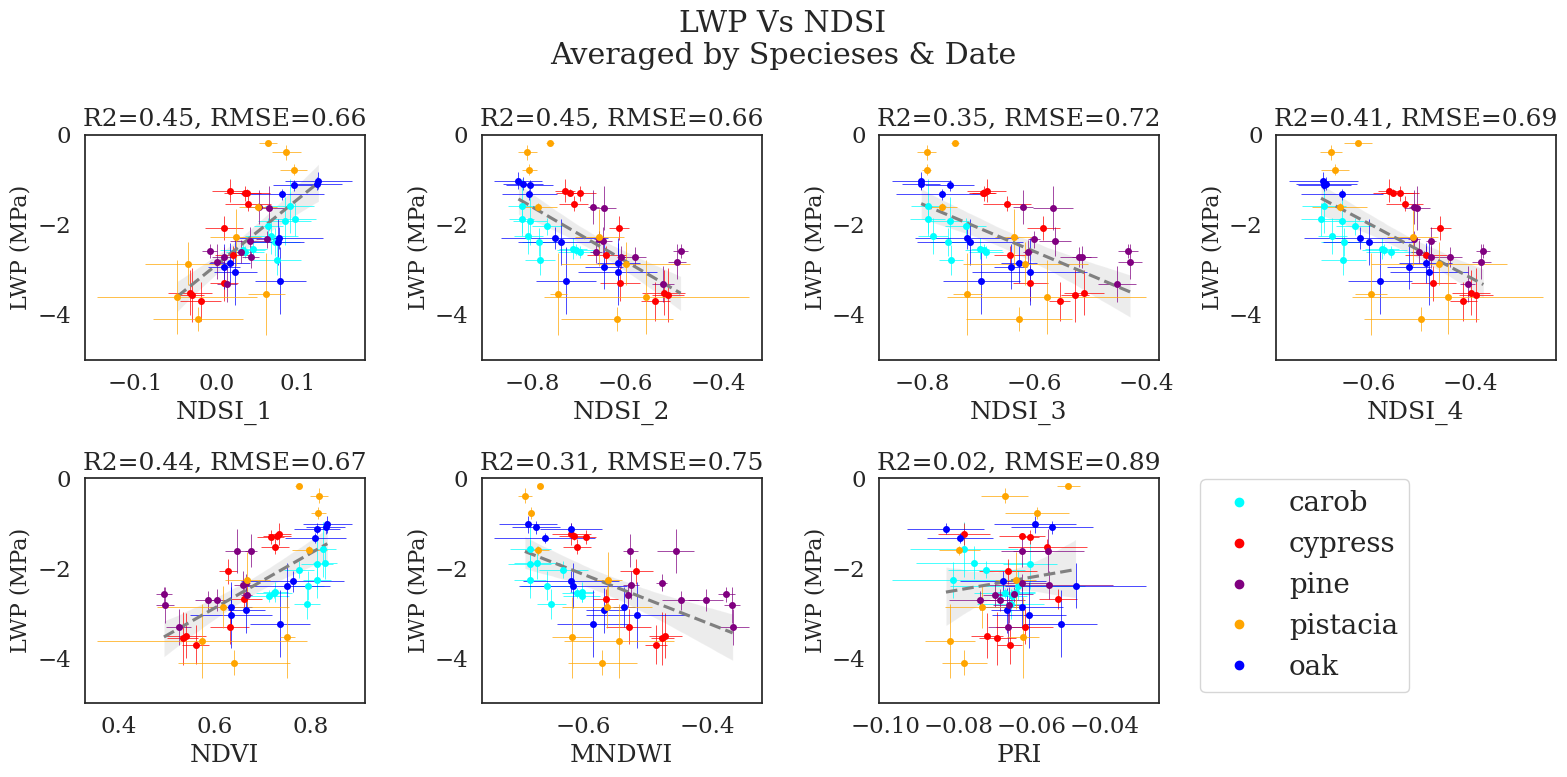

In [ ]:
title = 'Averaged by Specieses & Date'

# Calculate the mean and standard deviation for all columns
stats_df = df_.groupby(by = ['English_name','spectral_date']).mean().join(NDSI_df.groupby(by = ['English_name','spectral_date']).std(), lsuffix='_mean', rsuffix='_std')

# Define the target column name
target_col = 'LWP'

# Define a list of columns to compare against the target
compare_cols = points_list

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle(f'LWP Vs NDSI\n{title}')
# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = stats_df[target_col+'_mean']
    x = stats_df[col+'_mean']

    # # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # # Plot the scatterplot with the trend line
    # for (species, treatment), data in stats_df.iterrows():
    #     if treatment == 'drought':
    #         marker = 'x'
    #     else:
    #         marker = 'o'
    #     ax.scatter(data[col + '_mean'], data[target_col + '_mean'], marker=marker, color=color_dict[species] )

    # Scatter plot with error bars for each species
    for (species, treatment), data in stats_df.iterrows():
        x_mean, x_std = data[col + '_mean'], data[col + '_std']
        y_mean, y_std = data[target_col + '_mean'], data[target_col + '_std']
        if treatment == 'drought':
            marker = 's'
            markerfacecolor='none'
            markersize = 10
            markeredgewidth = 2
        else:
            marker = 'o'
            markerfacecolor = color_dict[species]
            markersize = 3
            markeredgewidth = 2
        ax.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, marker=marker,markersize=markersize, markeredgewidth=markeredgewidth, label=species, color=color_dict[species], elinewidth= 0.5,markerfacecolor=markerfacecolor)
    sns.regplot(x=x, y=y, ax=ax, color='grey', scatter=False, line_kws={'linestyle':'--'})

    # # add 1:1 line
    # xmin, xmax = ax.get_xlim()  # Get the x-axis limits
    # ymin, ymax = ax.get_ylim()  # Get the y-axis limits
    # ax.plot([xmin, xmax], [ymin, ymax], color='black',)

    #to make the xlabel be in wavelengths:
    if type(col) == tuple:
      ax.set_xlabel(f'{band_dict[col[0]]}, {band_dict[col[1]]}')
    else:
      ax.set_xlabel(col)
    #to make xlabel be in the bands number:
    # ax.set_xlabel(col)         # cancel if needed to present wavelengths

    ax.set_ylabel('LWP (MPa)',fontsize=16)
    ax.set_ylim(-5,0)
    # ax.set_xlim(-5,0)
    ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')

    #get some stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(stats_df['LWP_mean'], stats_df[col+'_mean'])
    print (f'statistics of {col}: \np-value = {round(p_value,3)} \npearson = {round(r_value,3)}\nR^2 = {round(r_value ** 2,3)}\n')
#Adjust the legend
handles = [mlines.Line2D([], [], color=color_dict[species], marker='o', linestyle='None') for species in color_dict.keys()]
fig.legend(handles = handles, loc='lower right', bbox_to_anchor=axes[-1, -1].get_position(), fontsize=20, labels = color_dict.keys())

# Adjust the layout and display the plot
axes[-1,-1].remove()

plt.tight_layout()
plt.show()

<ipython-input-66-1e8e244eb2aa>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['treatment','spectral_date']).mean().join(NDSI_df.groupby(by = ['treatment','spectral_date']).std(), lsuffix='_mean', rsuffix='_std')
<ipython-input-66-1e8e244eb2aa>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['treatment','spectral_date']).mean().join(NDSI_df.groupby(by = ['treatment','spectral_date']).std(), lsuffix='_mean', rsuffix='_std')


statistics of NDSI_1: 
p-value = 0.0 
pearson = 0.805
R^2 = 0.648

statistics of NDSI_2: 
p-value = 0.0 
pearson = -0.88
R^2 = 0.774

statistics of NDSI_3: 
p-value = 0.0 
pearson = -0.892
R^2 = 0.796

statistics of NDSI_4: 
p-value = 0.0 
pearson = -0.875
R^2 = 0.765

statistics of NDVI: 
p-value = 0.0 
pearson = 0.883
R^2 = 0.779

statistics of MNDWI: 
p-value = 0.0 
pearson = -0.924
R^2 = 0.853

statistics of PRI: 
p-value = 0.882 
pearson = 0.036
R^2 = 0.001



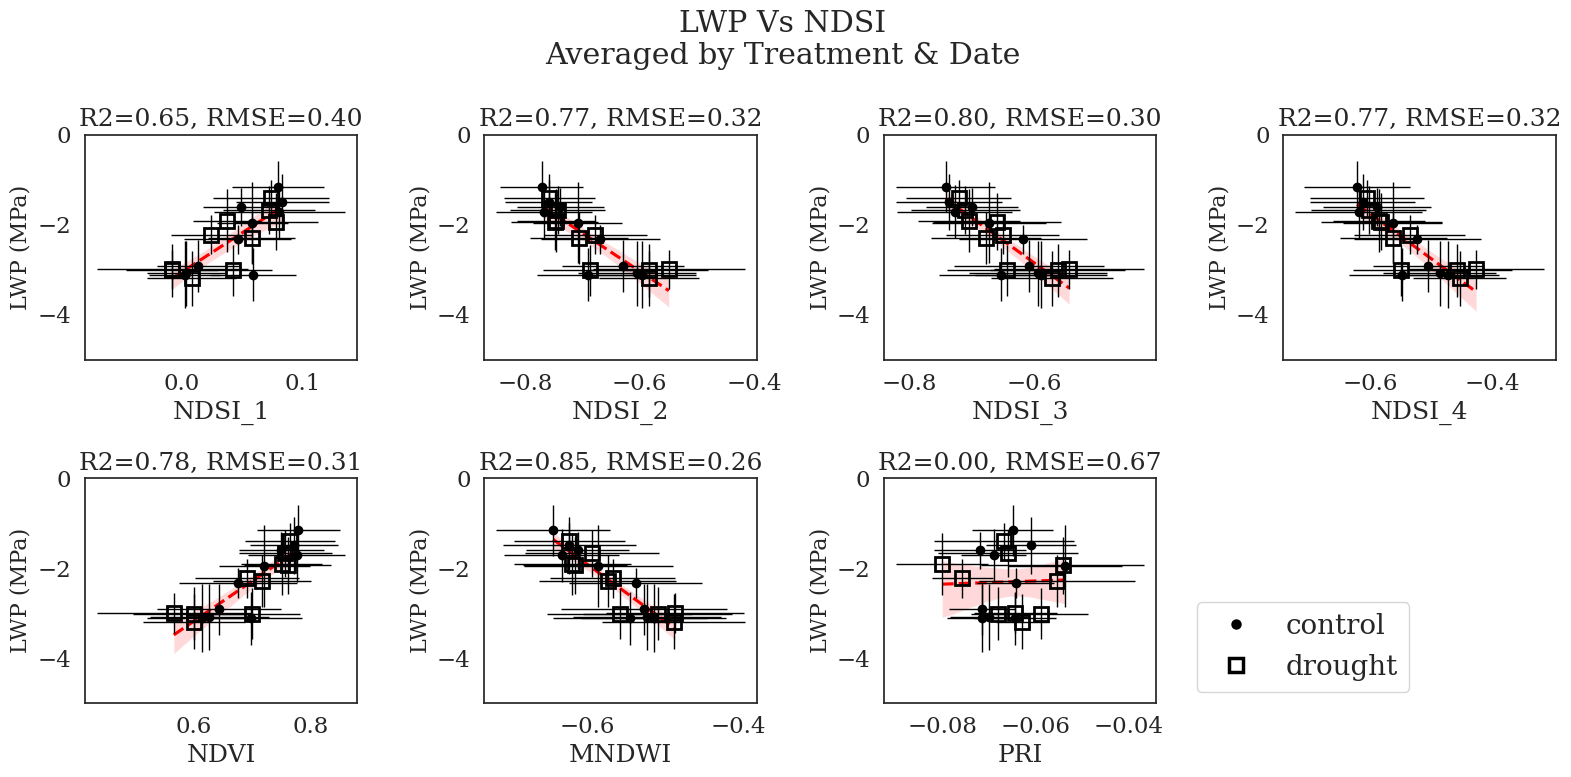

In [ ]:
title = 'Averaged by Treatment & Date'

# Calculate the mean and standard deviation for all columns
stats_df = df_.groupby(by = ['treatment','spectral_date']).mean().join(NDSI_df.groupby(by = ['treatment','spectral_date']).std(), lsuffix='_mean', rsuffix='_std')

# Define the target column name
target_col = 'LWP'

# Define a list of columns to compare against the target
compare_cols = points_list

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle(f'LWP Vs NDSI\n{title}')
# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = stats_df[target_col+'_mean']
    x = stats_df[col+'_mean']

    # # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # # Plot the scatterplot with the trend line
    # for (species, treatment), data in stats_df.iterrows():
    #     if treatment == 'drought':
    #         marker = 'x'
    #     else:
    #         marker = 'o'
    #     ax.scatter(data[col + '_mean'], data[target_col + '_mean'], marker=marker)#, color=color_dict[species] )
    sns.regplot(x=x, y=y, ax=ax, color='red', scatter=False, line_kws={'linestyle':'--'})

    # Scatter plot with error bars for each species
    for (treatment, date), data in stats_df.iterrows():
        x_mean, x_std = data[col + '_mean'], data[col + '_std']
        y_mean, y_std = data[target_col + '_mean'], data[target_col + '_std']
        if treatment == 'drought':
            marker = 's'
            markerfacecolor='none'
            markersize = 10
            markeredgewidth = 2
        else:
            marker = 'o'
            markerfacecolor = 'black'
            markersize = 5
            markeredgewidth = 2
        ax.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, marker=marker,markersize=markersize, markeredgewidth=markeredgewidth, label=species, color='black', elinewidth= 1,markerfacecolor=markerfacecolor)

    # add 1:1 line
    # xmin, xmax = ax.get_xlim()  # Get the x-axis limits
    # ymin, ymax = ax.get_ylim()  # Get the y-axis limits
    # ax.plot([xmin, xmax], [ymin, ymax], color='black',)

    #to make the xlabel be in wavelengths:
    if type(col) == tuple:
      ax.set_xlabel(f'{band_dict[col[0]]}, {band_dict[col[1]]}')
    else:
      ax.set_xlabel(col)
    #to make xlabel be in the bands number:
    # ax.set_xlabel(col)         # cancel if needed to present wavelengths

    ax.set_ylabel('LWP (MPa)',fontsize=16)
    ax.set_ylim(-5,0)
    # ax.set_xlim(-5,0)
    ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')

    #get some stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(stats_df['LWP_mean'], stats_df[col+'_mean'])
    print (f'statistics of {col}: \np-value = {round(p_value,3)} \npearson = {round(r_value,3)}\nR^2 = {round(r_value ** 2,3)}\n')
#Adjust the legend
handles = [mlines.Line2D([], [], color='black', marker= 'o', linestyle='None',markerfacecolor='black', markeredgecolor='black', markeredgewidth=1.5),mlines.Line2D([], [], color='black', marker= 's', linestyle='None',markerfacecolor='none', markeredgecolor='black', markeredgewidth=2.5, markersize = 10)]
fig.legend(handles = handles, loc='lower right', bbox_to_anchor=axes[-1, -1].get_position(), fontsize=20, labels = ['control','drought'])

# Adjust the layout and display the plot
axes[-1,-1].remove()

plt.tight_layout()
plt.show()

<ipython-input-67-328689c15b2a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby('spectral_date').mean().join(NDSI_df.groupby('spectral_date').std(), lsuffix='_mean', rsuffix='_std')
<ipython-input-67-328689c15b2a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby('spectral_date').mean().join(NDSI_df.groupby('spectral_date').std(), lsuffix='_mean', rsuffix='_std')


statistics of NDSI_1: 
p-value = 0.002 
pearson = 0.849
R^2 = 0.721

statistics of NDSI_2: 
p-value = 0.0 
pearson = -0.899
R^2 = 0.809

statistics of NDSI_3: 
p-value = 0.0 
pearson = -0.916
R^2 = 0.838

statistics of NDSI_4: 
p-value = 0.0 
pearson = -0.899
R^2 = 0.809

statistics of NDVI: 
p-value = 0.0 
pearson = 0.906
R^2 = 0.82

statistics of MNDWI: 
p-value = 0.0 
pearson = -0.943
R^2 = 0.888

statistics of PRI: 
p-value = 0.954 
pearson = 0.021
R^2 = 0.0



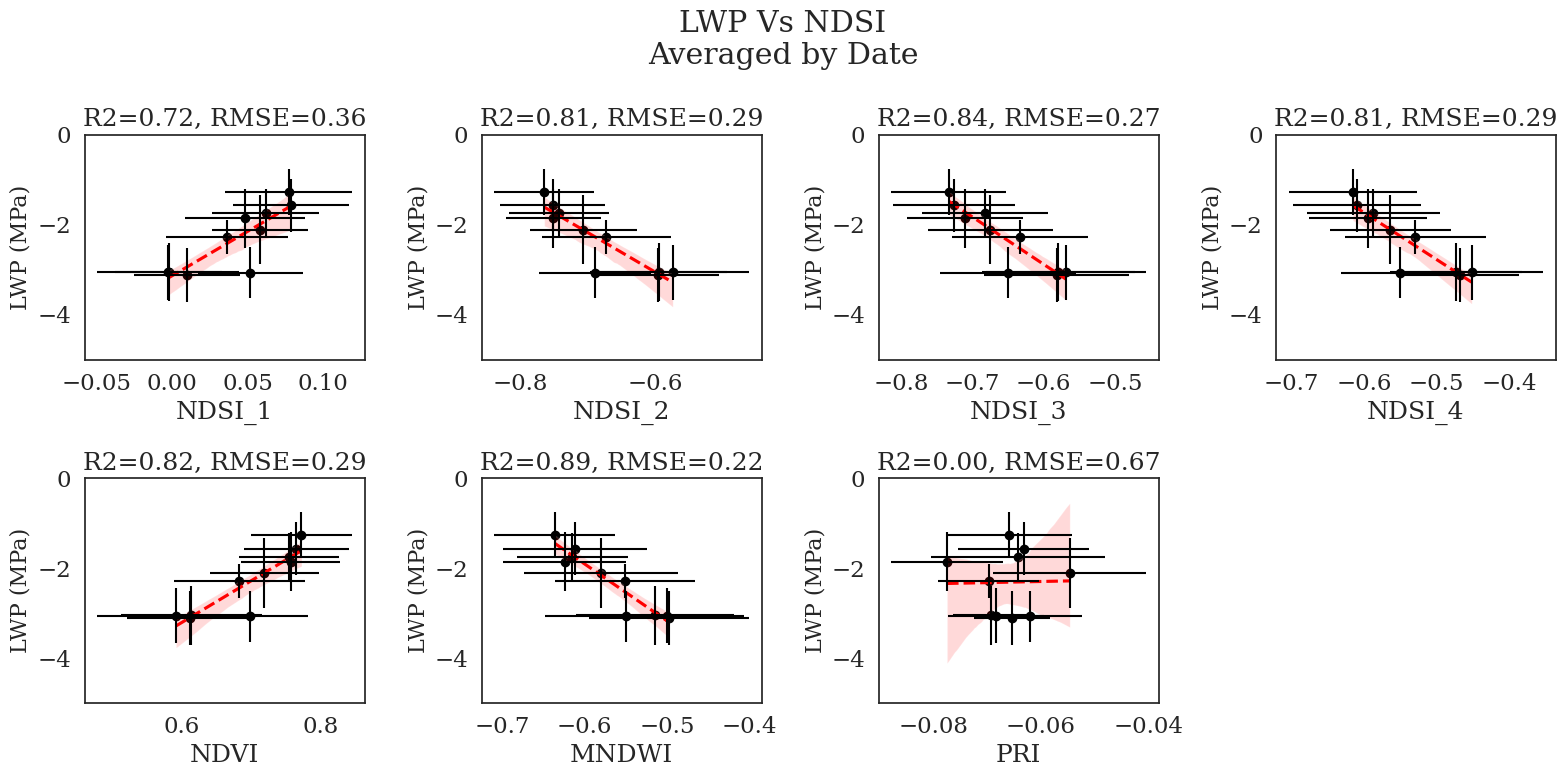

In [ ]:
title = 'Averaged by Date'

# Calculate the mean and standard deviation for all columns
stats_df = df_.groupby('spectral_date').mean().join(NDSI_df.groupby('spectral_date').std(), lsuffix='_mean', rsuffix='_std')

# Define the target column name
target_col = 'LWP'

# Define a list of columns to compare against the target
compare_cols = points_list

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle(f'LWP Vs NDSI\n{title}')
# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = stats_df[target_col+'_mean']
    x = stats_df[col+'_mean']

    # # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # Plot the scatterplot with the trend line
    for date, data in stats_df.iterrows():
        ax.scatter(data[col + '_mean'], data[target_col + '_mean'], color = 'black' )

    sns.regplot(x=x, y=y, ax=ax, color='red', scatter=False, line_kws={'linestyle':'--'})

    # Scatter plot with error bars for each species
    for date, data in stats_df.iterrows():
        x_mean, x_std = data[col + '_mean'], data[col + '_std']
        y_mean, y_std = data[target_col + '_mean'], data[target_col + '_std']
        ax.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, color= 'black' ,markersize = 10)

    # add 1:1 line
    # xmin, xmax = ax.get_xlim()  # Get the x-axis limits
    # ymin, ymax = ax.get_ylim()  # Get the y-axis limits
    # ax.plot([xmin, xmax], [ymin, ymax], color='black',)

    #to make the xlabel be in wavelengths:
    if type(col) == tuple:
      ax.set_xlabel(f'{band_dict[col[0]]}, {band_dict[col[1]]}')
    else:
      ax.set_xlabel(col)
    #to make xlabel be in the bands number:
    # ax.set_xlabel(col)         # cancel if needed to present wavelengths

    ax.set_ylabel('LWP (MPa)',fontsize=16)
    ax.set_ylim(-5,0)
    # ax.set_xlim(-1,0.5)
    ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')

    #get some stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(stats_df['LWP_mean'], stats_df[col+'_mean'])
    print (f'statistics of {col}: \np-value = {round(p_value,3)} \npearson = {round(r_value,3)}\nR^2 = {round(r_value ** 2,3)}\n')
# #Adjust the legend
# handles = [mlines.Line2D([], [], color=color_dict[species], marker='o', linestyle='None') for species in color_dict.keys()]
# fig.legend(handles = handles, loc='lower right', bbox_to_anchor=axes[-1, -1].get_position(), fontsize=20, labels = color_dict.keys())

# Adjust the layout and display the plot
axes[-1,-1].remove()

plt.tight_layout()
plt.show()

<ipython-input-15-3343f8702594>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['plot']).mean().join(NDSI_df.groupby(by = ['plot']).std(), lsuffix='_mean', rsuffix='_std')
<ipython-input-15-3343f8702594>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['plot']).mean().join(NDSI_df.groupby(by = ['plot']).std(), lsuffix='_mean', rsuffix='_std')


statistics of NDSI_1: 
p-value = 0.303 
pearson = 0.508
R^2 = 0.258

statistics of NDSI_2: 
p-value = 0.336 
pearson = -0.479
R^2 = 0.23

statistics of NDSI_3: 
p-value = 0.155 
pearson = -0.659
R^2 = 0.434

statistics of NDSI_4: 
p-value = 0.496 
pearson = -0.35
R^2 = 0.123

statistics of NDVI: 
p-value = 0.285 
pearson = 0.525
R^2 = 0.276

statistics of MNDWI: 
p-value = 0.157 
pearson = -0.656
R^2 = 0.43

statistics of PRI: 
p-value = 0.409 
pearson = 0.419
R^2 = 0.175



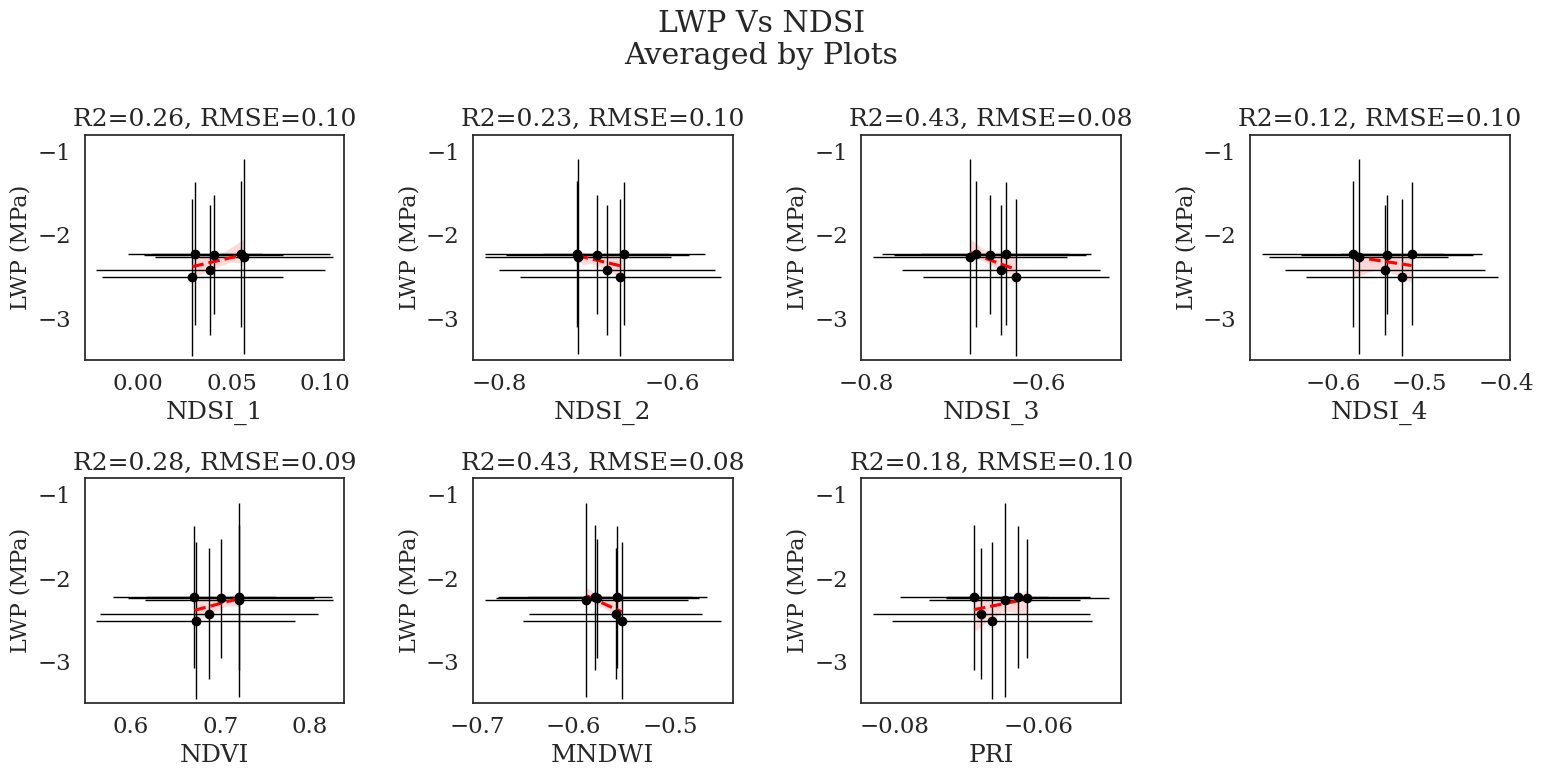

In [ ]:
title = 'Averaged by Plots'

# Calculate the mean and standard deviation for all columns
stats_df = df_.groupby(by = ['plot']).mean().join(NDSI_df.groupby(by = ['plot']).std(), lsuffix='_mean', rsuffix='_std')

# Define the target column name
target_col = 'LWP'

# Define a list of columns to compare against the target
compare_cols = points_list

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle(f'LWP Vs NDSI\n{title}')
# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = stats_df[target_col+'_mean']
    x = stats_df[col+'_mean']

    # # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # # Plot the scatterplot with the trend line
    # for (species, treatment), data in stats_df.iterrows():
    #     if treatment == 'drought':
    #         marker = 's'
    #         s = 100
    #         facecolor='none'
    #         linewidths=2.5
    #     else:
    #         marker = 'o'
    #         facecolor=color_dict[species]
    #         s = 60
    #         linewidths = 1
    #     ax.scatter(data[col + '_mean'], data[target_col + '_mean'], marker=marker, s=s, color=color_dict[species], facecolor=facecolor,linewidths=linewidths )

    #Scatter plot with error bars for each species
    for (plot), data in stats_df.iterrows():
        x_mean, x_std = data[col + '_mean'], data[col + '_std']
        y_mean, y_std = data[target_col + '_mean'], data[target_col + '_std']
        ax.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, marker='o', color='black', elinewidth= 1)

    sns.regplot(x=x, y=y, ax=ax, color='red', scatter=False, line_kws={'linestyle':'--'})

    # add 1:1 line
    # xmin, xmax = ax.get_xlim()  # Get the x-axis limits
    # ymin, ymax = ax.get_ylim()  # Get the y-axis limits
    # ax.plot([xmin, xmax], [ymin, ymax], color='black',)

    #to make the xlabel be in wavelengths:
    if type(col) == tuple:
      ax.set_xlabel(f'{band_dict[col[0]]}, {band_dict[col[1]]}')
    else:
      ax.set_xlabel(col)
    #to make xlabel be in the bands number:
    # ax.set_xlabel(col)         # cancel if needed to present wavelengths

    ax.set_ylabel('LWP (MPa)',fontsize=16)
    ax.set_ylim(-3.5,-0.8)
    # ax.set_xlim(-1,0.5)
    ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')

    #get some stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(stats_df['LWP_mean'], stats_df[col+'_mean'])
    print (f'statistics of {col}: \np-value = {round(p_value,3)} \npearson = {round(r_value,3)}\nR^2 = {round(r_value ** 2,3)}\n')
#Adjust the legend
# handles = [mlines.Line2D([], [], color=color_dict[species], marker='o', linestyle='None') for species in color_dict.keys()]
# for h in [mlines.Line2D([], [], color=color_dict[species], marker='s', linestyle='None',markerfacecolor='none', markeredgewidth = 2, markersize = 10) for species in color_dict.keys()]:
#   handles.append(h)
# fig.legend(handles = handles, loc='lower right', bbox_to_anchor= (0.97,-0.1), fontsize=20,
#            labels = ['carob control', 'cypress control', 'pine control', 'pistacia control', 'oak control', 'carob drought', 'cypress drought', 'pine drought', 'pistacia drought', 'oak drought'])

# Adjust the layout and display the plot
axes[-1,-1].remove()

plt.tight_layout()
plt.show()

<ipython-input-26-3ace0ae4a892>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['English_name','plot']).mean().join(NDSI_df.groupby(by = ['English_name','plot']).std(), lsuffix='_mean', rsuffix='_std')
<ipython-input-26-3ace0ae4a892>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['English_name','plot']).mean().join(NDSI_df.groupby(by = ['English_name','plot']).std(), lsuffix='_mean', rsuffix='_std')


statistics of NDSI_1: 
p-value = 0.0 
pearson = 0.662
R^2 = 0.438

statistics of NDSI_2: 
p-value = 0.001 
pearson = -0.61
R^2 = 0.372

statistics of NDSI_3: 
p-value = 0.001 
pearson = -0.58
R^2 = 0.337

statistics of NDSI_4: 
p-value = 0.001 
pearson = -0.587
R^2 = 0.344

statistics of NDVI: 
p-value = 0.001 
pearson = 0.613
R^2 = 0.376

statistics of MNDWI: 
p-value = 0.01 
pearson = -0.48
R^2 = 0.23

statistics of PRI: 
p-value = 0.291 
pearson = 0.207
R^2 = 0.043



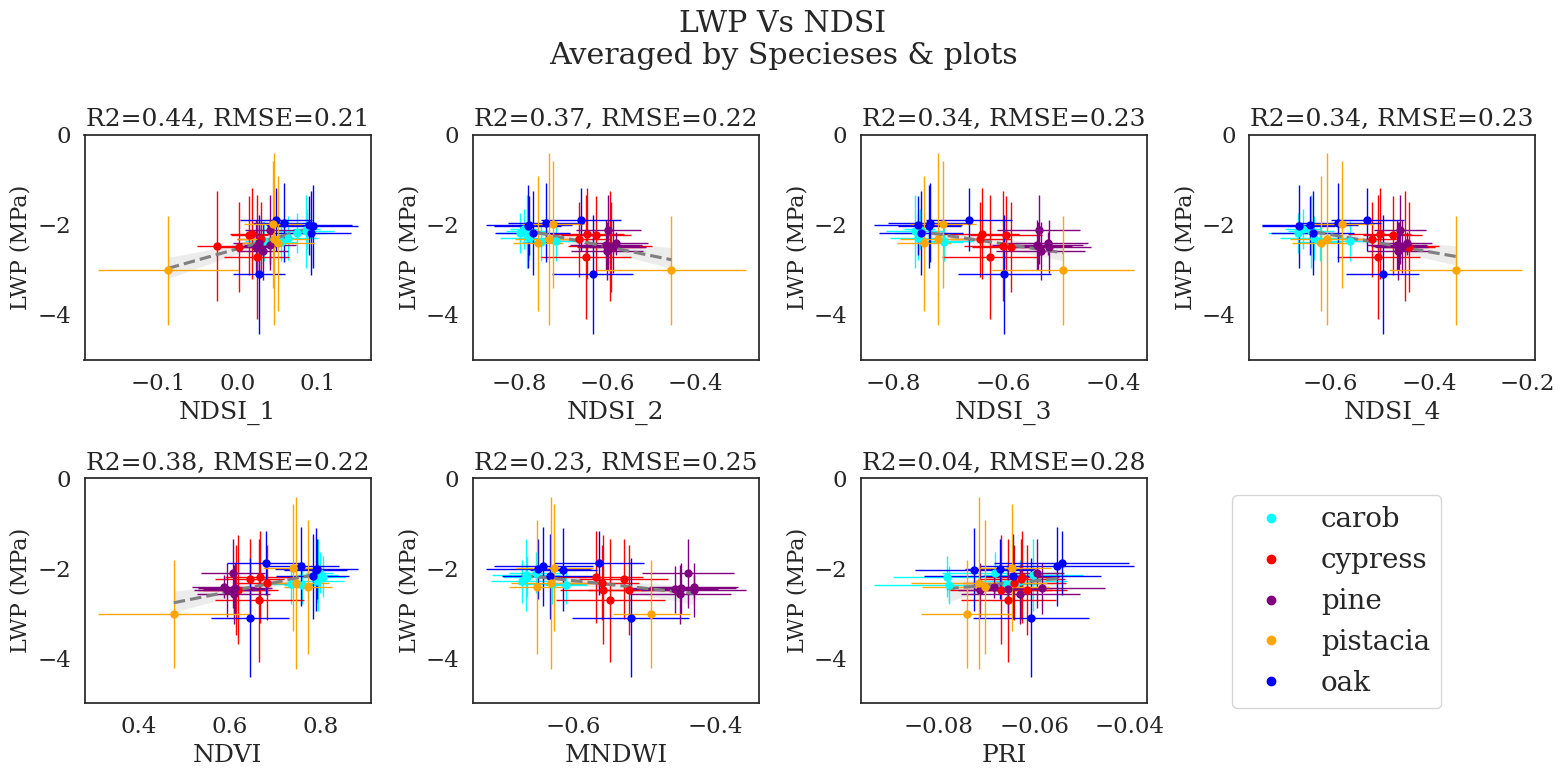

In [ ]:
title = 'Averaged by Specieses & plots'

# Calculate the mean and standard deviation for all columns
stats_df = df_.groupby(by = ['English_name','plot']).mean().join(NDSI_df.groupby(by = ['English_name','plot']).std(), lsuffix='_mean', rsuffix='_std')

# Define the target column name
target_col = 'LWP'

# Define a list of columns to compare against the target
compare_cols = points_list

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle(f'LWP Vs NDSI\n{title}')
# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = stats_df[target_col+'_mean']
    x = stats_df[col+'_mean']

    # # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # # Plot the scatterplot with the trend line
    # for (species, treatment), data in stats_df.iterrows():
    #     if treatment == 'drought':
    #         marker = 's'
    #         s = 100
    #         facecolor='none'
    #         linewidths=2.5
    #     else:
    #         marker = 'o'
    #         facecolor=color_dict[species]
    #         s = 60
    #         linewidths = 1
    #     ax.scatter(data[col + '_mean'], data[target_col + '_mean'], marker=marker, s=s, color=color_dict[species], facecolor=facecolor,linewidths=linewidths )

    # Scatter plot with error bars for each species
    for (species, plot), data in stats_df.iterrows():
        x_mean, x_std = data[col + '_mean'], data[col + '_std']
        y_mean, y_std = data[target_col + '_mean'], data[target_col + '_std']
        ax.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, marker='o',markersize=5, label=species, color=color_dict[species], elinewidth= 1)

    sns.regplot(x=x, y=y, ax=ax, color='grey', scatter=False, line_kws={'linestyle':'--'})

    # add 1:1 line
    # xmin, xmax = ax.get_xlim()  # Get the x-axis limits
    # ymin, ymax = ax.get_ylim()  # Get the y-axis limits
    # ax.plot([xmin, xmax], [ymin, ymax], color='black',)

    #to make the xlabel be in wavelengths:
    if type(col) == tuple:
      ax.set_xlabel(f'{band_dict[col[0]]}, {band_dict[col[1]]}')
    else:
      ax.set_xlabel(col)
    #to make xlabel be in the bands number:
    # ax.set_xlabel(col)         # cancel if needed to present wavelengths

    ax.set_ylabel('LWP (MPa)',fontsize=16)
    ax.set_ylim(-5,0)
    # ax.set_xlim(-1,0.5)
    ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')

    #get some stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(stats_df['LWP_mean'], stats_df[col+'_mean'])
    print (f'statistics of {col}: \np-value = {round(p_value,3)} \npearson = {round(r_value,3)}\nR^2 = {round(r_value ** 2,3)}\n')
#Adjust the legend
handles = [mlines.Line2D([], [], color=color_dict[species], marker='o', linestyle='None') for species in color_dict.keys()]
# for h in [mlines.Line2D([], [], color=color_dict[species], marker='s', linestyle='None',markerfacecolor='none', markeredgewidth = 2, markersize = 10) for species in color_dict.keys()]:
#   handles.append(h)
fig.legend(handles = handles, loc='lower right', bbox_to_anchor= (0.92,0.09), fontsize=20, labels = color_dict.keys())
          #  labels = ['carob control', 'cypress control', 'pine control', 'pistacia control', 'oak control', 'carob drought', 'cypress drought', 'pine drought', 'pistacia drought', 'oak drought'])

# Adjust the layout and display the plot
axes[-1,-1].remove()

plt.tight_layout()
plt.show()

<ipython-input-29-6e9585a7021b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['plot','spectral_date']).mean().join(NDSI_df.groupby(by = ['plot','spectral_date']).std(), lsuffix='_mean', rsuffix='_std')
<ipython-input-29-6e9585a7021b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_df = df_.groupby(by = ['plot','spectral_date']).mean().join(NDSI_df.groupby(by = ['plot','spectral_date']).std(), lsuffix='_mean', rsuffix='_std')


statistics of NDSI_1: 
p-value = 0.0 
pearson = 0.728
R^2 = 0.531

statistics of NDSI_2: 
p-value = 0.0 
pearson = -0.821
R^2 = 0.674

statistics of NDSI_3: 
p-value = 0.0 
pearson = -0.841
R^2 = 0.707

statistics of NDSI_4: 
p-value = 0.0 
pearson = -0.789
R^2 = 0.623

statistics of NDVI: 
p-value = 0.0 
pearson = 0.825
R^2 = 0.681

statistics of MNDWI: 
p-value = 0.0 
pearson = -0.878
R^2 = 0.77

statistics of PRI: 
p-value = 0.813 
pearson = 0.032
R^2 = 0.001



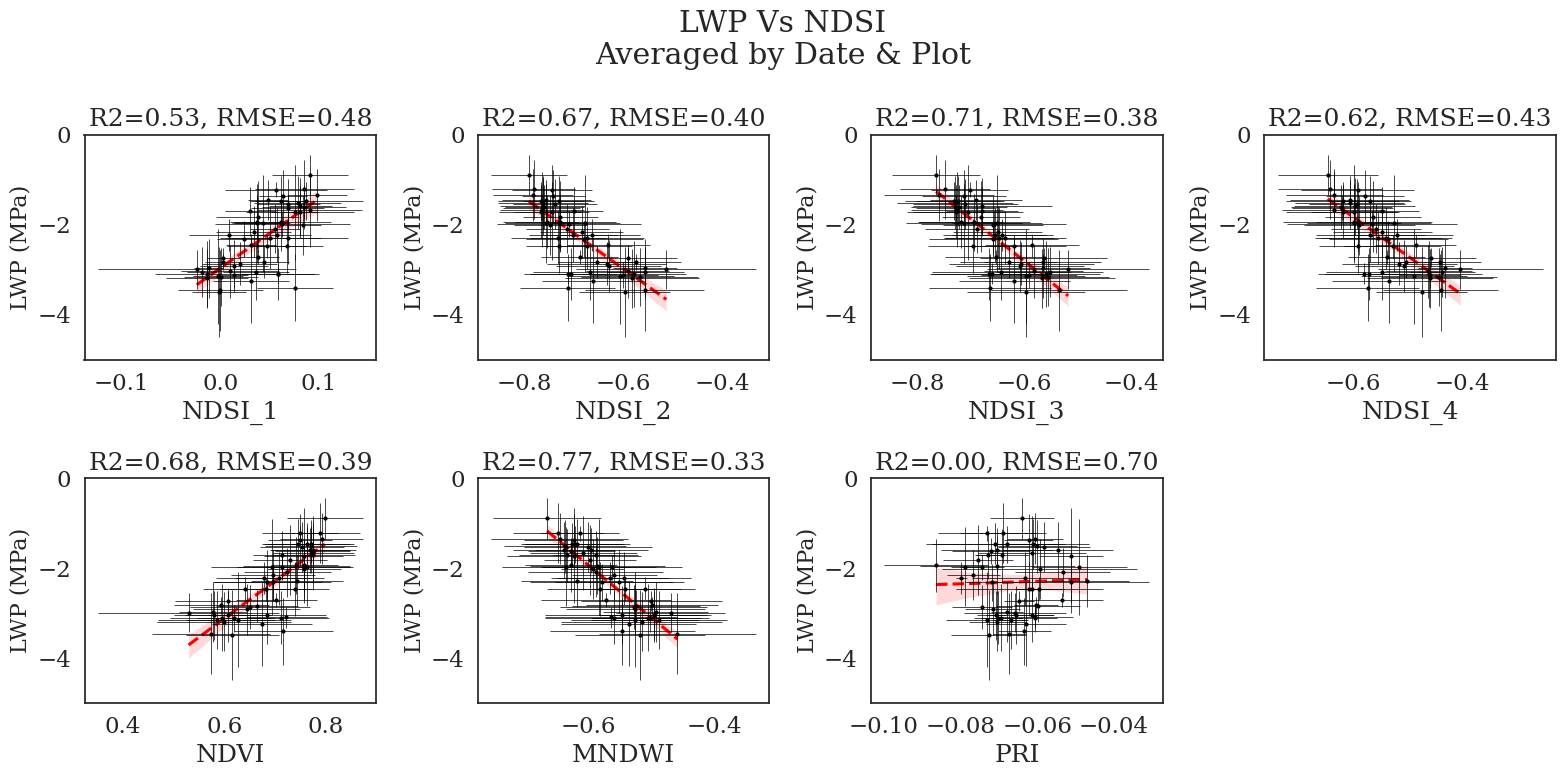

In [ ]:
title = 'Averaged by Date & Plot'

# Calculate the mean and standard deviation for all columns
stats_df = df_.groupby(by = ['plot','spectral_date']).mean().join(NDSI_df.groupby(by = ['plot','spectral_date']).std(), lsuffix='_mean', rsuffix='_std')

# Define the target column name
target_col = 'LWP'

# Define a list of columns to compare against the target
compare_cols = points_list

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle(f'LWP Vs NDSI\n{title}')
# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = stats_df[target_col+'_mean']
    x = stats_df[col+'_mean']

    # # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # # Plot the scatterplot with the trend line
    # for (species, treatment), data in stats_df.iterrows():
    #     if treatment == 'drought':
    #         marker = 'x'
    #     else:
    #         marker = 'o'
    #     ax.scatter(data[col + '_mean'], data[target_col + '_mean'], marker=marker)#, color=color_dict[species] )
    sns.regplot(x=x, y=y, ax=ax, color='red', scatter=False, line_kws={'linestyle':'--'})

    # Scatter plot with error bars for each species
    for (plot, date), data in stats_df.iterrows():
        x_mean, x_std = data[col + '_mean'], data[col + '_std']
        y_mean, y_std = data[target_col + '_mean'], data[target_col + '_std']
        # if treatment == 'drought':
        #     marker = 's'
        #     markerfacecolor='none'
        #     markersize = 10
        #     markeredgewidth = 2
        # else:
        #     marker = 'o'
        #     markerfacecolor = 'black'
        #     markersize = 5
        #     markeredgewidth = 2
        ax.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, marker='o', color='black', elinewidth= 0.5, markersize = 2)

    # add 1:1 line
    # xmin, xmax = ax.get_xlim()  # Get the x-axis limits
    # ymin, ymax = ax.get_ylim()  # Get the y-axis limits
    # ax.plot([xmin, xmax], [ymin, ymax], color='black',)

    #to make the xlabel be in wavelengths:
    if type(col) == tuple:
      ax.set_xlabel(f'{band_dict[col[0]]}, {band_dict[col[1]]}')
    else:
      ax.set_xlabel(col)
    #to make xlabel be in the bands number:
    # ax.set_xlabel(col)         # cancel if needed to present wavelengths

    ax.set_ylabel('LWP (MPa)',fontsize=16)
    ax.set_ylim(-5,0)
    # ax.set_xlim(-5,0)
    ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')

    #get some stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(stats_df['LWP_mean'], stats_df[col+'_mean'])
    print (f'statistics of {col}: \np-value = {round(p_value,3)} \npearson = {round(r_value,3)}\nR^2 = {round(r_value ** 2,3)}\n')
#Adjust the legend
# handles = [mlines.Line2D([], [], color='black', marker= 'o', linestyle='None',markerfacecolor='black', markeredgecolor='black', markeredgewidth=1.5),mlines.Line2D([], [], color='black', marker= 's', linestyle='None',markerfacecolor='none', markeredgecolor='black', markeredgewidth=2.5, markersize = 10)]
# fig.legend(handles = handles, loc='lower right', bbox_to_anchor=axes[-1, -1].get_position(), fontsize=20, labels = ['control','drought'])

# Adjust the layout and display the plot
axes[-1,-1].remove()

plt.tight_layout()
plt.show()

####plot LWP vs predicted LWP

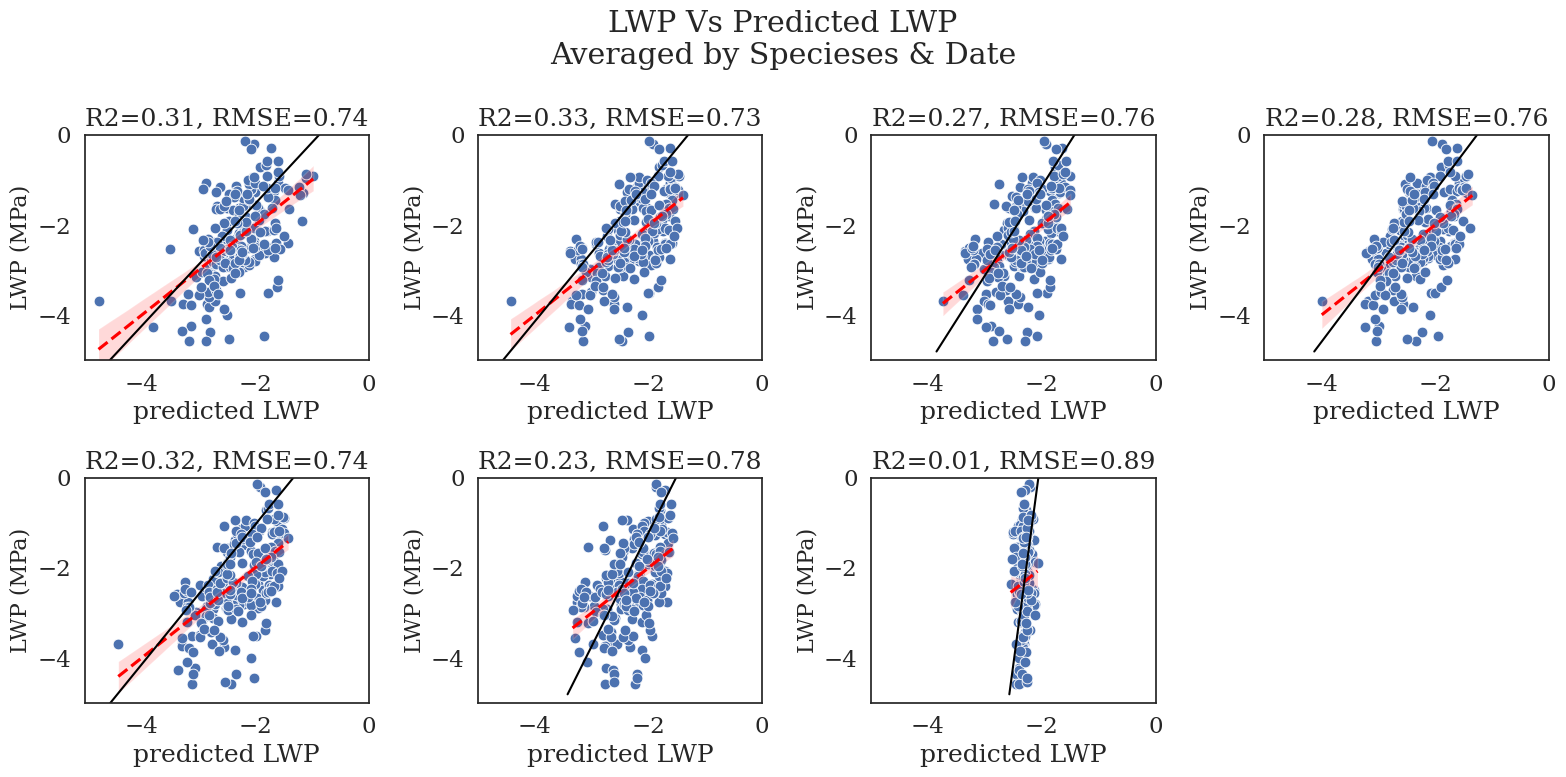

In [ ]:
# Define the target column name
target_col = 'LWP'

# Define a list of columns to compare against the target
compare_cols = points_list

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle(f'LWP Vs Predicted LWP\n{title}')

# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = df_[target_col]
    x = df_[col]


    # # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # Plot the scatterplot with the trend line
    sns.scatterplot(x=y_pred, y=y, ax=ax,s=60 )
    sns.regplot(x=y_pred, y=y, ax=ax, color='red', scatter=False, line_kws={'linestyle':'--'})

    # add 1:1 line
    xmin, xmax = ax.get_xlim()  # Get the x-axis limits
    ymin, ymax = ax.get_ylim()  # Get the y-axis limits
    ax.plot([xmin, xmax], [ymin, ymax], color='black',)

    #to make the xlabel be in wavelengths:
    if type(col) == tuple:
      ax.set_xlabel(f'{band_dict[col[0]]}, {band_dict[col[1]]}')
    else:
      ax.set_xlabel('predicted LWP')
    #to make xlabel be in the bands number:
    # ax.set_xlabel(col)         # cancel if needed to present wavelengths

    ax.set_ylabel('LWP (MPa)',fontsize=16)
    ax.set_ylim(-5,0)
    ax.set_xlim(-5,0)
    ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')


# Adjust the layout and display the plot
axes[-1,-1].remove()
plt.tight_layout()
plt.show()

In [ ]:
# Plot scatter with metrics for NDSI and LWP
# fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 12))
for NDSI in points_list:
  plot_scatter_with_metrics(df2, NDSI, 'LWP')
# fig.suptitle("Samples Reflectance", fontsize=26)

### sitting with yehuda 4.6 trying new code

statistics of NDSI_1: 
p-value = 3.175006521888852e-21 
pearson = 0.5544036535997817
R^2 = 0.30736341112478677
statistics of NDSI_2: 
p-value = 4.090143425263607e-23 
pearson = -0.5757027708779265
R^2 = 0.3314336803965224
statistics of NDSI_3: 
p-value = 3.966316558703425e-18 
pearson = -0.515846822753507
R^2 = 0.2660979445448881
statistics of NDSI_4: 
p-value = 2.86013989887932e-19 
pearson = -0.5306459841873252
R^2 = 0.281585160534135
statistics of NDVI: 
p-value = 2.6164567828079474e-22 
pearson = 0.5668072660993243
R^2 = 0.3212704769029902
statistics of MNDWI: 
p-value = 1.407494265232757e-15 
pearson = -0.47995129751340165
R^2 = 0.23035324798479778
statistics of PRI: 
p-value = 0.16777913410829443 
pearson = 0.08822350856475311
R^2 = 0.007783387463475066


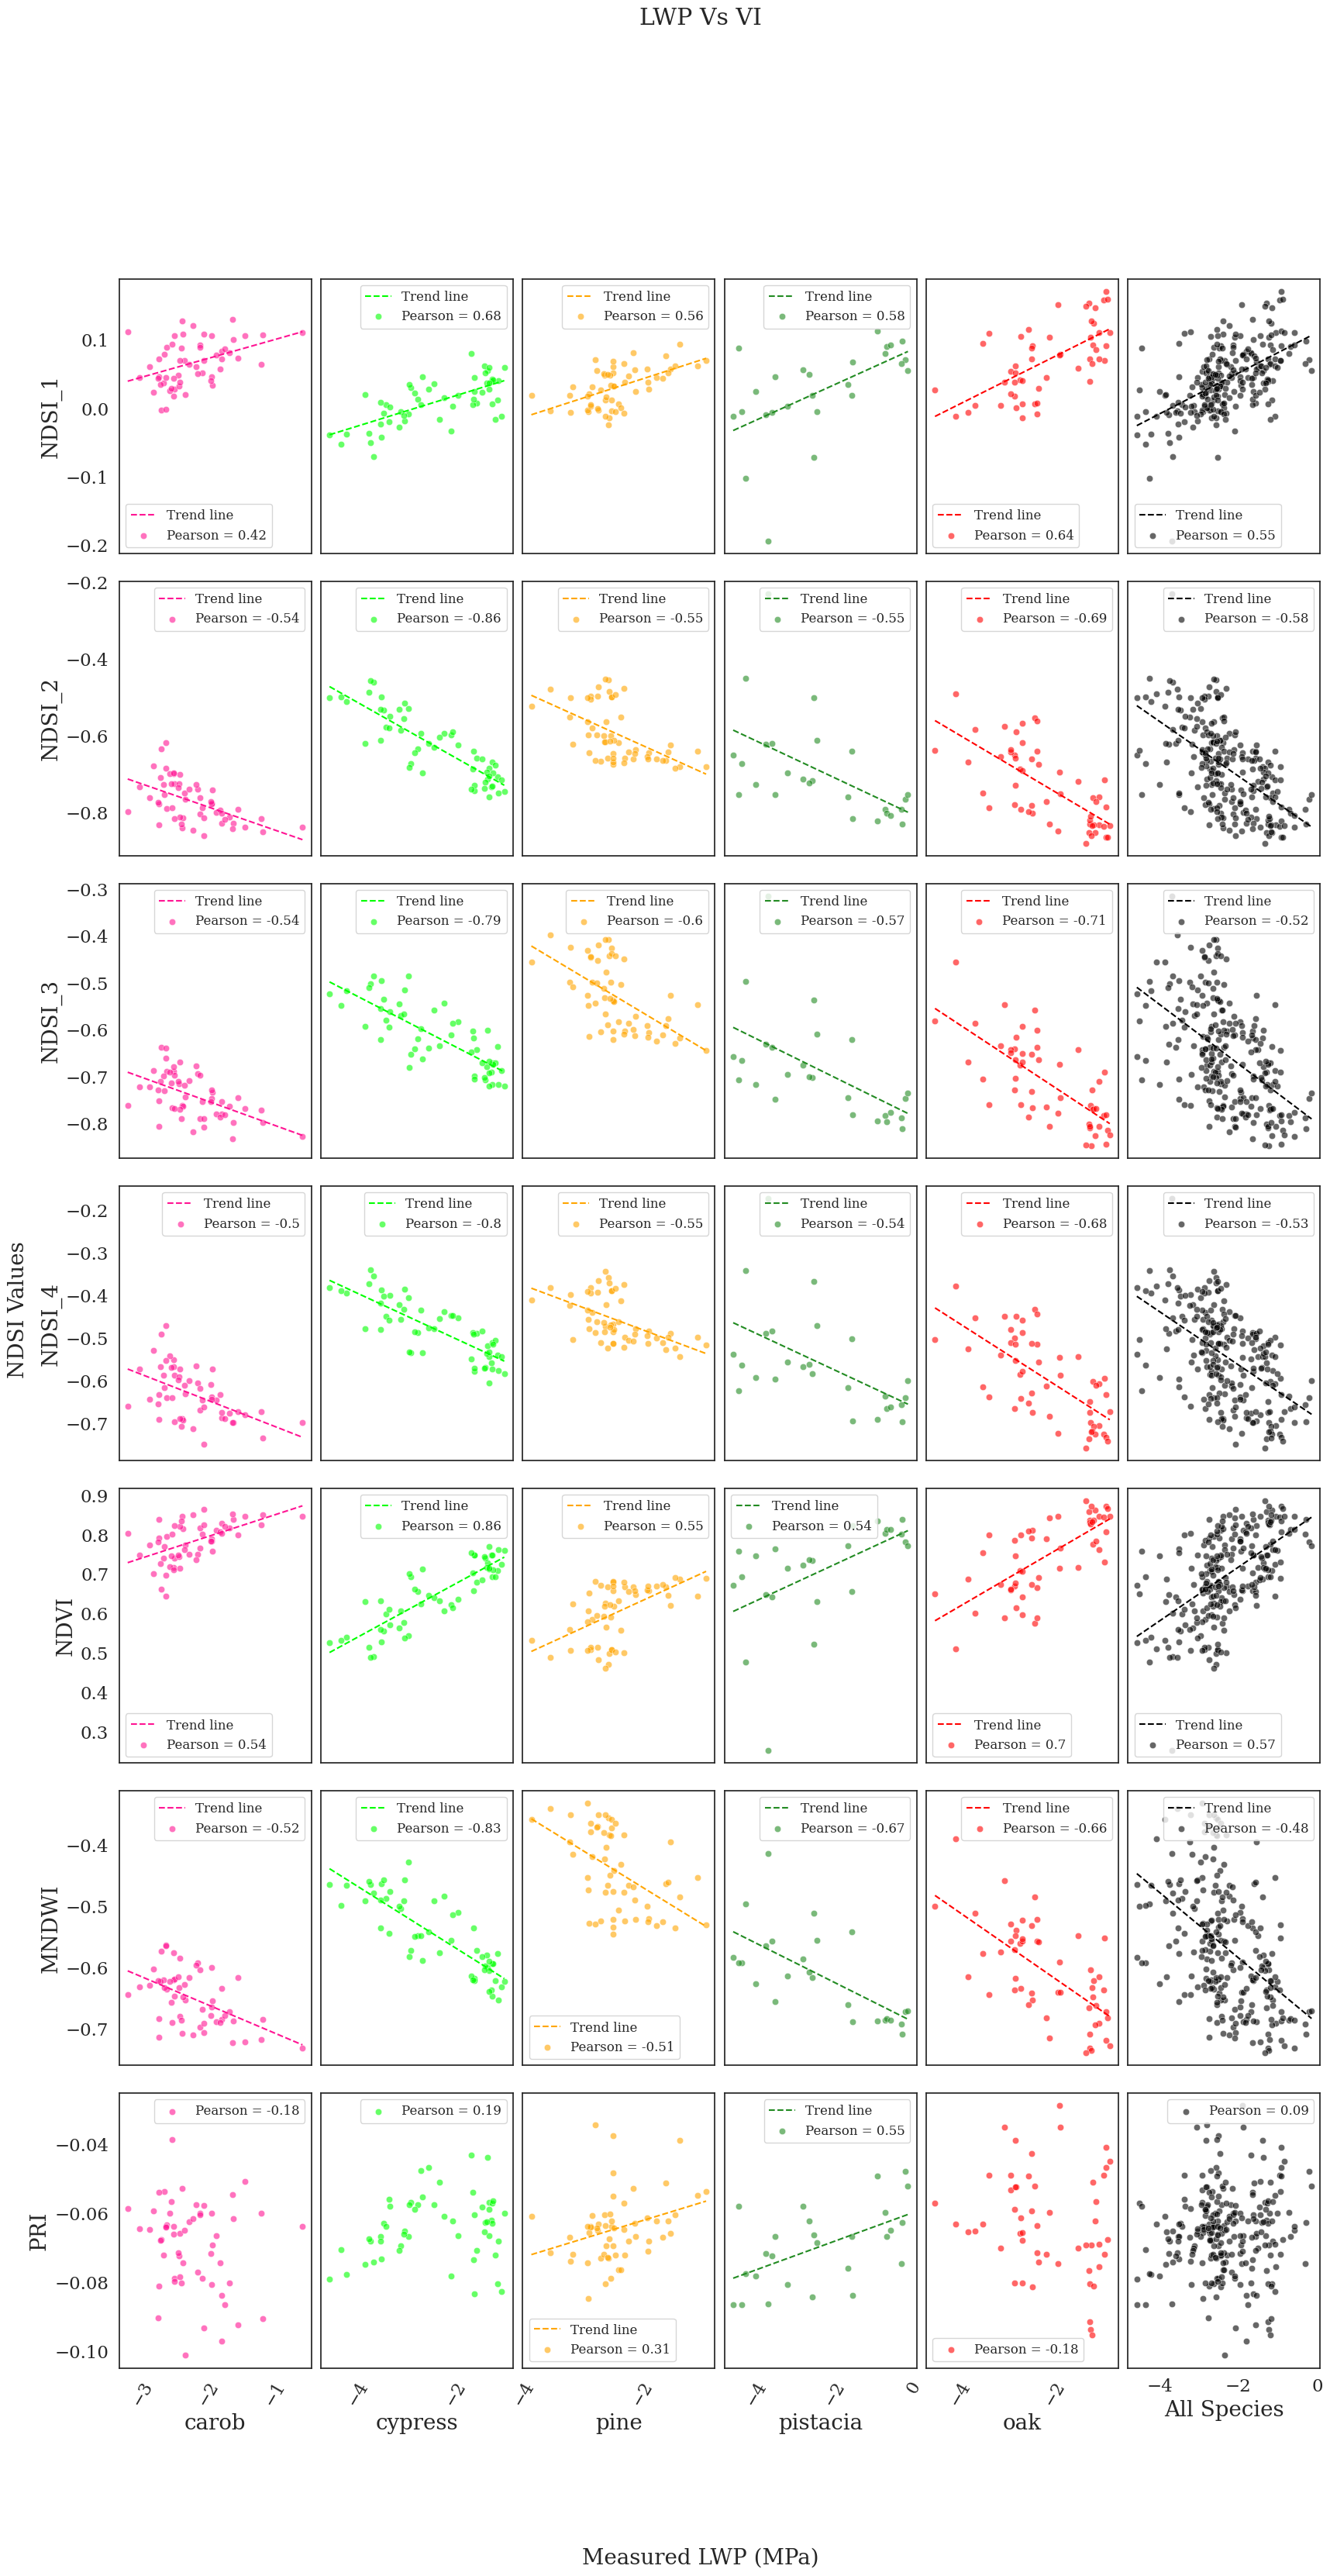

In [ ]:
dict_plot = {'carob':0, 'cypress':1, 'pine':2, 'pistacia':3, 'oak':4} # dictionary for axes
number_to_name = {'carob':1,
                  'cypress':2,
                  'pine':3,
                  'pistacia':4,
                  'oak':5} #dictionary for labels=
VI = points_list
fig, axes = plt.subplots(len(VI), 6, figsize=(20,5*len(VI)), sharex='col', sharey='row')
fig.suptitle('LWP Vs VI')
for i, index in enumerate(VI):
    for plant in df.English_name.unique():
      data_plot = df[df['English_name']== plant]
      slope, intercept, r_value, p_value, std_err = stats.linregress(data_plot['LWP'], data_plot[index])
      corr = round(r_value, 2)
      if abs(corr) >= 0.05 and p_value < 0.05: # Only plot trend line if correlation is significant
        trendline_func = np.poly1d([slope, intercept])
        trendline_x = np.linspace(data_plot['LWP'].min(), data_plot['LWP'].max(), 100)
        trendline_y = trendline_func(trendline_x)
        axes[i, dict_plot[plant]].plot(trendline_x, trendline_y, color=palette[number_to_name[plant]-1], linestyle='--', label='Trend line')
      sns.scatterplot(ax=axes[i, dict_plot[plant]],data=data_plot, x='LWP',y=index , color =palette[number_to_name[plant]-1],alpha =.6,label=f'Pearson = {corr}')
      axes[i, dict_plot[plant]].set_xlabel(plant,fontsize=20) # X label based on the dictionary
      axes[i, dict_plot[plant]].set_ylabel(index,fontsize=20) # X label based on the dictionary
      axes[i, dict_plot[plant]].xaxis.set_tick_params(labelsize=16, rotation=60)
      axes[i, dict_plot[plant]].legend(fontsize = 12)

    # Add all data together
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['LWP'], df[index])
    corr = round(r_value, 2)
    if abs(corr) >= 0.05 and p_value < 0.05: # Only plot trend line if correlation is significant
      trendline_func = np.poly1d([slope, intercept])
      trendline_x = np.linspace(df['LWP'].min(), df['LWP'].max(), 100)
      trendline_y = trendline_func(trendline_x)
      axes[i, 5].plot(trendline_x, trendline_y, color='black', linestyle='--', label='Trend line')
    all_data_plot = sns.scatterplot(ax=axes[i, 5],data=df, x='LWP',y=index , color ='black',alpha =.6,label=f'Pearson = {corr}')
    all_data_plot.set_xlabel('All Species',fontsize=20)
    all_data_plot.legend(fontsize = 12)

    #get some stats
    print (f'statistics of {index}: \np-value = {p_value} \npearson = {r_value}\nR^2 = {r_value ** 2}')

# Set general labels for x-axis and y-axis
fig.text(0.5, 0.04, 'Measured LWP (MPa)', ha='center', va='center', fontsize=20)
fig.text(0.06, 0.5, 'NDSI Values', ha='center', va='center', rotation='vertical', fontsize=20)
plt.subplots_adjust(hspace = .1,wspace=.05) #adjust the borders between the graph

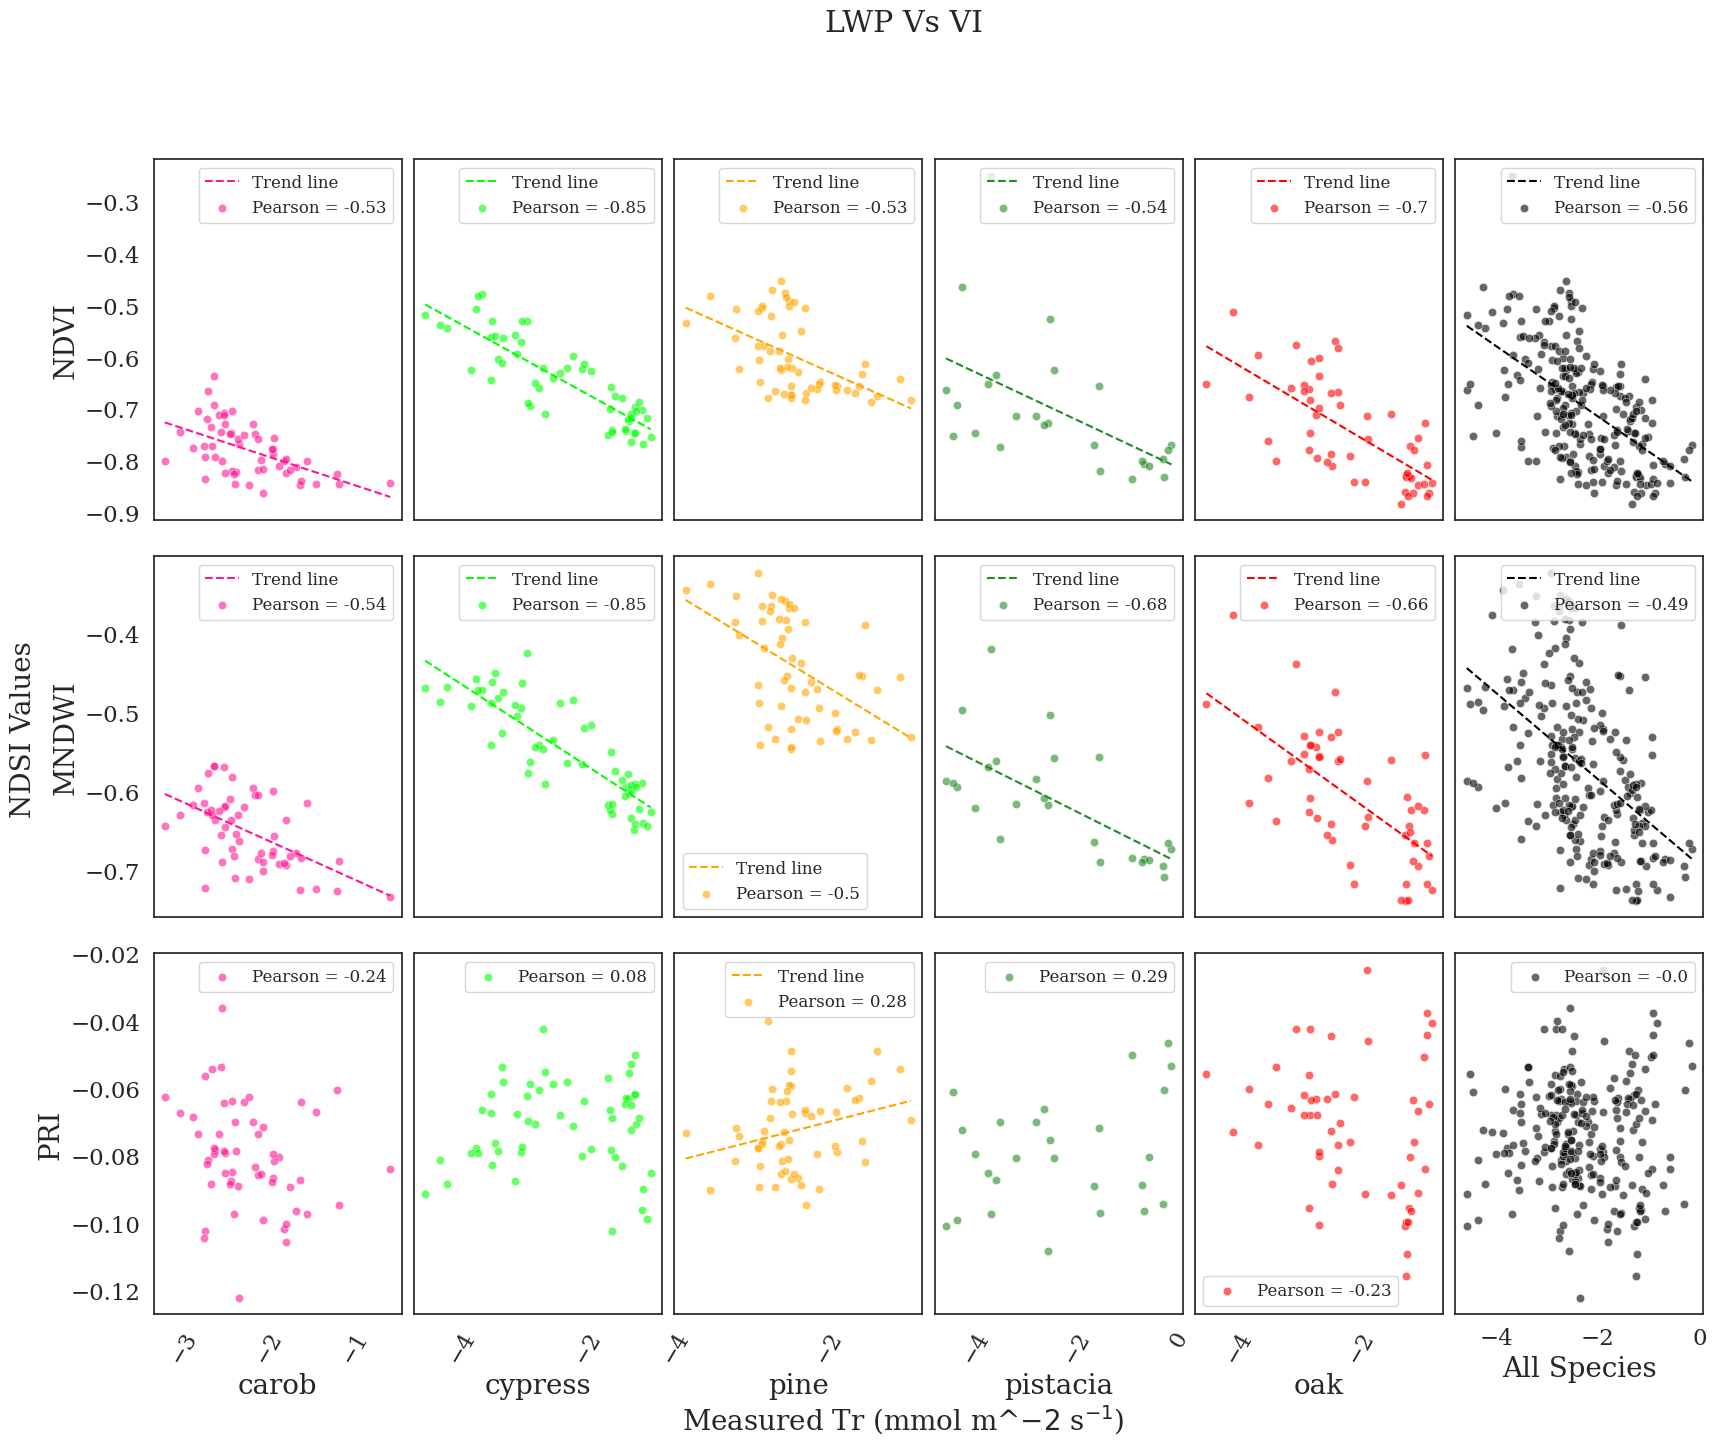

In [ ]:
dict_plot = {'carob':0, 'cypress':1, 'pine':2, 'pistacia':3, 'oak':4} # dictionary for axes
number_to_name = {'carob':1,
                  'cypress':2,
                  'pine':3,
                  'pistacia':4,
                  'oak':5} #dictionary for labels
# list of vi:
VI = points_list[-3:]
fig, axes = plt.subplots(len(VI), 6, figsize=(20,5*len(VI)), sharex='col', sharey='row')
fig.suptitle('LWP Vs VI')
for i, index in enumerate(VI):
    for plant in df.English_name.unique():
      data_plot = df[df['English_name']== plant]
      slope, intercept, r_value, p_value, std_err = stats.linregress(data_plot['LWP'], data_plot[index])
      corr = round(r_value, 2)
      if abs(corr) >= 0.05 and p_value < 0.05: # Only plot trend line if correlation is significant
        trendline_func = np.poly1d([slope, intercept])
        trendline_x = np.linspace(data_plot['LWP'].min(), data_plot['LWP'].max(), 100)
        trendline_y = trendline_func(trendline_x)
        axes[i, dict_plot[plant]].plot(trendline_x, trendline_y, color=palette[number_to_name[plant]-1], linestyle='--', label='Trend line')
      sns.scatterplot(ax=axes[i, dict_plot[plant]],data=data_plot, x='LWP',y=index , color =palette[number_to_name[plant]-1],alpha =.6,label=f'Pearson = {corr}')
      axes[i, dict_plot[plant]].set_xlabel(plant,fontsize=20) # X label based on the dictionary
      axes[i, dict_plot[plant]].set_ylabel(index,fontsize=20) # X label based on the dictionary
      axes[i, dict_plot[plant]].xaxis.set_tick_params(labelsize=16, rotation=60)
      axes[i, dict_plot[plant]].legend(fontsize = 12)

    # Add all data together
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['LWP'], df[index])
    corr = round(r_value, 2)
    if abs(corr) >= 0.05 and p_value < 0.05: # Only plot trend line if correlation is significant
      trendline_func = np.poly1d([slope, intercept])
      trendline_x = np.linspace(df['LWP'].min(), df['LWP'].max(), 100)
      trendline_y = trendline_func(trendline_x)
      axes[i, 5].plot(trendline_x, trendline_y, color='black', linestyle='--', label='Trend line')
    all_data_plot = sns.scatterplot(ax=axes[i, 5],data=df, x='LWP',y=index , color ='black',alpha =.6,label=f'Pearson = {corr}')
    all_data_plot.set_xlabel('All Species',fontsize=20)
    all_data_plot.legend(fontsize = 12)

# Set general labels for x-axis and y-axis
fig.text(0.5, 0.04, 'Measured Tr (mmol m^${-2}$ s$^{-1}$)', ha='center', va='center', fontsize=20)
fig.text(0.06, 0.5, 'NDSI Values', ha='center', va='center', rotation='vertical', fontsize=20)
plt.subplots_adjust(hspace = .1,wspace=.05) #adjust the borders between the graph

### checking predicted LWP

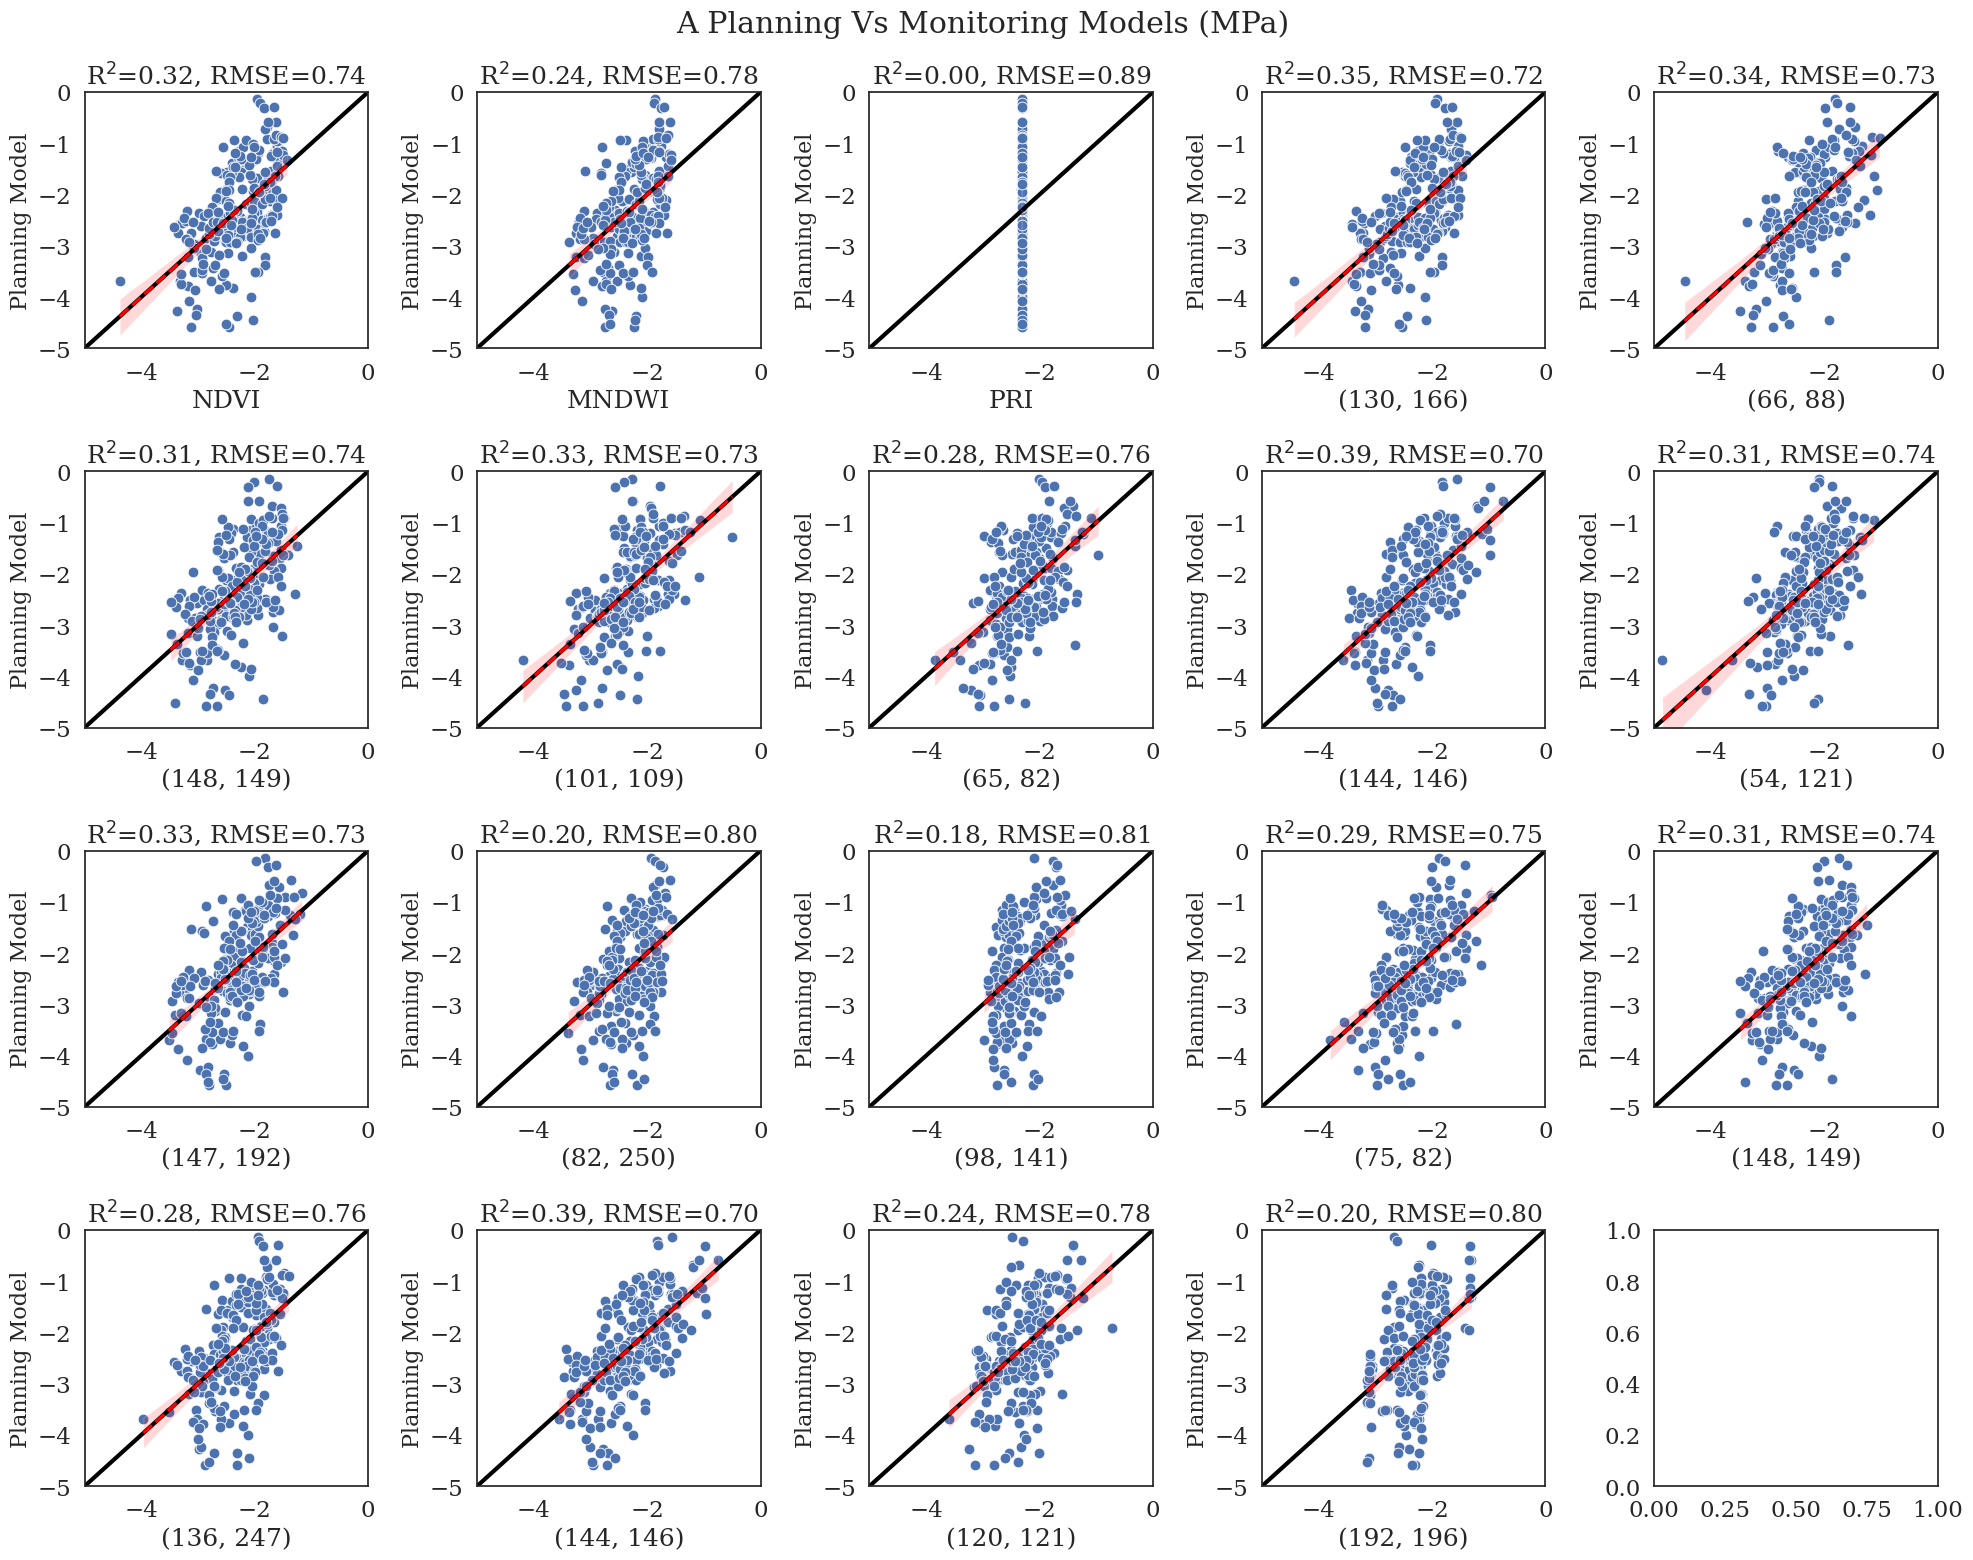

In [ ]:
df2 = df
# df2 = df

# Define the target column name
target_col = 'LWP'

# Define a list of columns to compare against the target
compare_cols = points_list[-3:] + points_list[:16]

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
fig.suptitle('A Planning Vs Monitoring Models (MPa)')

# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 5
    col_num = i % 5
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = df2[target_col]
    x = df2[col]


    # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # add 1:1 line
    ax.plot([-5, 0], [-5,0],lw=3,color='black')

    # Plot the scatterplot with the trend line
    sns.scatterplot(x= y_pred, y=y, ax=ax,s=60)
    sns.regplot(x=y_pred, y=y, ax=ax, color='red', scatter=False, line_kws={'linestyle':'--'})
    ax.set_xlabel(col)
    ax.set_ylabel('measured LWP')
    ax.set_ylim(-5,0)
    ax.set_xlim(-5,0)
    ax.set_title(f'R$^2$={r2:.2f}, RMSE={rmse:.2f}')
    ax.set_ylabel('Planning Model',fontsize=16)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
df_out = df[df.columns[-27:]]
df_out['LWP'] = df['LWP']
df_out['English_name'] = df[['English_name']]
df_out.to_csv('NDSI_LWP_df.csv')

<ipython-input-67-ab7e329a26a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['LWP'] = df['LWP']
<ipython-input-67-ab7e329a26a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['English_name'] = df[['English_name']]


###trying to make subplots

In [ ]:
######################################### TRYING TO MAKE DIFFERENT FUNCTION FOR SUBPLOTS#######################################

# Scatter plot with R-squared and RMSE
def plot_scatter_with_metrics_in_subplots(df, x_col, y_col):
    ax.scatter(df[x_col], df[y_col])
    ax.xlabel(x_col)
    ax.ylabel(y_col)

    # Linear regression fit
    fit = np.polyfit(df[x_col], df[y_col], 1)
    fit_fn = np.poly1d(fit)
    ax.plot(df[x_col], fit_fn(df[x_col]), 'r-', linewidth=2)

    # R-squared value
    r2 = r2_score(df[y_col], fit_fn(df[x_col]))
    ax.text(1.05, 0.9, f'R-squared: {r2:.2f}', transform=plt.gca().transAxes)

    # RMSE value
    rmse = np.sqrt(mean_squared_error(df[y_col], fit_fn(df[x_col])))
    ax.text(1.05, 0.8, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes)

AttributeError: ignored

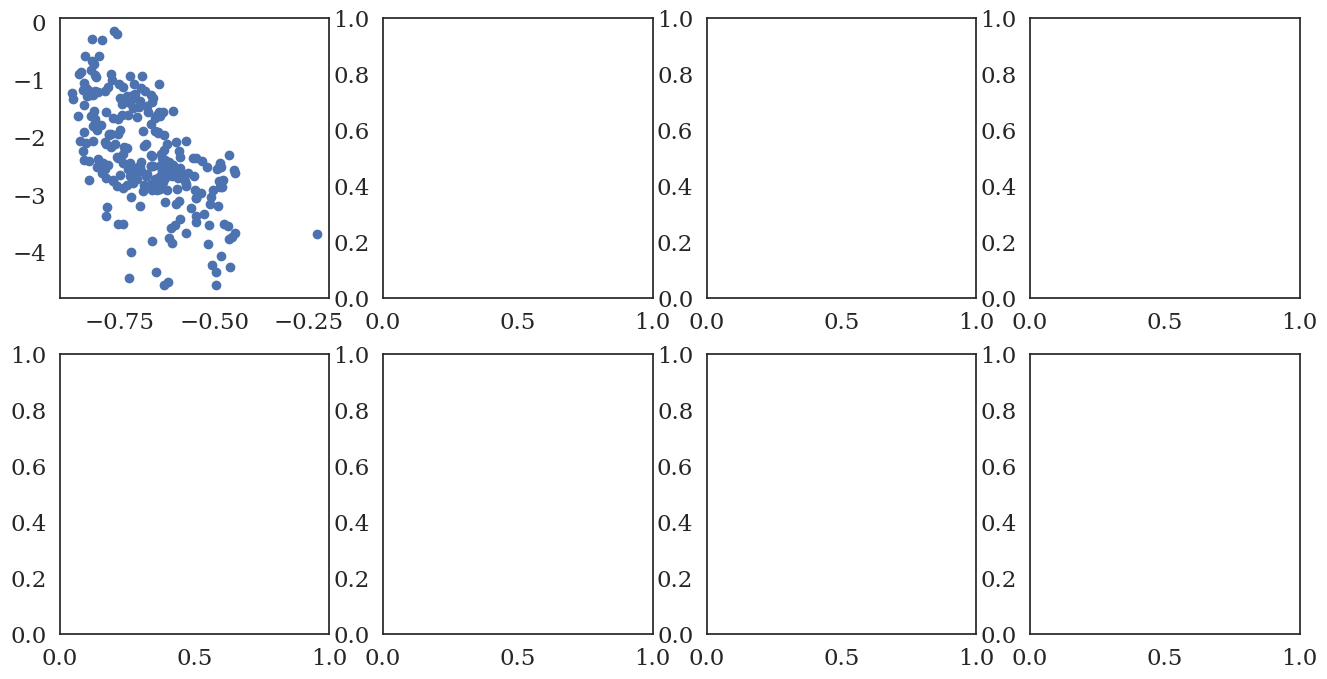

In [ ]:
#############################trying to plot subplots#############################

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, NDSI in enumerate(points_list[:8]):
  row = i // 4
  col_num = i % 4
  ax = axes[row, col_num]
  plot_scatter_with_metrics_in_subplots(df2, NDSI, 'LWP')
plt.tight_layout()
plt.show()

# present spectral signatures

In [ ]:
spectral_df = df
spectral_df = spectral_df.drop(axis = 1, labels = ['plot', 'LWP'])
spectral_df

1         2         3         4         5         6         7  \
0    0.056127  0.050410  0.045164  0.040390  0.036088  0.032257  0.028898   
15   0.059977  0.053579  0.047686  0.042298  0.037416  0.033039  0.029167   
14   0.065111  0.058156  0.051725  0.045821  0.040442  0.035588  0.031260   
12   0.072386  0.067089  0.062196  0.057705  0.053616  0.049930  0.046647   
11   0.049685  0.044987  0.040648  0.036666  0.033041  0.029774  0.026864   
..        ...       ...       ...       ...       ...       ...       ...   
220  0.061252  0.054616  0.048544  0.043038  0.038095  0.033718  0.029905   
219  0.033540  0.030082  0.026936  0.024103  0.021584  0.019378  0.017485   
244  0.049915  0.044643  0.039817  0.035437  0.031504  0.028017  0.024976   
231  0.063757  0.058792  0.054281  0.050224  0.046621  0.043471  0.040775   
245  0.028698  0.025888  0.023326  0.021012  0.018945  0.017126  0.015554   

            8         9        10  ...       268       269       270  \
0    0.026011  0.023595  0.021651  ...  0.219013  0.220716  0.222754   
15   0.025800  0.022939  0.020583  ...  0.223066  0.224795  0.226843   
14   0.027458  0.024182  0.021431  ...  0.135354  0.136527  0.137894   
12   0.043766  0.041287  0.039212  ...  0.267665  0.269552  0.271827   
11   0.024312  0.022117  0.020280  ...  0.233724  0.235465  0.237569   
..        ...       ...       ...  ...       ...       ...       ...   
220  0.026657  0.023973  0.021855  ...  0.340165  0.340492  0.340681   
219  0.015905  0.014638  0.013684  ...  0.188133  0.188204  0.188189   
244  0.022381  0.020232  0.018530  ...  0.240302  0.240647  0.240941   
231  0.038533  0.036745  0.035411  ...  0.308368  0.307987  0.307431   
245  0.014230  0.013154  0.012326  ...  0.169447  0.168854  0.168240   

          271       272       273       274  spectral_date  treatment  \
0    0.225129  0.227839  0.230886  0.234268     2022-03-14    drought   
15   0.229209  0.231894  0.234896  0.238218     2022-03-14    drought   
14   0.139457  0.141216  0.143169  0.145318     2022-03-14    drought   
12   0.274488  0.277538  0.280974  0.284798     2022-03-14    drought   
11   0.240038  0.242870  0.246067  0.249627     2022-03-14    drought   
..        ...       ...       ...       ...            ...        ...   
220  0.340734  0.340649  0.340427  0.340068     2023-02-13    control   
219  0.188086  0.187896  0.187620  0.187256     2023-02-13    control   
244  0.241184  0.241376  0.241517  0.241606     2023-02-13    control   
231  0.306699  0.305793  0.304711  0.303453     2023-02-13    control   
245  0.167605  0.166947  0.166267  0.165566     2023-02-13    drought   

     English_name  
0         cypress  
15        cypress  
14            oak  
12           pine  
11          carob  
..            ...  
220      pistacia  
219       cypress  
244         carob  
231          pine  
245         carob  

[245 rows x 277 columns]

## general mean

plotting one tree for the paper

In [ ]:
df_tree = df[(df['spectral_date'] == '2023-02-13') & (df['plot'] == 3) & (df['English_name'] == 'pine')]
df_tree

1         2         3         4        5         6         7  \
234  0.075271  0.069269  0.063778  0.058798  0.05433  0.050373  0.046928   

            8         9        10  ...       270       271       272  \
234  0.043995  0.041573  0.039662  ...  0.267828  0.268384  0.268852   

          273       274    LWP  spectral_date  treatment  plot  English_name  
234  0.269234  0.269529 -1.923     2023-02-13    control     3          pine  

[1 rows x 279 columns]

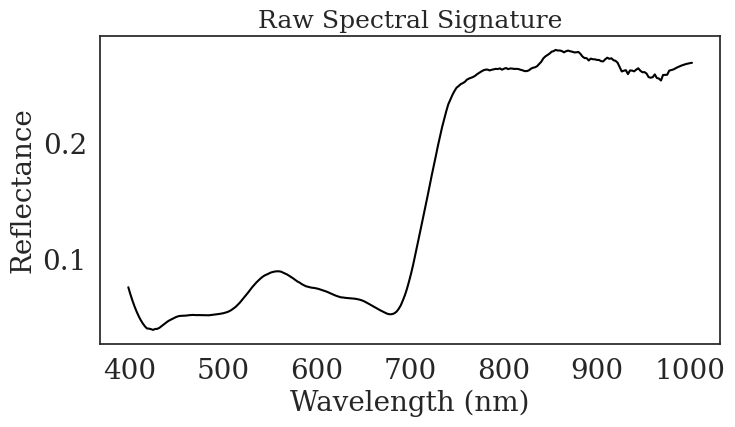

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,4))
# ax.set_title('Mean of all samples', fontsize = 20)
ax.set_xlabel('Wavelength (nm)', fontsize = 20)
ax.set_ylabel('Reflectance', fontsize = 20)
ax.set_title('Raw Spectral Signature')
plt.tick_params( labelsize=20)
plt.plot([band_dict[int(band)] for band in df_tree.columns[:274]], df_tree.iloc[0][:274], color = 'black')

In [ ]:
#make dataframe of the mean of all the data

# numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_df = df[df.columns[:274]]
means = numeric_df.mean().to_dict()
mean_df = pd.DataFrame(means, index=[0])

mean_df

1         2         3         4         5         6         7    \
0  0.051186  0.046653  0.042499  0.038723  0.035326  0.032308  0.029668   

        8         9         10   ...       265       266      267       268  \
0  0.027406  0.025523  0.024018  ...  0.221868  0.221986  0.22228  0.222752   

        269       270       271       272       273       274  
0  0.223399  0.224224  0.225224  0.226402  0.227756  0.229287  

[1 rows x 274 columns]

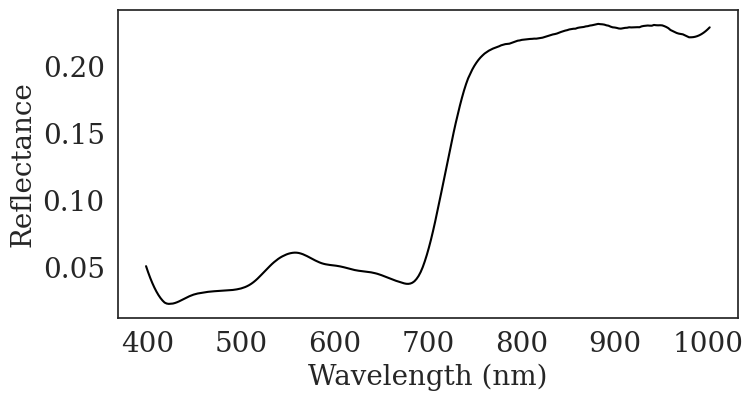

In [ ]:
#plot the mean spectral signature

fig, ax = plt.subplots(1, figsize=(8,4))
# ax.set_title('Mean of all samples', fontsize = 20)
ax.set_xlabel('Wavelength (nm)', fontsize = 20)
ax.set_ylabel('Reflectance', fontsize = 20)
plt.tick_params( labelsize=20)

#add bands lines
handles, labels = ax.get_legend_handles_labels()

# #NDVI
# ax.axvline(x=670, linestyle='--', color='green', alpha=0.5, lw = 3)
# ax.axvline(x=803, linestyle='--', color='green', alpha=0.5, lw = 3)
# dummy_line_NDVI = mlines.Line2D([], [], linestyle='--', color='green', alpha=0.5, label='NDVI', lw = 3)
# handles.append(dummy_line_NDVI)

# #MNDWI
# ax.axvline(x=550, linestyle='--', color='blue', alpha=0.5, lw = 3)
# ax.axvline(x=790, linestyle='--', color='blue', alpha=0.5, lw = 3)
# dummy_line_MNDWI = mlines.Line2D([], [], linestyle='--', color='blue', alpha=0.5, label='MNDWI', lw = 3)
# handles.append(dummy_line_MNDWI)

# #PRI
# ax.axvline(x=530, linestyle='--', color='purple', alpha=0.5, lw = 3)
# ax.axvline(x=570, linestyle='--', color='purple', alpha=0.5, lw = 3)
# dummy_line_PRI = mlines.Line2D([], [], linestyle='--', color='purple', alpha=0.5, label='PRI', lw = 3)
# handles.append(dummy_line_PRI)

# #GNDVI
# ax.axvline(x=552, linestyle='--', color='orange', alpha=0.5, lw = 3)
# ax.axvline(x=800, linestyle='--', color='orange', alpha=0.5, lw = 3)
# dummy_line_GNDVI = mlines.Line2D([], [], linestyle='--', color='orange', alpha=0.5, label='GNDVI', lw = 3)
# handles.append(dummy_line_GNDVI)

# #NDWSI
# ax.axvline(x=849, linestyle='--', color='cyan', alpha=0.5, lw = 3)
# ax.axvline(x=990, linestyle='--', color='cyan', alpha=0.5, lw = 3)
# dummy_line_NDWSI = mlines.Line2D([], [], linestyle='--', color='cyan', alpha=0.5, label='NDWSI', lw = 3)
# handles.append(dummy_line_NDWSI)

# #New NDSI
# ax.axvline(x=712, linestyle='--', color='red', alpha=0.5, lw = 3)
# ax.axvline(x=816, linestyle='--', color='red', alpha=0.5, lw = 3)
# dummy_line_New_NDSI = mlines.Line2D([], [], linestyle='--', color='red', alpha=0.5, label='New NDSI', lw = 3)
# handles.append(dummy_line_New_NDSI)

# #New NDSI for all samples
# ax.axvline(x=752, linestyle='--', color='red', alpha=0.5, lw = 3)
# ax.axvline(x=681, linestyle='--', color='red', alpha=0.5, lw = 3)
# dummy_line_New_NDSI = mlines.Line2D([], [], linestyle='--', color='red', alpha=0.5, label='New NDSI', lw = 3)
# handles.append(dummy_line_New_NDSI)

# ax.legend(handles=handles, loc='best', fontsize = 20)

plt.plot([band_dict[int(band)] for band in mean_df.columns[:274]], mean_df.iloc[0][:274], color = 'black')

## by specieses

### with marked bands

In [ ]:
grouped_df = spectral_df.groupby('English_name').mean()
grouped_df

<ipython-input-10-99b38abae50b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = spectral_df.groupby('English_name').mean()


1         2         3         4         5         6    \
English_name                                                               
carob         0.048419  0.044085  0.040106  0.036480  0.033208  0.030291   
cypress       0.047610  0.043489  0.039718  0.036298  0.033228  0.030508   
oak           0.045813  0.040848  0.036295  0.032155  0.028427  0.025111   
pine          0.062525  0.057918  0.053697  0.049861  0.046411  0.043347   
pistacia      0.052401  0.047608  0.043221  0.039240  0.035665  0.032495   

                   7         8         9         10   ...       265       266  \
English_name                                          ...                       
carob         0.027726  0.025516  0.023660  0.022157  ...  0.256541  0.256645   
cypress       0.028139  0.026120  0.024451  0.023133  ...  0.203716  0.203851   
oak           0.022207  0.019716  0.017637  0.015970  ...  0.189288  0.189340   
pine          0.040668  0.038375  0.036467  0.034945  ...  0.219634  0.219863   
pistacia      0.029731  0.027373  0.025420  0.023873  ...  0.256824  0.256843   

                   267       268       269       270       271       272  \
English_name                                                               
carob         0.256980  0.257544  0.258339  0.259363  0.260617  0.262102   
cypress       0.204162  0.204648  0.205309  0.206145  0.207157  0.208344   
oak           0.189529  0.189856  0.190321  0.190923  0.191662  0.192539   
pine          0.220267  0.220846  0.221602  0.222532  0.223638  0.224920   
pistacia      0.257010  0.257327  0.257792  0.258405  0.259168  0.260080   

                   273       274  
English_name                      
carob         0.263816  0.265760  
cypress       0.209707  0.211245  
oak           0.193553  0.194705  
pine          0.226377  0.228010  
pistacia      0.261140  0.262349  

[5 rows x 274 columns]

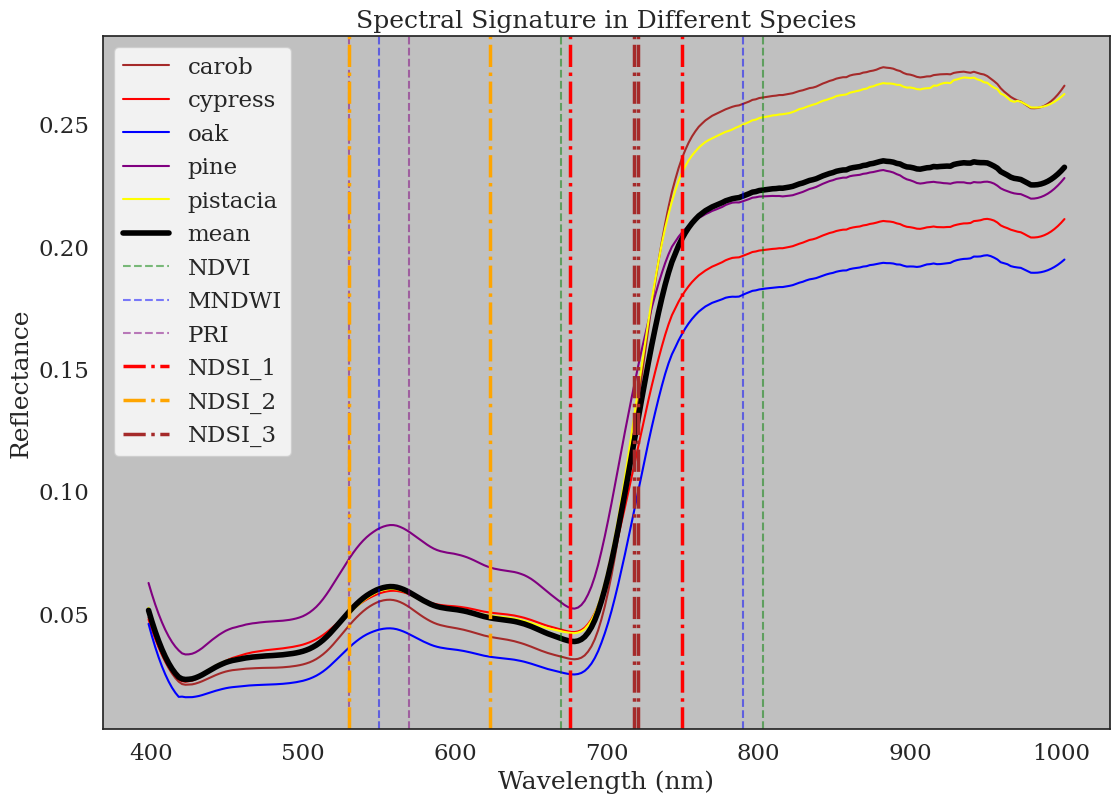

In [ ]:
#colour dictionary
color_dict = {'carob':'brown', 'cypress':'red', 'pine':'purple', 'pistacia':'yellow', 'oak':'blue'}

#set the figure
fig, ax = plt.subplots(1, figsize=(13,9))

#plot the species
wavelengths = [band_dict[int(x)] for x in grouped_df.columns]
for i, row in grouped_df.iterrows():
    ax.plot(wavelengths, row.values, color=color_dict[i], label=i)
#plot the mean
ax.plot(wavelengths,grouped_df.mean(), color='black', label='mean', lw = 4)

# add vertical lines for the indices

#NDVI
ax.axvline(x=670, linestyle='--', color='green', alpha=0.5)
ax.axvline(x=803, linestyle='--', color='green', alpha=0.5)
dummy_line_NDVI = mlines.Line2D([], [], linestyle='--', color='green', alpha=0.5, label='NDVI')
handles, labels = ax.get_legend_handles_labels()
handles.append(dummy_line_NDVI)

#MNDWI
ax.axvline(x=550, linestyle='--', color='blue', alpha=0.5)
ax.axvline(x=790, linestyle='--', color='blue', alpha=0.5)
dummy_line_MNDWI = mlines.Line2D([], [], linestyle='--', color='blue', alpha=0.5, label='MNDWI')
handles.append(dummy_line_MNDWI)

#PRI
ax.axvline(x=530, linestyle='--', color='purple', alpha=0.5)
ax.axvline(x=570, linestyle='--', color='purple', alpha=0.5)
dummy_line_PRI = mlines.Line2D([], [], linestyle='--', color='purple', alpha=0.5, label='PRI')
handles.append(dummy_line_PRI)

#NDSI_1
ax.axvline(x=676, linestyle='-.', color='red', alpha=1, lw=2.5)
ax.axvline(x=750, linestyle='-.', color='red', alpha=1, lw=2.5)
dummy_line_NDSI_1 = mlines.Line2D([], [], linestyle='-.', color='red', alpha=1, label='NDSI_1', lw=2.5)
handles.append(dummy_line_NDSI_1)

#NDSI_2
ax.axvline(x=530, linestyle='-.', color='orange', alpha=1, lw=2.5)
ax.axvline(x=623, linestyle='-.', color='orange', alpha=1, lw=2.5)
dummy_line_NDSI_2 = mlines.Line2D([], [], linestyle='-.', color='orange', alpha=1, label='NDSI_2', lw=2.5)
handles.append(dummy_line_NDSI_2)

#NDSI_3
ax.axvline(x=718, linestyle='-.', color='brown', alpha=1, lw=2.5)
ax.axvline(x=721, linestyle='-.', color='brown', alpha=1, lw=2.5)
dummy_line_NDSI_3 = mlines.Line2D([], [], linestyle='-.', color='brown', alpha=1, label='NDSI_3', lw=2.5)
handles.append(dummy_line_NDSI_3)

# set chart title and axis labels
ax.set_title('Spectral Signature in Different Species')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance')
ax.legend(handles=handles, loc='best')
ax.set_facecolor('silver')

# display the chart
plt.show()

### with all trees in background

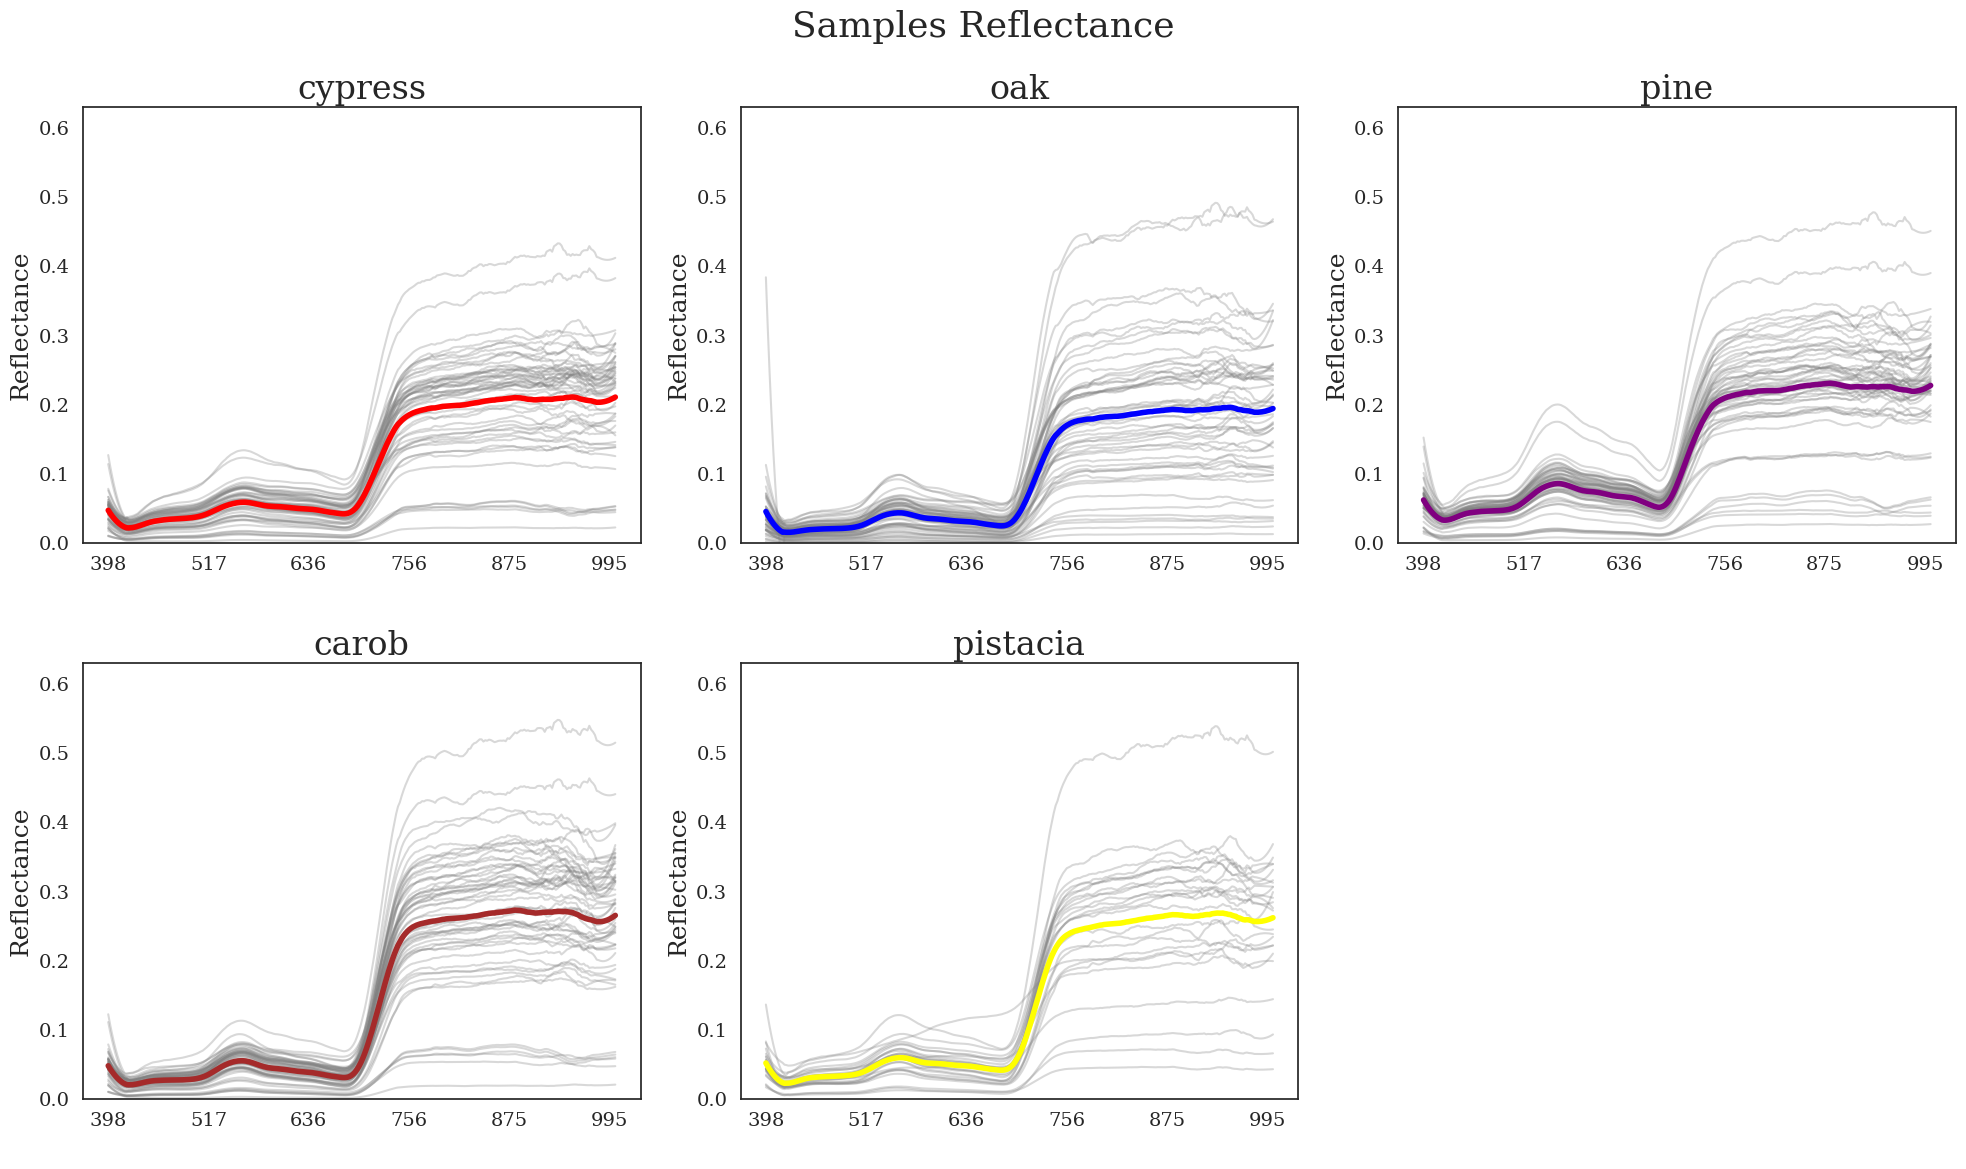

In [ ]:
# Create a figure with 2 rows and 3 columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Iterate through each unique species and plot the data in a subplot
for ax, species in zip(axs.flat, df.English_name.unique()):
  data = df[df['English_name'] == species]
  # Filter out rows where any value is greater than 1
  data = data.loc[~(data.iloc[:, :-5] > 1).any(axis=1)]
  for i, row in data.iterrows():
      ax.plot(row[data.columns[:-5]], color="grey", alpha=.3)
  ax.plot(data[data.columns[:-5]].mean(),color =color_dict[species],linestyle='-',lw=4)
  ax.set_xlabel(" ")
  ax.set_ylabel("Reflectance")
  ax.set_title(species, fontsize=24)
  ax.xaxis.set_tick_params(labelsize=14, rotation=0)
  ax.set_xticks(range(1,274,54))
  ax.set_xticklabels([str(band_dict[wl])[:3] for wl in df.columns[:-5][::54]], fontsize = 20)
  ax.tick_params(axis='both', which='major', labelsize=14)
  # Set y axis range to 0-1
  ax.set_ylim([0,0.63])

axs[-1,-1].remove()

# Add a main title to the figure
fig.suptitle("Samples Reflectance", fontsize=26)


# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

### mean by specieses for every date

In [ ]:
season_dict = {1:'winter',2:'winter', 3:'winter', 4:'winter', 5:'winter', 6:'mid', 7:'summer', 7:'summer', 8:'summer', 9:'summer', 10:'summer', 11:'summer', 12:'winter'}
color_season_dict = {'winter':'green', 'summer':'red'}
grouped_df = spectral_df.groupby(by=['English_name', 'spectral_date']).mean()
grouped_df['season'] = [season_dict[date.month] for date in grouped_df.index.get_level_values(1)]
grouped_df

<ipython-input-101-dda64d43984d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = spectral_df.groupby(by=['English_name', 'spectral_date']).mean()


1         2         3         4         5  \
English_name spectral_date                                                     
carob        2022-03-14     0.046292  0.041672  0.037406  0.033493  0.029935   
             2022-04-12     0.025338  0.023371  0.021568  0.019930  0.018455   
             2022-05-10     0.045731  0.041470  0.037553  0.033980  0.030752   
             2022-07-21     0.046799  0.042846  0.039228  0.035945  0.032999   
             2022-08-11     0.052266  0.048551  0.045138  0.042028  0.039220   
             2022-09-07     0.045942  0.043293  0.040853  0.038625  0.036606   
             2022-11-23     0.084894  0.075892  0.067616  0.060065  0.053239   
             2022-12-20     0.047621  0.043589  0.039890  0.036523  0.033489   
             2023-01-10     0.046468  0.042110  0.038104  0.034450  0.031147   
             2023-02-13     0.041303  0.036992  0.033052  0.029483  0.026284   
cypress      2022-03-14     0.048802  0.043667  0.038942  0.034627  0.030722   
             2022-04-12     0.023595  0.021619  0.019817  0.018187  0.016730   
             2022-05-10     0.045974  0.041987  0.038332  0.035008  0.032015   
             2022-07-21     0.046862  0.043332  0.040122  0.037231  0.034661   
             2022-08-11     0.054143  0.050117  0.046431  0.043087  0.040083   
             2022-09-07     0.048694  0.046206  0.043932  0.041874  0.040031   
             2022-11-23     0.086154  0.077239  0.069069  0.061643  0.054963   
             2022-12-20     0.048074  0.044164  0.040592  0.037357  0.034460   
             2023-01-10     0.044248  0.040217  0.036524  0.033169  0.030151   
             2023-02-13     0.030191  0.027282  0.024636  0.022253  0.020133   
oak          2022-03-14     0.035068  0.031410  0.028030  0.024927  0.022101   
             2022-04-12     0.028983  0.026452  0.024131  0.022022  0.020125   
             2022-05-10     0.027932  0.025096  0.022486  0.020100  0.017940   
             2022-07-21     0.033713  0.030844  0.028215  0.025826  0.023677   
             2022-08-11     0.105880  0.090477  0.076416  0.063697  0.052320   
             2022-09-07     0.040878  0.038336  0.035998  0.033866  0.031939   
             2022-11-23     0.073487  0.065735  0.058601  0.052085  0.046188   
             2022-12-20     0.036801  0.033674  0.030806  0.028195  0.025841   
             2023-01-10     0.036884  0.032859  0.029157  0.025779  0.022725   
             2023-02-13     0.026007  0.023260  0.020741  0.018451  0.016390   
pine         2022-03-14     0.058674  0.054193  0.050055  0.046258  0.042802   
             2022-04-12     0.033404  0.031383  0.029537  0.027866  0.026371   
             2022-05-10     0.049789  0.045810  0.042157  0.038830  0.035828   
             2022-07-21     0.055949  0.052071  0.048529  0.045323  0.042455   
             2022-08-11     0.062853  0.058908  0.055296  0.052016  0.049068   
             2022-09-07     0.054027  0.051742  0.049658  0.047773  0.046088   
             2022-11-23     0.107211  0.097553  0.088693  0.080633  0.073372   
             2022-12-20     0.064179  0.059807  0.055805  0.052174  0.048913   
             2023-01-10     0.077137  0.071033  0.065428  0.060322  0.055716   
             2023-02-13     0.057912  0.053383  0.049253  0.045522  0.042190   
pistacia     2022-04-12     0.037987  0.034569  0.031450  0.028631  0.026112   
             2022-05-10     0.034606  0.031384  0.028426  0.025733  0.023303   
             2022-07-21     0.047428  0.043816  0.040516  0.037528  0.034852   
             2022-08-11     0.059506  0.055576  0.051978  0.048711  0.045775   
             2022-09-07     0.048613  0.045481  0.042597  0.039963  0.037577   
             2022-11-23     0.089497  0.078825  0.069049  0.060171  0.052190   
             2022-12-20     0.050710  0.046750  0.043153  0.039918  0.037046   
             2023-01-10     0.044680  0.039547  0.034839  0.030556  0.026699   
             2023-02-13     0.05123

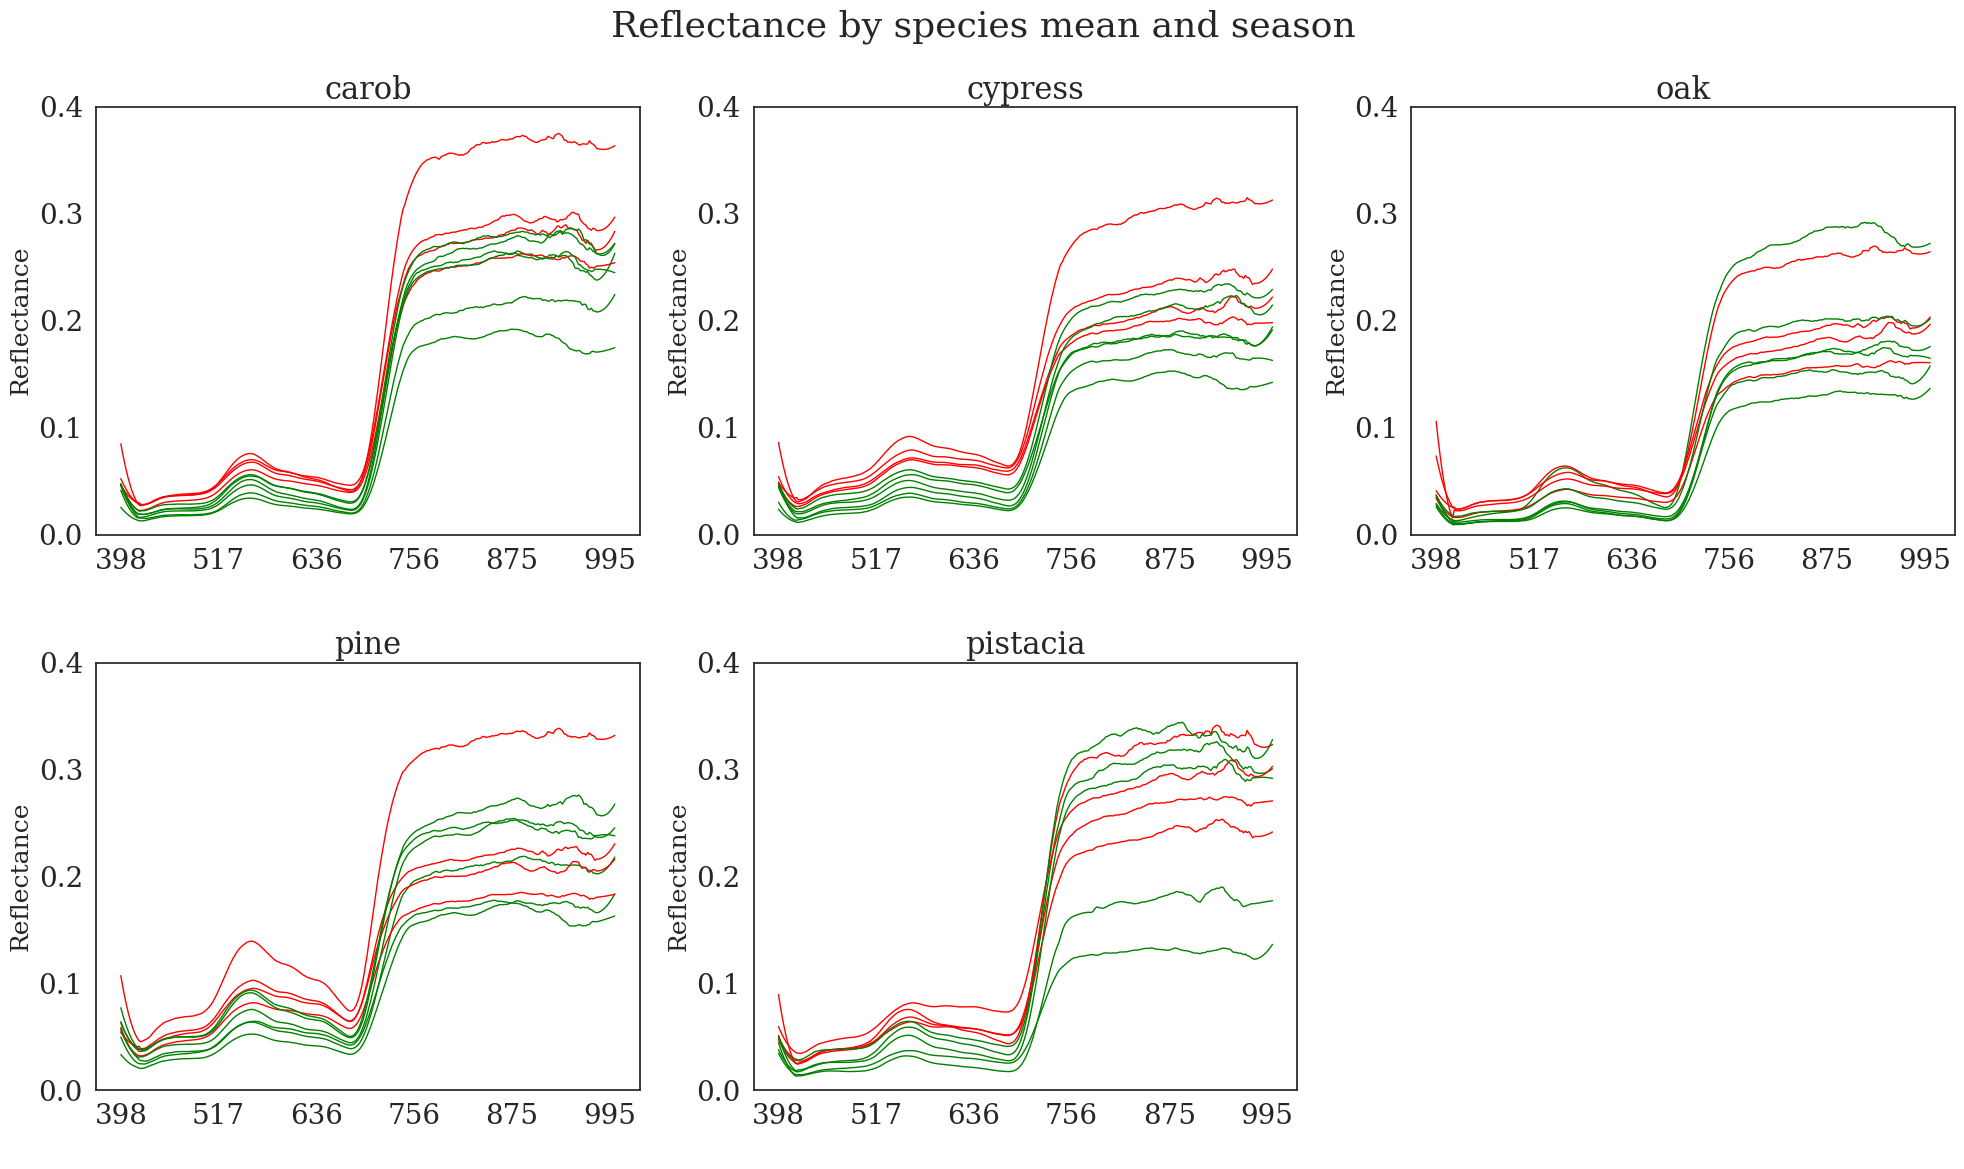

In [ ]:
# Create a figure with 2 rows and 3 columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Iterate through each unique species and plot the data in a subplot
for ax, species in zip(axs.flat, grouped_df.index.get_level_values(0).unique()):
    data = grouped_df[grouped_df.index.get_level_values(0) == species]
    for i, row in data.iterrows():
        ax.plot(row[:-1], color=color_season_dict[row['season']], linestyle='-', lw=1, label=row['season'])
    ax.set_xlabel(" ")
    ax.set_ylabel("Reflectance")
    ax.set_title(species, fontsize=22)
    ax.xaxis.set_tick_params(labelsize=12, rotation=0)
    ax.set_xticks(range(1,274,54))
    ax.set_xticklabels([str(band_dict[int(wl)])[:3] for wl in grouped_df.columns[:-1:54]])
    ax.tick_params(axis='both', which='major', labelsize=20)
    # Set y axis range to 0-1
    ax.set_ylim([0, 0.4])

axs[-1,-1].remove()

# Add a main title to the figure
fig.suptitle("Reflectance by species mean and season", fontsize=26)

# Add a legend
# plt.legend(loc=6, bbox_to_anchor=(1.05, 0.5), fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## by treatment

### all dates together

In [ ]:
grouped_df = spectral_df.groupby('treatment').mean()
grouped_df

<ipython-input-14-125dbd048bd1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = spectral_df.groupby('treatment').mean()


1         2         3         4         5         6    \
treatment                                                               
control    0.056334  0.050891  0.045910  0.041391  0.037333  0.033737   
drought    0.046117  0.042525  0.039224  0.036216  0.033500  0.031077   

                7         8         9         10   ...       265       266  \
treatment                                          ...                       
control    0.030603  0.027930  0.025719  0.023970  ...  0.239068  0.239023   
drought    0.028945  0.027106  0.025559  0.024305  ...  0.204103  0.204391   

                267       268       269       270       271       272  \
treatment                                                               
control    0.239080  0.239237  0.239495  0.239853  0.240313  0.240873   
drought    0.204934  0.205734  0.206788  0.208098  0.209664  0.211485   

                273       274  
treatment                      
control    0.241534  0.242296  
drought    0.213561  0.215893  

[2 rows x 274 columns]

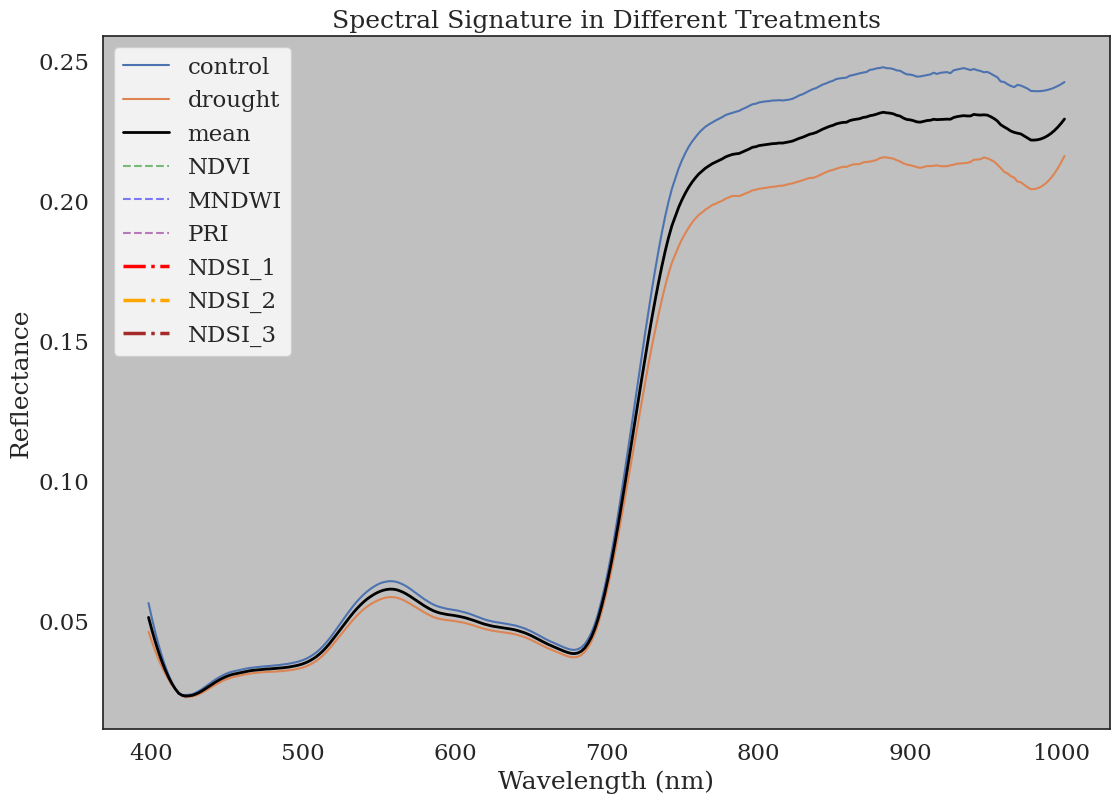

In [ ]:
#set the figure
fig, ax = plt.subplots(1, figsize=(13,9))

#plot the species
wavelengths = [band_dict[int(x)] for x in grouped_df.columns]
for i, row in grouped_df.iterrows():
    ax.plot(wavelengths, row.values, label=i)
#plot the mean
ax.plot(wavelengths,grouped_df.mean(), color='black', label='mean', lw = 2)

# add vertical lines for the indices

# #NDVI
# ax.axvline(x=670, linestyle='--', color='green', alpha=0.5)
# ax.axvline(x=803, linestyle='--', color='green', alpha=0.5)
# dummy_line_NDVI = mlines.Line2D([], [], linestyle='--', color='green', alpha=0.5, label='NDVI')
# handles, labels = ax.get_legend_handles_labels()
# handles.append(dummy_line_NDVI)

# #MNDWI
# ax.axvline(x=550, linestyle='--', color='blue', alpha=0.5)
# ax.axvline(x=790, linestyle='--', color='blue', alpha=0.5)
# dummy_line_MNDWI = mlines.Line2D([], [], linestyle='--', color='blue', alpha=0.5, label='MNDWI')
# handles.append(dummy_line_MNDWI)

# #PRI
# ax.axvline(x=530, linestyle='--', color='purple', alpha=0.5)
# ax.axvline(x=570, linestyle='--', color='purple', alpha=0.5)
# dummy_line_PRI = mlines.Line2D([], [], linestyle='--', color='purple', alpha=0.5, label='PRI')
# handles.append(dummy_line_PRI)

# #NDSI_1
# ax.axvline(x=714, linestyle='-.', color='red', alpha=1, lw=2.5)
# ax.axvline(x=719, linestyle='-.', color='red', alpha=1, lw=2.5)
# dummy_line_NDSI_1 = mlines.Line2D([], [], linestyle='-.', color='red', alpha=1, label='NDSI_1', lw=2.5)
# handles.append(dummy_line_NDSI_1)

# #NDSI_2
# ax.axvline(x=683, linestyle='-.', color='orange', alpha=1, lw=2.5)
# ax.axvline(x=763, linestyle='-.', color='orange', alpha=1, lw=2.5)
# dummy_line_NDSI_2 = mlines.Line2D([], [], linestyle='-.', color='orange', alpha=1, label='NDSI_2', lw=2.5)
# handles.append(dummy_line_NDSI_2)

# #NDSI_3
# ax.axvline(x=542, linestyle='-.', color='brown', alpha=1, lw=2.5)
# ax.axvline(x=590, linestyle='-.', color='brown', alpha=1, lw=2.5)
# dummy_line_NDSI_3 = mlines.Line2D([], [], linestyle='-.', color='brown', alpha=1, label='NDSI_3', lw=2.5)
# handles.append(dummy_line_NDSI_3)


# set chart title and axis labels
ax.set_title('Spectral Signature in Different Treatments')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance')
ax.legend(handles=handles)
ax.set_facecolor('silver')

# display the chart
plt.show()

### divided to dates

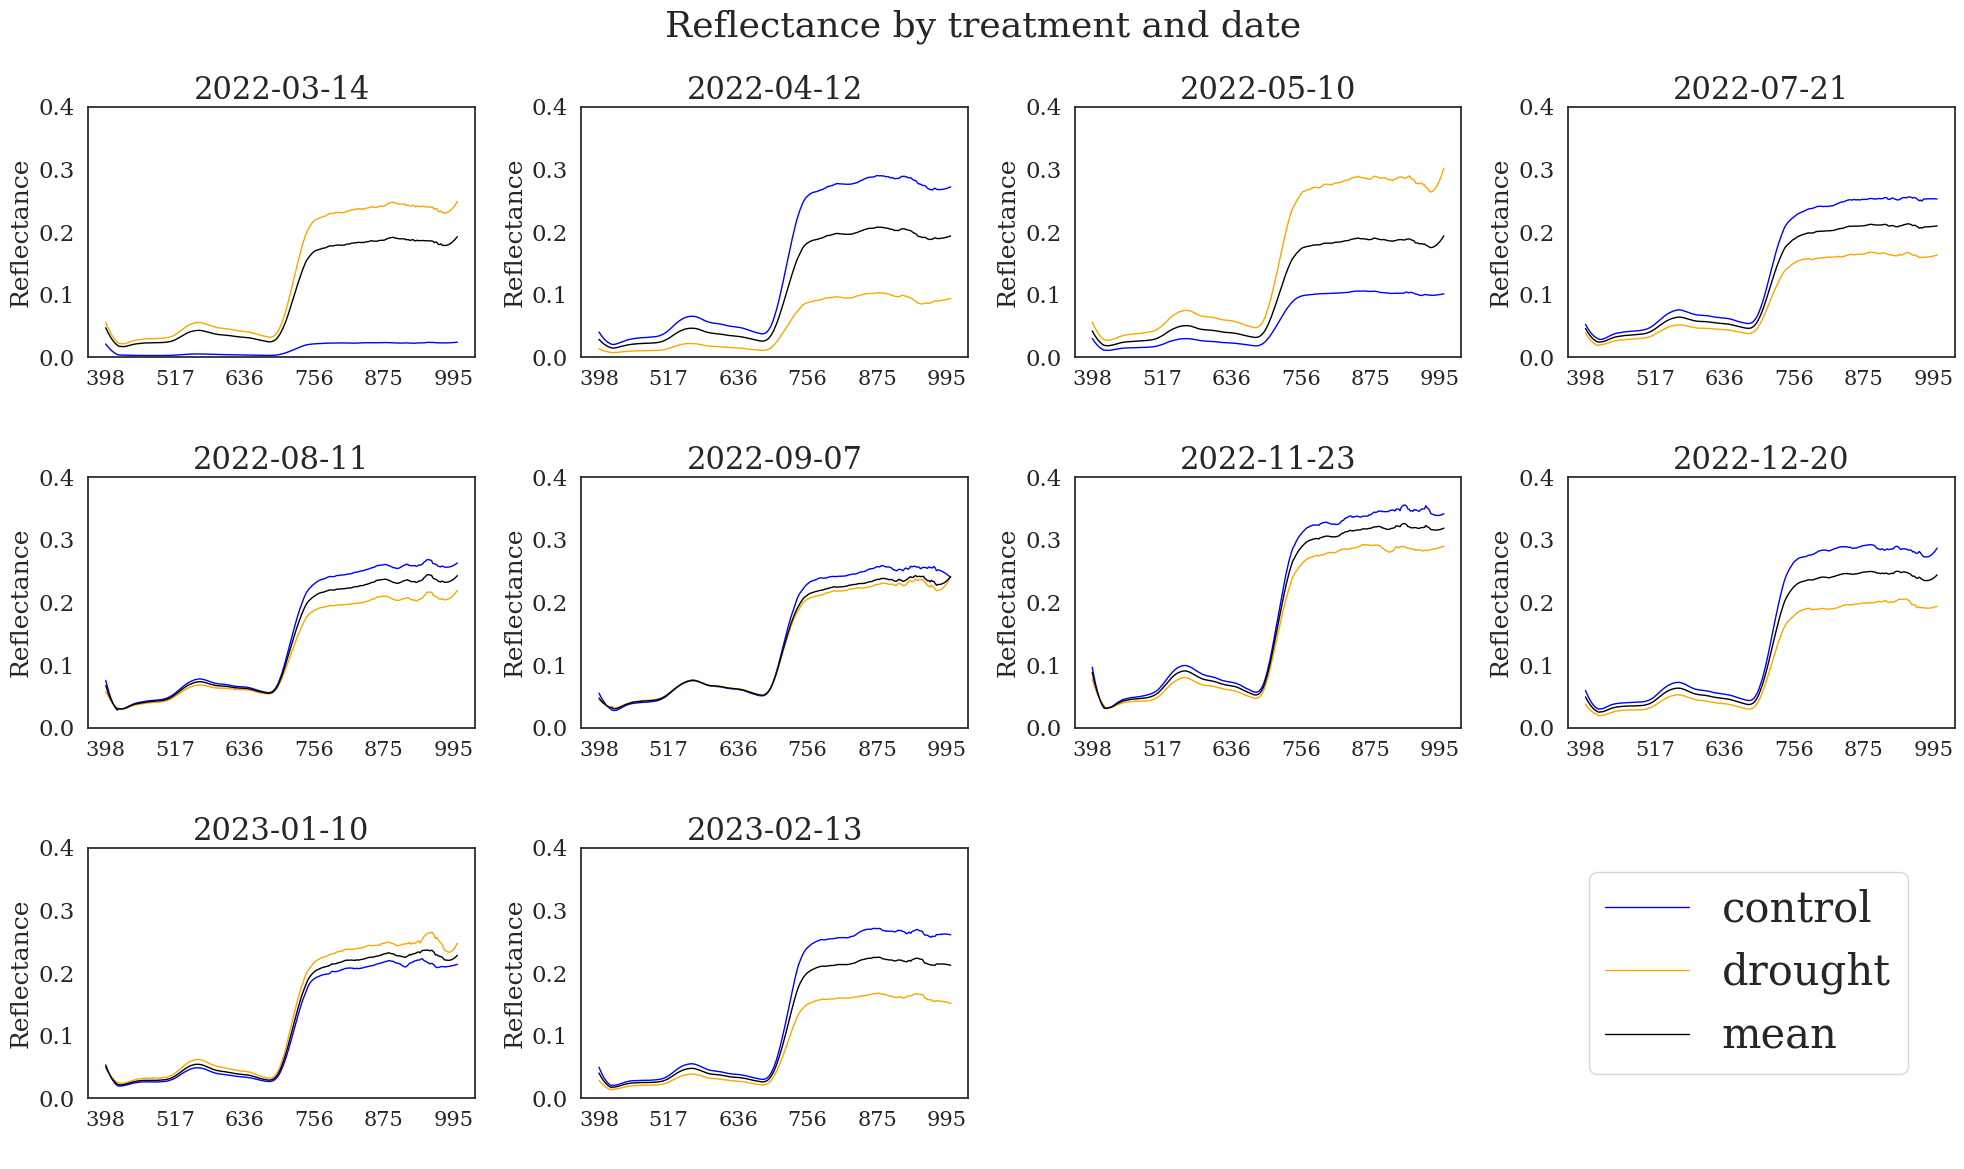

In [ ]:
# Create a figure with 3 rows and 4 columns
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

# Iterate through each unique date and plot the data in a subplot
for ax, date in zip(axs.flat, spectral_df.spectral_date.unique()):
  data = spectral_df[spectral_df['spectral_date'] == date]
  ax.plot(data[data.columns[:-3]][data['treatment'] == 'control'].mean(),color = 'blue',linestyle='-',lw=1, label = 'control')
  ax.plot(data[data.columns[:-3]][data['treatment'] == 'drought'].mean(),color = 'orange',linestyle='-',lw=1 , label = 'drought')
  ax.plot(data[data.columns[:-3]].mean(),color = 'black',linestyle='-',lw=1 , label = 'mean')
  ax.set_xlabel(" ")
  ax.set_ylabel("Reflectance")
  ax.set_title(str(date)[:-19], fontsize=22)
  ax.xaxis.set_tick_params(labelsize=12, rotation=0)
  ax.set_xticks(range(1,274,54))
  ax.set_xticklabels([str(band_dict[wl])[:3] for wl in spectral_df.columns[:-3][::54]], fontsize = 15)
  # ax.tick_params(axis='both', which='major', labelsize=14)

  # Set y axis range to 0-1
  ax.set_ylim([0,0.4])

# Add a main title to the figure
fig.suptitle("Reflectance by treatment and date", fontsize=26)
axs[-1,-2].remove()
axs[-1,-1].remove()
# Adjust the spacing between subplots
plt.tight_layout()

plt.legend(loc=6, bbox_to_anchor=(2.55, 0.5),fontsize=30)


plt.show()


#original NDSI code
by Yehuda Youngshtein

Define the NDSI function:

In [ ]:
def NDSI_pearson(x_df, y_df):
    '''
    The  NDSI_pearson takes is the same as NDSI()
    but calculate the pearson correlation instead of Spearman correlation
    '''
    # Convert columns names to str
    x_df.columns = x_df.columns.map(str)
    bands_list = x_df.columns

    # All possible pairs of columns
    all_pairs = list(itertools.combinations(bands_list, 2))

    # Calculate the NDSI
    y = y_df.values
    corrs = np.zeros(len(all_pairs))  # array for filling with correlation values
    pvals = np.zeros(len(all_pairs))  # array for filling with p values

    # Use tqdm to show the progress bar
    for index, pair in tqdm(enumerate(all_pairs), total=len(all_pairs), desc="Calculating NDSI"):
        a = x_df[pair[0]].values
        b = x_df[pair[1]].values
        Norm_index = (a-b)/(a+b)
        # Pearson correlation and p value
        corr, pval = stats.pearsonr(Norm_index, y)
        corrs[index] = corr
        pvals[index] = pval

    # Convert to DataFrame
    col1 = [tple[0] for tple in all_pairs]  # column of the first wavelength
    col2 = [tple[1] for tple in all_pairs]  # column of the second wavelength
    index_col = [f"{tple[0]},{tple[1]}" for tple in all_pairs]  # index column
    data = {'band1': col1, "band2": col2, 'Pearson_Corr': corrs, 'p_value': pvals}
    df_results = pd.DataFrame(data=data, index=index_col)
    df_results["Abs_Pearson_Corr"] = df_results["Pearson_Corr"].abs()
    return df_results.sort_values('Abs_Pearson_Corr',ascending=False)

Apply on my data:

In [ ]:
path = "/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/licor_hs_final.csv"
df = pd.read_csv(path, usecols=lambda column: column not in ["Unnamed: 0"]).dropna()

# remove non relevant rows
df = df.loc[144:].reset_index(drop = True)

# Convert date ro datetime:
df['date'] = pd.to_datetime(df['date'])

# Sort values by date order
df = df.sort_values('date')

df

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '23/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/11/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime

Species       date    hhmmss  Leaf     Flir_T  Flir_std         E  \
234      Peperomia 2022-02-11  10:43:01     2  23.266633  0.033541  0.000575   
233   Tradescantia 2022-02-11  10:39:18     1  24.186111  0.117730  0.000170   
235      Peperomia 2022-02-11  10:47:00     2  23.861889  0.072311  0.000112   
236      Peperomia 2022-02-11  10:53:28     2  25.232125  0.084866  0.000210   
237  Spathiphyllum 2022-02-11  11:01:00     3  22.528622  0.075229  0.001158   
..             ...        ...       ...   ...        ...       ...       ...   
447   Tradescantia 2022-11-30  11:19:08     1  23.436000  0.030358  0.000303   
446   Tradescantia 2022-11-30  11:14:06     1  23.295000  0.027902  0.000056   
468       Monalisa 2022-11-30  14:14:41     5  23.191700  0.044395  0.000357   
456   Philodendron 2022-11-30  11:55:56     4  23.695840  0.026242  0.000181   
469   Chlorophytum 2022-11-30  14:19:14     6  22.423286  0.136538  0.000058   

      LatHFlux         A          Ca  ...    981.96    985.05    988.13  \
234  25.354192  3.419967  409.377336  ...  0.550588  0.549904  0.554164   
233   7.512038  2.990050  407.194977  ...  0.769608  0.764236  0.768670   
235   4.958472  1.274596  409.773047  ...  0.637692  0.633119  0.628689   
236   9.247417  2.830401  408.988157  ...  0.833392  0.834429  0.838833   
237  51.049498  3.461646  407.379263  ...  0.414900  0.417123  0.419084   
..         ...       ...         ...  ...       ...       ...       ...   
447  13.370591  3.438995  402.625645  ...  0.594024  0.594625  0.597407   
446   2.460780  1.862750  405.354710  ...  0.499258  0.506891  0.504793   
468  15.757018  2.009618  405.693600  ...  0.392599  0.392656  0.390289   
456   7.984305  3.451095  402.952067  ...  0.525565  0.540332  0.538595   
469   2.548980  1.190534  407.281733  ...  0.303550  0.308875  0.310015   

       991.22    994.31     997.4   1000.49   1003.58  Leaf_hs     date_hs  
234  0.564637  0.579478  0.575755  0.577410  0.487689        4   11/2/2022  
233  0.786323  0.802532  0.807030  0.819509  0.669796        3   11/2/2022  
235  0.645160  0.654953  0.656735  0.654787  0.529341        5   11/2/2022  
236  0.844369  0.871530  0.871718  0.875414  0.705931        6   11/2/2022  
237  0.430684  0.427691  0.428393  0.441436  0.347613        7   11/2/2022  
..        ...       ...       ...       ...       ...      ...         ...  
447  0.607012  0.604432  0.611418  0.632733  0.534337        2  11/30/2022  
446  0.514051  0.517201  0.518847  0.529547  0.468462        1  11/30/2022  
468  0.388365  0.387637  0.393369  0.404670  0.359937       23  11/30/2022  
456  0.537977  0.540604  0.551282  0.554944  0.460863       11  11/30/2022  
469  0.306988  0.313774  0.322493  0.322719  0.276370       24  11/30/2022  

[470 rows x 222 columns]

In [ ]:
results = NDSI_pearson(df[df.columns[16:-2]],df['A'])

Calculating NDSI:   0%|          | 0/20706 [00:00<?, ?it/s]

In [ ]:
results[['band1', 'band2']] = results[['band1', 'band2']].astype(float)
results = results.sort_values(by=['band1', 'band2'])
results

band1    band2  Pearson_Corr       p_value  \
397.32,400.2      397.32   400.20     -0.068372  1.388571e-01   
397.32,403.09     397.32   403.09     -0.101202  2.824950e-02   
397.32,405.97     397.32   405.97     -0.109211  1.786419e-02   
397.32,408.85     397.32   408.85     -0.137716  2.772167e-03   
397.32,411.74     397.32   411.74     -0.127615  5.595454e-03   
...                  ...      ...           ...           ...   
994.31,1000.49    994.31  1000.49      0.180083  8.642371e-05   
994.31,1003.58    994.31  1003.58      0.460216  5.168723e-26   
997.4,1000.49     997.40  1000.49      0.153690  8.289905e-04   
997.4,1003.58     997.40  1003.58      0.452230  4.528545e-25   
1000.49,1003.58  1000.49  1003.58      0.425166  4.691883e-22   

                 Abs_Pearson_Corr  
397.32,400.2             0.068372  
397.32,403.09            0.101202  
397.32,405.97            0.109211  
397.32,408.85            0.137716  
397.32,411.74            0.127615  
...                           ...  
994.31,1000.49           0.180083  
994.31,1003.58           0.460216  
997.4,1000.49            0.153690  
997.4,1003.58            0.452230  
1000.49,1003.58          0.425166  

[20706 rows x 5 columns]

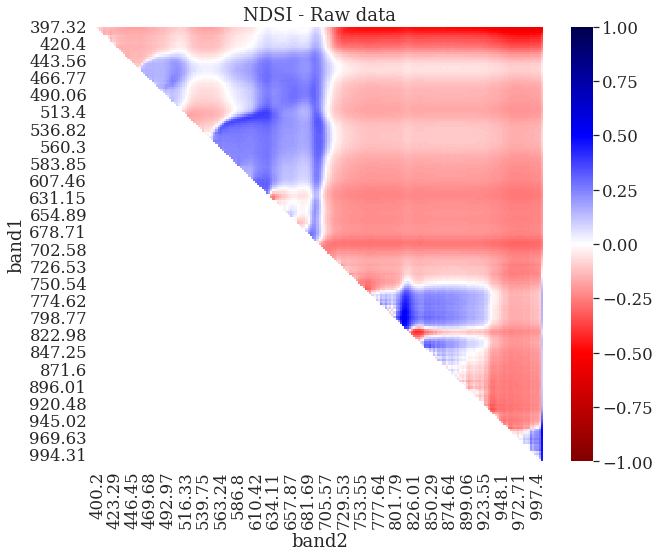

In [ ]:
# Pivot the dataframe to have bands as rows and columns
corr_matrix = results.pivot(index='band1', columns='band2', values='Pearson_Corr')

# Convert the 'band1' and 'band2' columns to categorical data type and specify the order
bands_order = sorted(set(results['band1']).union(set(results['band2'])))

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='seismic_r',vmin=-1,vmax=1)
plt.title('NDSI - Raw data')
plt.show()


<ipython-input-27-3b55e9cc8b55>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'ro',color='red')


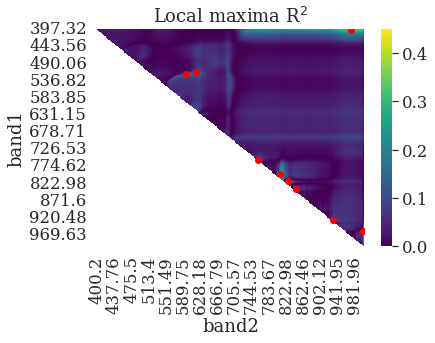

In [ ]:
# Define neighborhood size and threshold
neighborhood_size = 7
threshold = 0.1

# Create R squre df
df_squared = corr_matrix.applymap(lambda x: x**2)
data = df_squared.values

# Apply maximum filter
data_max = ndimage.maximum_filter(data, size=neighborhood_size)

# Find local maxima
maxima = (data == data_max)

# Apply minimum filter
data_min = ndimage.minimum_filter(data, size=neighborhood_size)

# Calculate thresholded difference between maxima and minima
diff = ((data_max - data_min) > threshold)

# Remove non-maxima points
maxima[diff == 0] = 0

# Label connected regions of local maxima
labeled, num_objects = ndimage.label(maxima)

# Find slices for each labeled region
slices = ndimage.find_objects(labeled)

# Find centers of labeled regions
x, y = [], []
for dy, dx in slices:
    x_center = (dx.start + dx.stop - 1) / 2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1) / 2
    y.append(y_center)

# Plot heatmap and local maxima
# plt.imshow(data, cmap='seismic_r', vmin=-1, vmax=1)
sns.heatmap(df_squared, cmap='viridis',vmin=0,vmax=0.45)
plt.autoscale(False)
plt.plot(x, y, 'ro',color='red')
plt.title('Local maxima R$^2$')
plt.show()

# more original codes from Yehuda

code for plotting different corelations between model and true values

KeyError: ignored

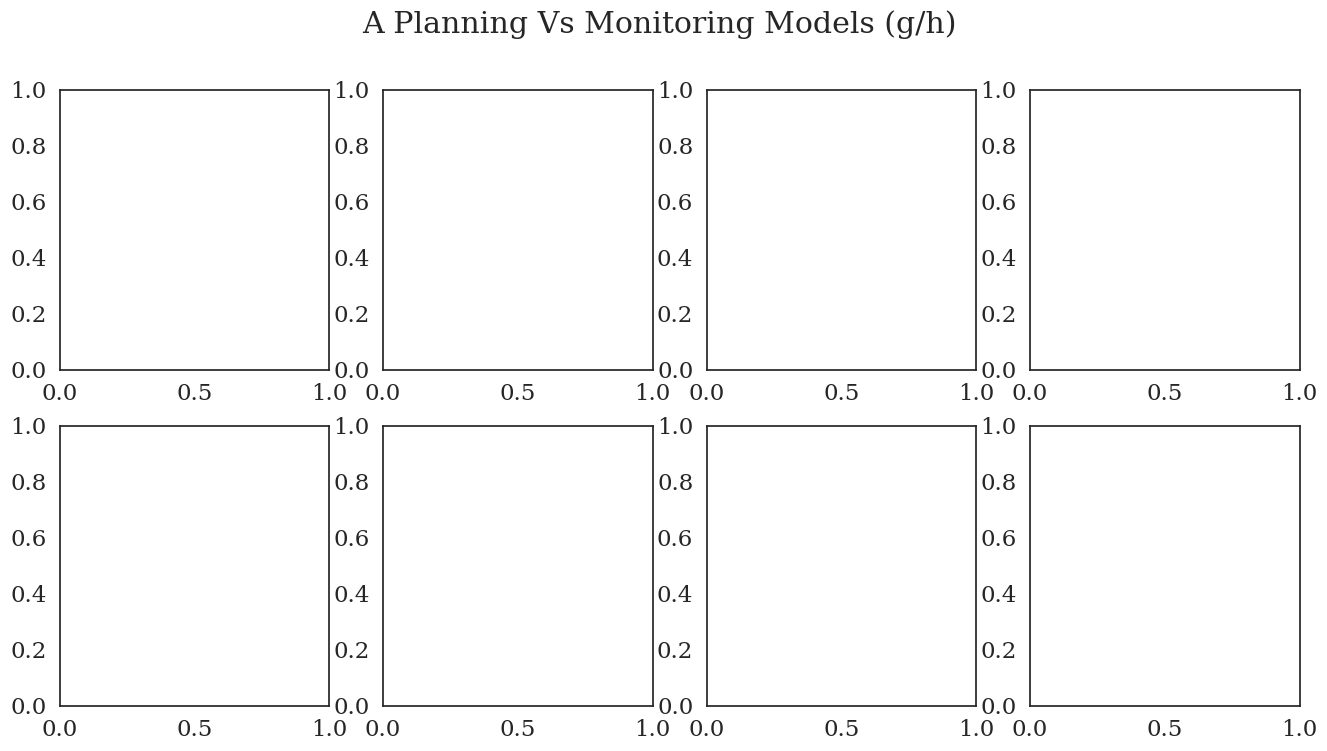

In [ ]:
# Define the target column name
target_col = 'TRUE'

# Define a list of columns to compare against the target
compare_cols = ['400-975', '400-975_species', '800-810','800-810_light', '800-810_species', 'Avg', 'ML_VI', 'GA-PLSR']

# create dict of name and color
list_of_areas = ['Monalisa_small', 'Philodendron_small', 'Chlorophytum','Peperomia', 'Monalisa', 'Philodendron', 'Spathiphyllum','Tradescantia']
colors = ["red","forestgreen","cyan","lime","red","forestgreen","Orange","deeppink"]

# Define a dictionary to map object values to colors
color_dict = dict(zip(list_of_areas, colors))

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('A Planning Vs Monitoring Models (g/h)')

# Loop through the comparison columns and plot each one in a separate subplot
for i, col in enumerate(compare_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    # Get the values of the target and comparison columns
    y = df_eval[target_col]
    x = df_eval[col]


    # Fit a linear regression model
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
    # make predictions
    y_pred = reg.predict(x.values.reshape(-1, 1))

    # calculate R^2 score and RMSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # add 1:1 line
    ax.plot([0, 6], [0,6],lw=3,color='black')
    # Plot the scatterplot with the trend line
    sns.scatterplot(x=x, y=y, ax=ax, color=colors,s=150)
    sns.regplot(x=x, y=y, ax=ax, color='grey', scatter=False, line_kws={'linestyle':'--'})
    ax.set_xlabel(col)
    ax.set_ylabel(target_col)
    ax.set_ylim(0,4)
    ax.set_xlim(0,4)
    ax.set_title(f'R2={r2:.2f}, RMSE={rmse:.2f}')
    ax.set_ylabel('Planning Model',fontsize=16)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

code for plotting the Pearson correlations, that also tell something about the p values

In [ ]:
dict_plot = {"Tradescantia":0,"Peperomia":1, "Spathiphyllum":2, "Philodendron":3,"Monalisa":4,"Chlorophytum":5} # dictionary for axes
number_to_name = {"Tradescantia":1,
                  "Peperomia":2,
                  "Spathiphyllum":3,
                  "Philodendron":4,
                  "Monalisa":5,
                  "Chlorophytum":6} #dictionary for labels
# list of vi:
VI = ['400-975_Tr',"800-810_Tr","815-830_Tr","510-620_Tr","960-990_Tr"]
fig, axes = plt.subplots(len(VI), 7, figsize=(20,5*len(VI)), sharex='col', sharey='row')
fig.suptitle('Tr rate Vs VI')
for i, index in enumerate(VI):
    for plant in hs_df.Species.unique():
      data_plot = hs_df[hs_df['Species']== plant]
      slope, intercept, r_value, p_value, std_err = stats.linregress(data_plot['E'], data_plot[index])
      corr = round(r_value, 2)
      if abs(corr) >= 0.05 and p_value < 0.05: # Only plot trend line if correlation is significant
        trendline_func = np.poly1d([slope, intercept])
        trendline_x = np.linspace(data_plot['E'].min(), data_plot['E'].max(), 100)
        trendline_y = trendline_func(trendline_x)
        axes[i, dict_plot[plant]].plot(trendline_x, trendline_y, color=palette[number_to_name[plant]-1], linestyle='--', label='Trend line')
      sns.scatterplot(ax=axes[i, dict_plot[plant]],data=data_plot, x='E',y=index , color =palette[number_to_name[plant]-1],alpha =.6,label=f'Pearson = {corr}')
      axes[i, dict_plot[plant]].set_xlabel(plant,fontsize=20) # X label based on the dictionary
      axes[i, dict_plot[plant]].set_ylabel(index[:-3],fontsize=20) # X label based on the dictionary
      axes[i, dict_plot[plant]].xaxis.set_tick_params(labelsize=16, rotation=60)
      axes[i, dict_plot[plant]].legend(fontsize = 12)

    # Add all data together
    slope, intercept, r_value, p_value, std_err = stats.linregress(hs_df['E'], hs_df[index])
    corr = round(r_value, 2)
    if abs(corr) >= 0.05 and p_value < 0.05: # Only plot trend line if correlation is significant
      trendline_func = np.poly1d([slope, intercept])
      trendline_x = np.linspace(hs_df['E'].min(), hs_df['E'].max(), 100)
      trendline_y = trendline_func(trendline_x)
      axes[i, 6].plot(trendline_x, trendline_y, color='black', linestyle='--', label='Trend line')
    all_data_plot = sns.scatterplot(ax=axes[i, 6],data=hs_df, x='E',y=index , color ='black',alpha =.6,label=f'Pearson = {corr}')
    all_data_plot.set_xlabel('All Species',fontsize=20)
    all_data_plot.legend(fontsize = 12)

# Set general labels for x-axis and y-axis
fig.text(0.5, 0.04, 'Measured Tr (mmol m^${-2}$ s$^{-1}$)', ha='center', va='center', fontsize=20)
fig.text(0.06, 0.5, 'NDSI Values', ha='center', va='center', rotation='vertical', fontsize=20)
plt.subplots_adjust(hspace = .1,wspace=.05) #adjust the borders between the graph